# imports

In [1]:
import pandas as pd
from itertools import permutations

# version

In [2]:
import sys
print(sys.version)

3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


# preprocessing

In [3]:
raw_data = pd.read_excel('../65977-66006-proteinGroups-genes (1).xlsx')
df = pd.concat((raw_data.iloc[:,0:6] , raw_data.filter(regex='LFQ').filter(regex='\.')),axis=1)
df

,Protein IDs,Majority protein IDs,Protein names,Gene names,Fasta headers,Number of proteins,LFQ intensity 1.1_center,LFQ intensity 1.2_periphery,LFQ intensity 1.3_away from periphery,LFQ intensity 2.1_center,...,LFQ intensity 2.3_away from periphery,LFQ intensity 3.1_center,LFQ intensity 3.2_periphery,LFQ intensity 3.3_away from periphery,LFQ intensity 4.1_center,LFQ intensity 4.2_periphery,LFQ intensity 4.3_away from periphery,LFQ intensity 5.1_center,LFQ intensity 5.2_periphery,LFQ intensity 5.3_away from periphery
0,Q91XV3,Q91XV3,Brain acid soluble protein 1,Basp1,>sp|Q91XV3|BASP1_MOUSE Brain acid soluble prot...,1,5838900000,1150200000,832110000,35222000,...,4266800000,2211200000,5177400000,904450000,1989700000,993560000,3203000000,246220000,1541200000,90141000
1,F6RT34;F6VME3,F6RT34;F6VME3,Myelin basic protein (Fragment),Mbp,>tr|F6RT34|F6RT34_MOUSE Myelin basic protein (...,2,1425700000,238810000,50979000,6226400,...,1097700000,356790000,105540000,57651000,726240000,73321000,22878000,257300000,23882000,12290000
2,P07724,P07724,Serum albumin,Alb,>sp|P07724|ALBU_MOUSE Serum albumin OS=Mus mus...,1,2049100000,636430000,212100000,230760000,...,243610000,524530000,252600000,42535000,4791900000,65318000,241620000,11427000000,323110000,37609000
3,P06837,P06837,Neuromodulin,Gap43,>sp|P06837|NEUM_MOUSE Neuromodulin OS=Mus musc...,1,1646000000,215720000,51905000,702840,...,173340000,269000000,177780000,48122000,436350000,13024000,96294000,71589000,54909000,3723800
4,P63260;G3UZ07;B1ATY1;G3UYG0;E9Q606;F8WGM8;F6WX...,P63260,"Actin, cytoplasmic 2",Actg1,">sp|P63260|ACTG_MOUSE Actin, cytoplasmic 2 OS=...",8,1522500000,876280000,196190000,191330000,...,770920000,754680000,570130000,171230000,1724100000,47085000,225420000,3302500000,222100000,91237000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5067,Q9Z1R9,Q9Z1R9,MCG124046,Prss1,>tr|Q9Z1R9|Q9Z1R9_MOUSE MCG124046 OS=Mus muscu...,1,0,0,0,0,...,0,0,0,0,0,1297800000,1345300000,0,979630000,0
5068,Q9Z1W8,Q9Z1W8,Potassium-transporting ATPase alpha chain 2,Atp12a,>sp|Q9Z1W8|AT12A_MOUSE Potassium-transporting ...,1,13859000,5245600,0,1995100,...,0,5771500,9735100,0,13510000,0,4695300,2372200,0,0
5069,Q9Z2L6,Q9Z2L6,Multiple inositol polyphosphate phosphatase 1,Minpp1,>sp|Q9Z2L6|MINP1_MOUSE Multiple inositol polyp...,1,0,0,0,0,...,0,0,0,0,0,0,0,352400,0,0
5070,S4R2R5;S4R2Q9,S4R2R5,Ankyrin-2,Ank2,>tr|S4R2R5|S4R2R5_MOUSE Ankyrin-2 OS=Mus muscu...,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
for col in df.columns:
    print(col)

Protein IDs
Majority protein IDs
Protein names
Gene names
Fasta headers
Number of proteins
LFQ intensity 1.1_center
LFQ intensity 1.2_periphery
LFQ intensity 1.3_away from periphery
LFQ intensity 2.1_center
LFQ intensity 2.2_periphery
LFQ intensity 2.3_away from periphery
LFQ intensity 3.1_center
LFQ intensity 3.2_periphery
LFQ intensity 3.3_away from periphery
LFQ intensity 4.1_center
LFQ intensity 4.2_periphery
LFQ intensity 4.3_away from periphery
LFQ intensity 5.1_center
LFQ intensity 5.2_periphery
LFQ intensity 5.3_away from periphery


# Filtering all proteins with positive LFQ in at least three mice (in at least one position) 

In [5]:
filtered_df = pd.DataFrame()
rest_df = pd.DataFrame()
for protein in df.index:
    count = 0
    for mice in ['1\.', '2\.', '3\.','4\.', '5\.']:
        if df.filter(regex=mice).loc[protein].sum() > 0:
            count += 1
        if count == 3:
            filtered_df = filtered_df.append(df.iloc[protein, :])
            break
        if count < 3 and mice == '5\.':
            rest_df = rest_df.append(df.iloc[protein, :])
        
 
        
 

In [6]:
filtered_df.T

,0,1,2,3,4,5,6,7,8,9,...,4912,4926,4932,4948,4968,4976,4987,5008,5055,5068
Fasta headers,>sp|Q91XV3|BASP1_MOUSE Brain acid soluble prot...,>tr|F6RT34|F6RT34_MOUSE Myelin basic protein (...,>sp|P07724|ALBU_MOUSE Serum albumin OS=Mus mus...,>sp|P06837|NEUM_MOUSE Neuromodulin OS=Mus musc...,">sp|P63260|ACTG_MOUSE Actin, cytoplasmic 2 OS=...",>sp|P20152|VIME_MOUSE Vimentin OS=Mus musculus...,>sp|P0DP28|CALM3_MOUSE Calmodulin-3 OS=Mus mus...,>sp|P20065|TYB4_MOUSE Thymosin beta-4 OS=Mus m...,>sp|P26350|PTMA_MOUSE Prothymosin alpha OS=Mus...,>sp|P83741|WNK1_MOUSE Serine/threonine-protein...,...,">sp|Q3UV17|K22O_MOUSE Keratin, type II cytoske...",>sp|Q61176|ARGI1_MOUSE Arginase-1 OS=Mus muscu...,>tr|Q8BKL1|Q8BKL1_MOUSE Protein SSXT OS=Mus mu...,>tr|Q80T06|Q80T06_MOUSE Elongation factor 1-de...,>sp|Q8BML2|OACYL_MOUSE O-acyltransferase like ...,>tr|Q8C5R8|Q8C5R8_MOUSE Phosphoribosyl pyropho...,>sp|Q8K0H5|TAF10_MOUSE Transcription initiatio...,>tr|Q9CPN9|Q9CPN9_MOUSE RIKEN cDNA 2210010C04 ...,>sp|Q9QZI8|SERC1_MOUSE Serine incorporator 1 O...,>sp|Q9Z1W8|AT12A_MOUSE Potassium-transporting ...
Gene names,Basp1,Mbp,Alb,Gap43,Actg1,Vim,Calm3;Calm2;Calm1,Tmsb4x,Ptma,Wnk1,...,Krt76,Arg1,Ss18,Eef1d,Oacyl,Prps1l1,Taf10,2210010C04Rik,Serinc1,Atp12a
LFQ intensity 1.1_center,5.8389e+09,1.4257e+09,2.0491e+09,1.646e+09,1.5225e+09,1.8502e+09,1.402e+09,7.4299e+08,6.9546e+08,6.7455e+08,...,1.1498e+09,1.6519e+06,0,0,1.6468e+07,2.3129e+06,0,2.9718e+06,875930,1.3859e+07
LFQ intensity 1.2_periphery,1.1502e+09,2.3881e+08,6.3643e+08,2.1572e+08,8.7628e+08,3.1934e+08,3.8342e+08,3.2445e+08,3.6415e+08,3.4662e+09,...,4.3138e+09,0,0,0,6.6278e+06,0,0,1.8129e+07,0,5.2456e+06
LFQ intensity 1.3_away from periphery,8.3211e+08,5.0979e+07,2.121e+08,5.1905e+07,1.9619e+08,9.2014e+06,5.144e+08,3.2135e+08,1.0419e+08,5.4922e+09,...,2.5015e+09,0,0,0,7.5252e+06,0,0,2.1336e+07,0,0
LFQ intensity 2.1_center,3.5222e+07,6.2264e+06,2.3076e+08,702840,1.9133e+08,3.6759e+08,4.9489e+07,5.5644e+07,5.2649e+08,0,...,9.0779e+09,0,0,0,0,0,0,1.0612e+07,0,1.9951e+06
LFQ intensity 2.2_periphery,8.6949e+08,1.1262e+09,1.2152e+10,5.9614e+08,3.0953e+09,6.4655e+08,1.3645e+09,2.6536e+08,1.7431e+08,2.1755e+07,...,1.4248e+08,1.3089e+06,254610,2.6046e+07,1.529e+07,3.0592e+06,570520,2.8012e+06,779740,2.7154e+06
LFQ intensity 2.3_away from periphery,4.2668e+09,1.0977e+09,2.4361e+08,1.7334e+08,7.7092e+08,2.6116e+07,1.1052e+09,5.7146e+08,1.4559e+08,5.0063e+09,...,8.3703e+09,0,0,0,2.2848e+07,0,0,0,0,0
LFQ intensity 3.1_center,2.2112e+09,3.5679e+08,5.2453e+08,2.69e+08,7.5468e+08,8.0703e+07,1.1522e+09,3.4855e+08,1.7242e+09,4.2218e+09,...,7.0981e+09,0,0,2.2356e+06,1.7255e+07,0,0,1.6624e+07,0,5.7715e+06
LFQ intensity 3.2_periphery,5.1774e+09,1.0554e+08,2.526e+08,1.7778e+08,5.7013e+08,2.8723e+07,1.9011e+09,3.8215e+08,1.4609e+09,5.4914e+09,...,6.9447e+09,0,0,0,1.602e+07,0,0,2.4734e+07,0,9.7351e+06


# Pattern Finding

# utils functions

In [7]:
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import os

def get_specific_area(mouse_df, area_number):
    area_df = mouse_df
    for col_name in area_df.columns:
        x = re.search(f'(1|2|3|4|5)(\.|C){area_number}', col_name)
        if x == None:
            area_df = area_df.drop(col_name, 1)
    return area_df

def plot_common_violinplot(df_method, genes_index, gene_names_list):
    df_center = get_specific_area(df_method, 1)
    df_periphery = get_specific_area(df_method, 2)
    df_away = get_specific_area(df_method, 3)
    count = 0
    total = df_center.shape[0]
    for i, row in enumerate(genes_index,0):
        center = np.array(df_center.loc[row,:])
        periphery = np.array(df_periphery.loc[row,:])
        away = np.array(df_away.loc[row,:])
        labels = np.array(5*["Center"]+5*['Periphery']+5*['Away'])
        count=count+1
        concatinate_areas = np.concatenate((center,periphery,away),0)
        concatinate_areas = np.array([concatinate_areas, labels]).T
        violinplot_df = pd.DataFrame(concatinate_areas,columns = ['LFQ intensity','Label'])
#         violinplot_df.to_excel(str(gene_names_list[i]) + '.xlsx') 
        sns.set_palette("pastel")
        plt.figure(figsize=(10,10))
        sns.stripplot(x=np.array(violinplot_df.iloc[:,1]).astype('str'), 
                     y=np.array(violinplot_df.iloc[:,0]).astype('float'),size=20)
        plt.title(gene_names_list[i])
        axes = plt.gca()
        axes.set_ylabel('LFQ intensity')
        axes.set_ylim(2,max(axes.get_ylim()))
        my_path = os.path.abspath('a/') # Figures out the absolute path for you in case your working directory moves around.            
#         plt.savefig(os.path.join(my_path, gene_names_list[i] + '.png'))        
        plt.show()
    return count, total

def calc_fdrs(df, title, fdrs_to_check=[0.2, 0.15, 0.1, 0.05, 0.001]):
    fig, ax = plt.subplots(1,1)
    p_vals = df['p-val']
    
    #calculate observed and expected amounts of comperison.
    p_vals = p_vals.sort_values()
    observed = p_vals.rank(method='max')
    expected = p_vals * len(p_vals)
    fdrs = expected / observed
    #plot overabundance plot.
    ax.set_title(title)
    ax.set_xlabel('p values')
    ax.set_ylabel('amount of comparisons')
    ax.scatter(p_vals, observed, label='observed ranks', alpha = 0.3, facecolors='none', edgecolors = 'g')
    ax.scatter(p_vals, expected, label='expected ranks', alpha = 0.3, facecolors='none', edgecolors = 'b')
    ax.plot(p_vals, observed, label='observed ranks')
    ax.plot(p_vals, expected, label='expected ranks')
    
    # find the number of genes, k, at which we observe:
    label = ''
    for fdr in fdrs_to_check:
        comperisons_num = fdrs[fdrs <= fdr].count()
        label += f'\nfdr: {fdr}-genes number:{comperisons_num}'
        

    ax.text(0.4, 0.4, label)
#     display(fdrs)
    fdrs = fdrs.sort_index()
    return fdrs

# Finding positive pattern proteins

LFQ intensity 1.1_center                 0.689455
LFQ intensity 1.2_periphery              0.316354
LFQ intensity 1.3_away from periphery    0.134495
LFQ intensity 2.1_center                 0.218499
LFQ intensity 2.2_periphery              0.977212
LFQ intensity 2.3_away from periphery    0.252011
LFQ intensity 3.1_center                 0.303396
LFQ intensity 3.2_periphery              0.225201
LFQ intensity 3.3_away from periphery    0.149240
LFQ intensity 4.1_center                 0.872654
LFQ intensity 4.2_periphery              0.120197
LFQ intensity 4.3_away from periphery    0.170241
LFQ intensity 5.1_center                 0.974531
LFQ intensity 5.2_periphery              0.167113
LFQ intensity 5.3_away from periphery    0.135836
dtype: float64
{'1\\.': 0.6817556505364464, '2\\.': 0.7346683263090051, '3\\.': 0.39158072532249144, '4\\.': 0.7367931223985228, '5\\.': 0.8458329754266134}


/Users/ilaigenishmac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ilaigenishmac/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/ilaigenishmac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

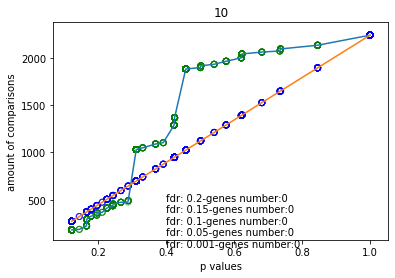

In [8]:
from itertools import combinations
positive_pattern_proteins_df = pd.DataFrame()
print((filtered_df.astype(bool).sum(axis=0) / filtered_df.shape[0]).iloc[2:17])
p_gene_is_absent = (filtered_df.astype(bool).sum(axis=0) / filtered_df.shape[0]).iloc[2:17]
# p 110

# calculate probability of 10, e.g - 110 or 100 or 010, for each mouse.
probabilty_10_dict = dict()
for mouse in ['1\.', '2\.', '3\.','4\.', '5\.']:
    p_c_present = filtered_df.filter(regex= mouse + '1').astype(bool).sum(axis=0)/ filtered_df.shape[0]
    p_p_present = filtered_df.filter(regex= mouse + '2').astype(bool).sum(axis=0)/ filtered_df.shape[0]
    p_a_present = filtered_df.filter(regex= mouse + '3').astype(bool).sum(axis=0)/ filtered_df.shape[0]
    probabilty_10_dict[mouse] = p_c_present.iloc[0] * p_p_present.iloc[0] * (1-p_a_present.iloc[0]) + p_c_present.iloc[0] * (1 - p_p_present.iloc[0]) * (1 - p_a_present.iloc[0]) + (1 - p_c_present.iloc[0]) * p_p_present.iloc[0] * (1-p_a_present.iloc[0]) 
    
print(probabilty_10_dict)


positive_pattern_proteins_df = pd.DataFrame()
#iterates over the proteins.
for protein in filtered_df.index:
    
    count = 0
    p_10_mices_with_pattern = 1
    mices_without_pattern = []
    mices_with_pattern = []
    
    # count mice with 10 pattern and remember the mice without the pattern.
    for mouse in ['1\.', '2\.', '3\.','4\.', '5\.']:
        mouse_df = filtered_df.filter(regex=mouse).loc[protein,:]
        if (mouse_df.filter(regex= mouse + '1').iloc[0] > 0 or mouse_df.filter(regex= mouse + '2').iloc[0] > 0) and mouse_df.filter(regex= mouse + '3').iloc[0] == 0: 
            count += 1
            p_10_mices_with_pattern *= probabilty_10_dict[mouse]
            mices_with_pattern.append(mouse)
        else:
            mices_without_pattern.append(mouse)
    
    # calaulate p-value of the current gene.
    pval = p_10_mices_with_pattern * np.prod([1 - probabilty_10_dict[m] for m in mices_without_pattern])
   # adding extremer results probabilities to p-val.
    for i in range(1, 5 - count + 1):
        for mices in combinations(mices_without_pattern, i):
            curr_p = p_10_mices_with_pattern
            for mouse in ['1\.', '2\.', '3\.','4\.', '5\.']:
#                 print(probabilty_10_dict[mouse])
                if mouse not in mices_with_pattern:
                    if mouse in mices:
                    #print(probabilty_110_dict[mouse])
                        curr_p *= probabilty_10_dict[mouse]
                    else:
                        curr_p *= (1-probabilty_10_dict[mouse])

        
            pval += curr_p
            
    #adding information to the 10 pattern table.
    protein_data = filtered_df.loc[protein, :]
    protein_data['mice count'] = count
    protein_data['p-val'] = pval
    positive_pattern_proteins_df = positive_pattern_proteins_df.append(protein_data)

positive_pattern_proteins_df['FDR'] = calc_fdrs(positive_pattern_proteins_df,'10')  
positive_pattern_proteins_df.columns = [c for c in positive_pattern_proteins_df.columns if c !='FDR'] + ['FDR']


In [9]:
positive_pattern_proteins_df

,Fasta headers,Gene names,LFQ intensity 1.1_center,LFQ intensity 1.2_periphery,LFQ intensity 1.3_away from periphery,LFQ intensity 2.1_center,LFQ intensity 2.2_periphery,LFQ intensity 2.3_away from periphery,LFQ intensity 3.1_center,LFQ intensity 3.2_periphery,...,LFQ intensity 5.1_center,LFQ intensity 5.2_periphery,LFQ intensity 5.3_away from periphery,Majority protein IDs,Number of proteins,Protein IDs,Protein names,mice count,p-val,FDR
0,>sp|Q91XV3|BASP1_MOUSE Brain acid soluble prot...,Basp1,5.838900e+09,1.150200e+09,832110000.0,35222000.0,8.694900e+08,4.266800e+09,2.211200e+09,5.177400e+09,...,2.462200e+08,1.541200e+09,90141000.0,Q91XV3,1.0,Q91XV3,Brain acid soluble protein 1,0.0,1.000000,1.000000
1,>tr|F6RT34|F6RT34_MOUSE Myelin basic protein (...,Mbp,1.425700e+09,2.388100e+08,50979000.0,6226400.0,1.126200e+09,1.097700e+09,3.567900e+08,1.055400e+08,...,2.573000e+08,2.388200e+07,12290000.0,F6RT34;F6VME3,2.0,F6RT34;F6VME3,Myelin basic protein (Fragment),0.0,1.000000,1.000000
2,>sp|P07724|ALBU_MOUSE Serum albumin OS=Mus mus...,Alb,2.049100e+09,6.364300e+08,212100000.0,230760000.0,1.215200e+10,2.436100e+08,5.245300e+08,2.526000e+08,...,1.142700e+10,3.231100e+08,37609000.0,P07724,1.0,P07724,Serum albumin,0.0,1.000000,1.000000
3,>sp|P06837|NEUM_MOUSE Neuromodulin OS=Mus musc...,Gap43,1.646000e+09,2.157200e+08,51905000.0,702840.0,5.961400e+08,1.733400e+08,2.690000e+08,1.777800e+08,...,7.158900e+07,5.490900e+07,3723800.0,P06837,1.0,P06837,Neuromodulin,0.0,1.000000,1.000000
4,">sp|P63260|ACTG_MOUSE Actin, cytoplasmic 2 OS=...",Actg1,1.522500e+09,8.762800e+08,196190000.0,191330000.0,3.095300e+09,7.709200e+08,7.546800e+08,5.701300e+08,...,3.302500e+09,2.221000e+08,91237000.0,P63260,8.0,P63260;G3UZ07;B1ATY1;G3UYG0;E9Q606;F8WGM8;F6WX...,"Actin, cytoplasmic 2",0.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,>tr|Q8C5R8|Q8C5R8_MOUSE Phosphoribosyl pyropho...,Prps1l1,2.312900e+06,0.000000e+00,0.0,0.0,3.059200e+06,0.000000e+00,0.000000e+00,0.000000e+00,...,2.755200e+06,0.000000e+00,0.0,Q8C5R8,1.0,Q8C5R8,Phosphoribosyl pyrophosphate synthetase 1-like 1,4.0,0.312141,0.677566
4987,>sp|Q8K0H5|TAF10_MOUSE Transcription initiatio...,Taf10,0.000000e+00,0.000000e+00,0.0,0.0,5.705200e+05,0.000000e+00,0.000000e+00,0.000000e+00,...,1.115700e+06,0.000000e+00,0.0,Q8K0H5,1.0,Q8K0H5,Transcription initiation factor TFIID subunit 10,3.0,0.457848,0.544744
5008,>tr|Q9CPN9|Q9CPN9_MOUSE RIKEN cDNA 2210010C04 ...,2210010C04Rik,2.971800e+06,1.812900e+07,21336000.0,10612000.0,2.801200e+06,0.000000e+00,1.662400e+07,2.473400e+07,...,3.548200e+06,0.000000e+00,17402000.0,Q9CPN9,1.0,Q9CPN9,RIKEN cDNA 2210010C04 gene,3.0,0.211962,1.289052
5055,>sp|Q9QZI8|SERC1_MOUSE Serine incorporator 1 O...,Serinc1,8.759300e+05,0.000000e+00,0.0,0.0,7.797400e+05,0.000000e+00,0.000000e+00,0.000000e+00,...,1.579500e+06,0.000000e+00,0.0,Q9QZI8,1.0,Q9QZI8,Serine incorporator 1,3.0,0.423648,0.734979


In [10]:
positive_pattern_proteins_df[positive_pattern_proteins_df['mice count']>4]#.iloc[:,:-5]

,Fasta headers,Gene names,LFQ intensity 1.1_center,LFQ intensity 1.2_periphery,LFQ intensity 1.3_away from periphery,LFQ intensity 2.1_center,LFQ intensity 2.2_periphery,LFQ intensity 2.3_away from periphery,LFQ intensity 3.1_center,LFQ intensity 3.2_periphery,...,LFQ intensity 5.1_center,LFQ intensity 5.2_periphery,LFQ intensity 5.3_away from periphery,Majority protein IDs,Number of proteins,Protein IDs,Protein names,mice count,p-val,FDR
81,>sp|Q61937|NPM_MOUSE Nucleophosmin OS=Mus musc...,Npm1,117770000.0,10583000.0,0.0,0.0,247960000.0,0.0,26037000.0,10294000.0,...,358460000.0,12795000.0,0.0,Q61937;Q9DAY9;Q5SQB0;Q5SQB5,4.0,Q61937;Q9DAY9;Q5SQB0;Q5SQB5,Nucleophosmin,5.0,0.122228,1.503004
112,>sp|P09405|NUCL_MOUSE Nucleolin OS=Mus musculu...,Ncl,78039000.0,12440000.0,0.0,0.0,158980000.0,0.0,67382000.0,1770000.0,...,243560000.0,0.0,0.0,P09405,2.0,P09405;A0A087WRM5,Nucleolin,5.0,0.122228,1.503004
117,>sp|Q8BGD9|IF4B_MOUSE Eukaryotic translation i...,Eif4b,71916000.0,8277900.0,0.0,0.0,47532000.0,0.0,45925000.0,9167400.0,...,53833000.0,0.0,0.0,Q8BGD9;B2RWE8,4.0,Q8BGD9;B2RWE8;REV__B2RWE8;REV__Q8BGD9,Eukaryotic translation initiation factor 4B; ...,5.0,0.122228,1.503004
130,>sp|P18608|HMGN1_MOUSE Non-histone chromosomal...,Hmgn1,25703000.0,14753000.0,0.0,18869000.0,3506300.0,0.0,8874400.0,10141000.0,...,846700.0,0.0,0.0,P18608,1.0,P18608,Non-histone chromosomal protein HMG-14,5.0,0.122228,1.503004
135,>tr|A2A547|A2A547_MOUSE Ribosomal protein L19 ...,Rpl19,47072000.0,30866000.0,0.0,18295000.0,33955000.0,0.0,36892000.0,16712000.0,...,46603000.0,0.0,0.0,A2A547;P84099,2.0,A2A547;P84099,Ribosomal protein L19; 60S ribosomal protein L19,5.0,0.122228,1.503004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578,>sp|Q9CQ48|NUDC2_MOUSE NudC domain-containing ...,Nudcd2,250070.0,0.0,0.0,1333600.0,11123000.0,0.0,1769400.0,0.0,...,23800000.0,0.0,0.0,Q9CQ48;E0CYQ2,2.0,Q9CQ48;E0CYQ2,NudC domain-containing protein 2,5.0,0.122228,1.503004
1761,>sp|Q9JLB0|MPP6_MOUSE MAGUK p55 subfamily memb...,Mpp6,0.0,2312700.0,0.0,0.0,10733000.0,0.0,1515900.0,3134000.0,...,10428000.0,0.0,0.0,Q9JLB0,2.0,Q9JLB0;E9PWC5,MAGUK p55 subfamily member 6,5.0,0.122228,1.503004
2438,>sp|P62267|RS23_MOUSE 40S ribosomal protein S2...,Rps23,0.0,6169300.0,0.0,0.0,25465000.0,0.0,0.0,1878100.0,...,52965000.0,0.0,0.0,P62267,1.0,P62267,40S ribosomal protein S23,5.0,0.122228,1.503004
3403,>tr|Q6W4W7|Q6W4W7_MOUSE DIA3 OS=Mus musculus O...,Diaph2;Diap,0.0,2607000.0,0.0,0.0,3580800.0,0.0,2710400.0,0.0,...,1159700.0,0.0,0.0,Q6W4W7;E9Q4U7;O70566,3.0,Q6W4W7;E9Q4U7;O70566,DIA3; Protein diaphanous homolog 2,5.0,0.122228,1.503004


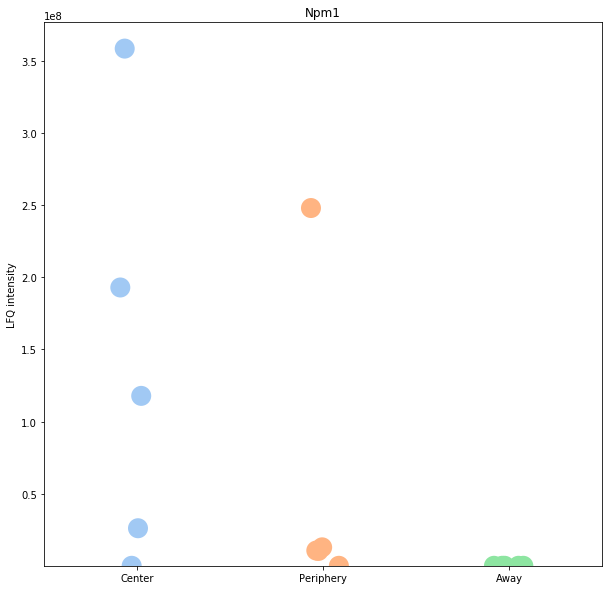

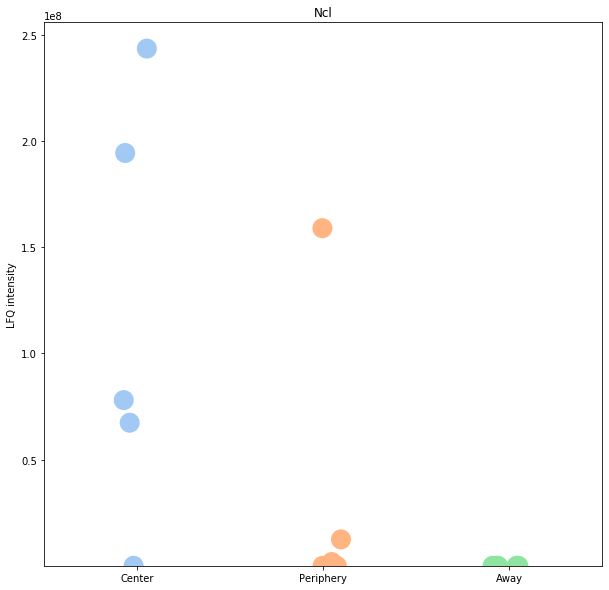

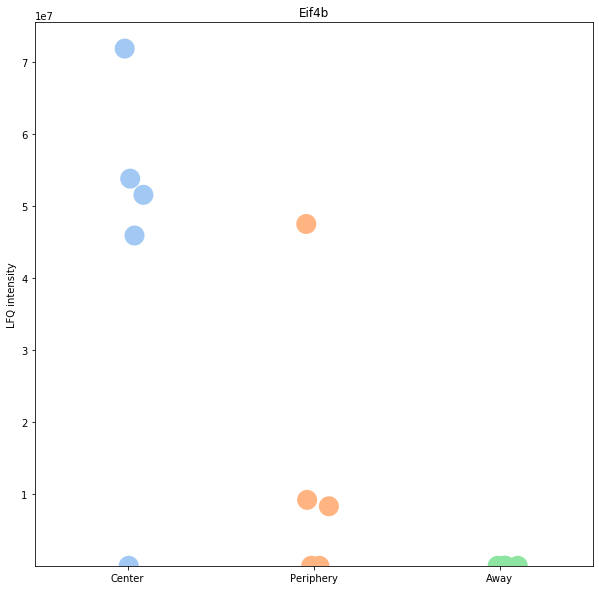

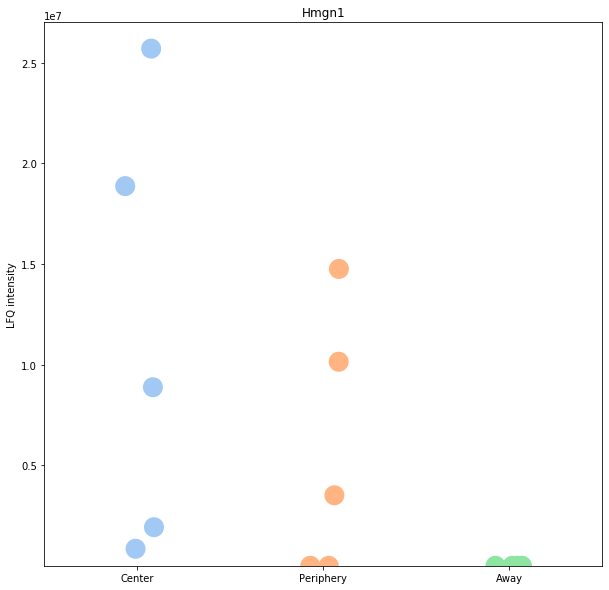

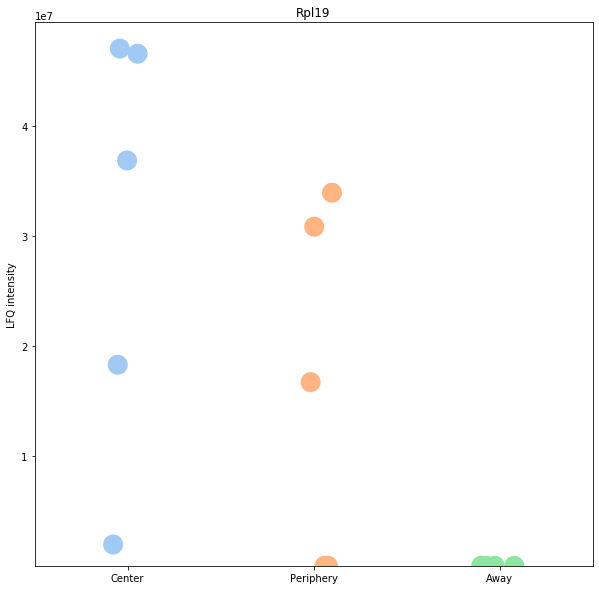

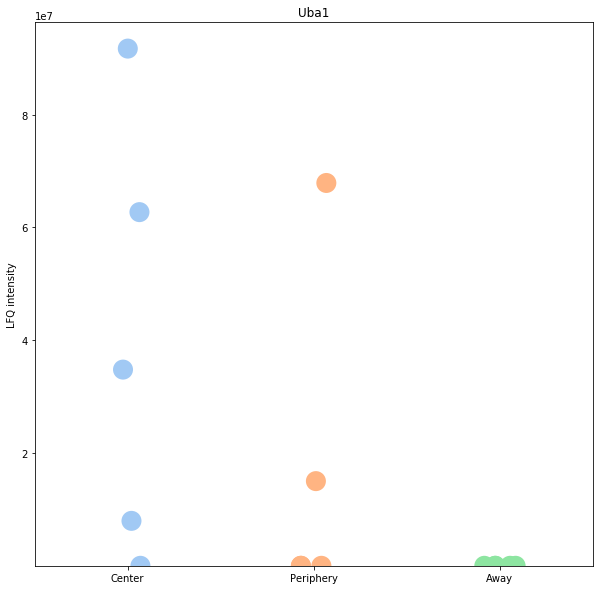

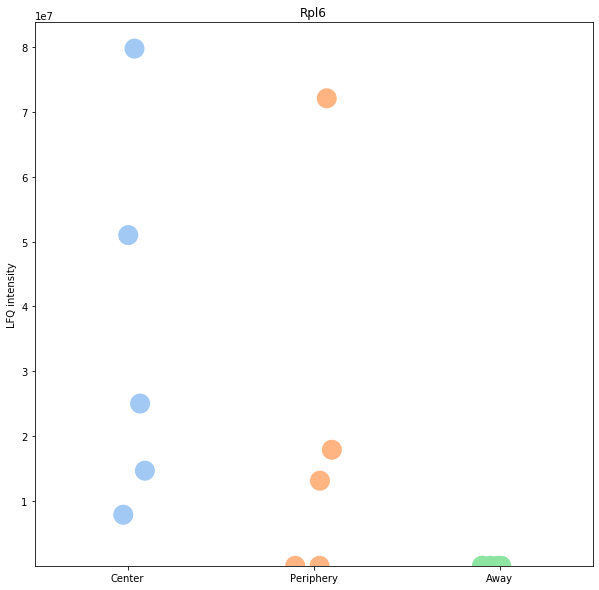

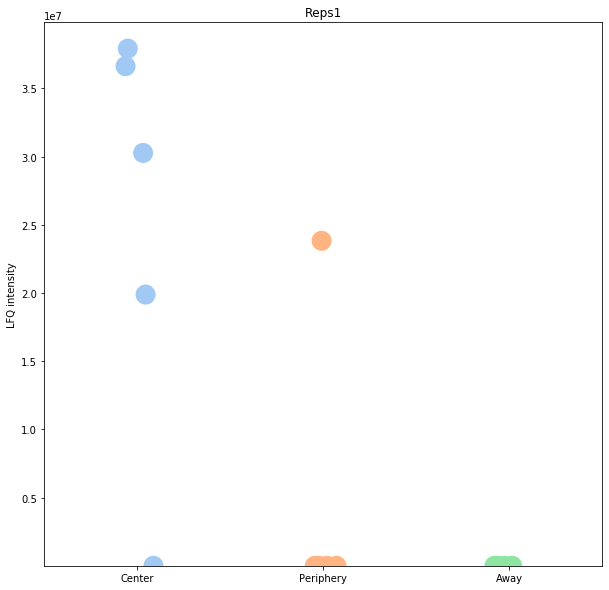

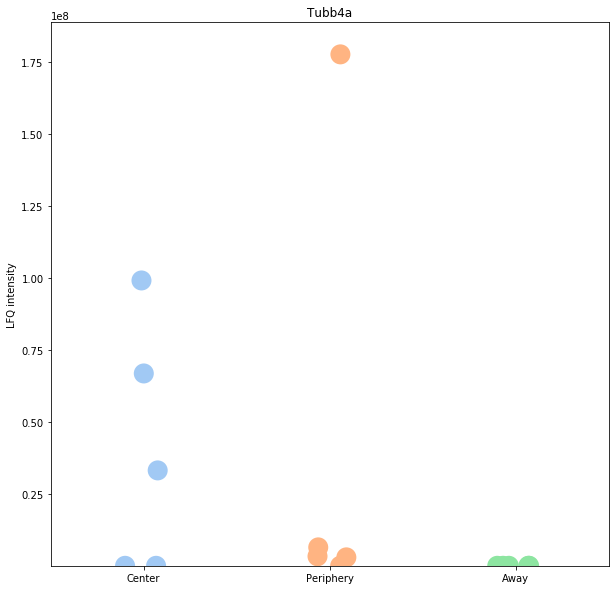

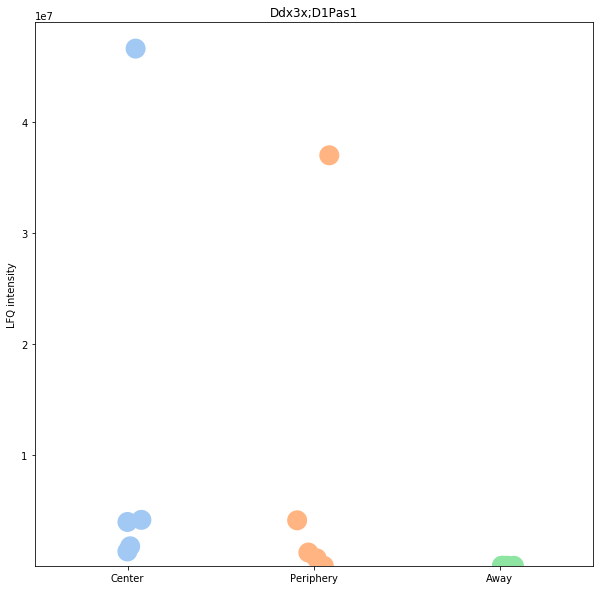

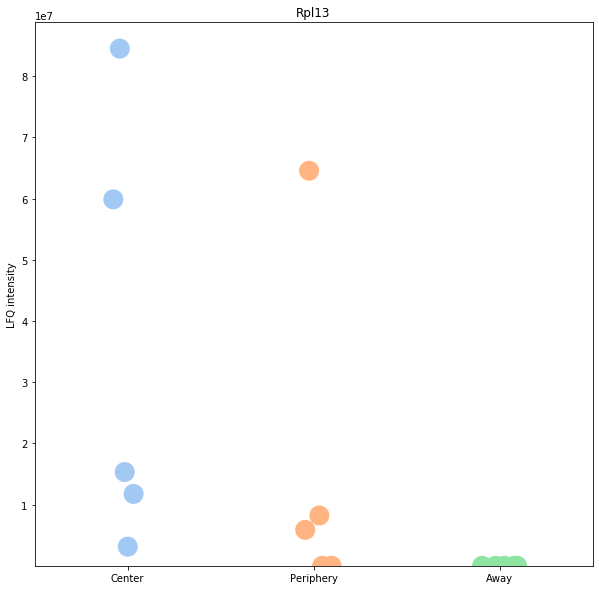

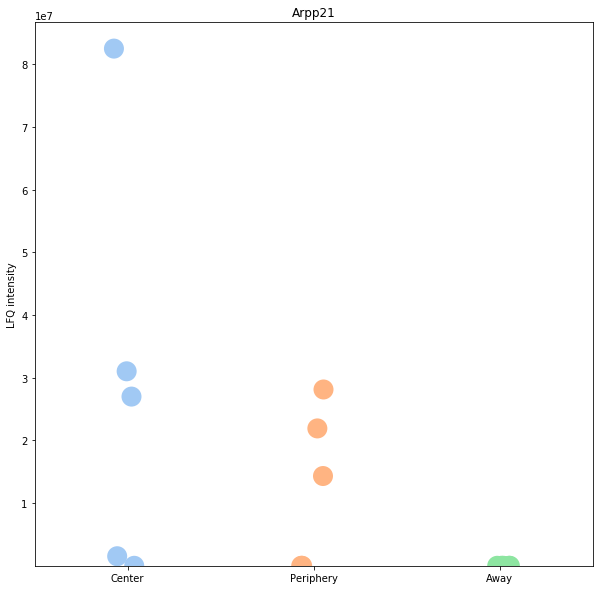

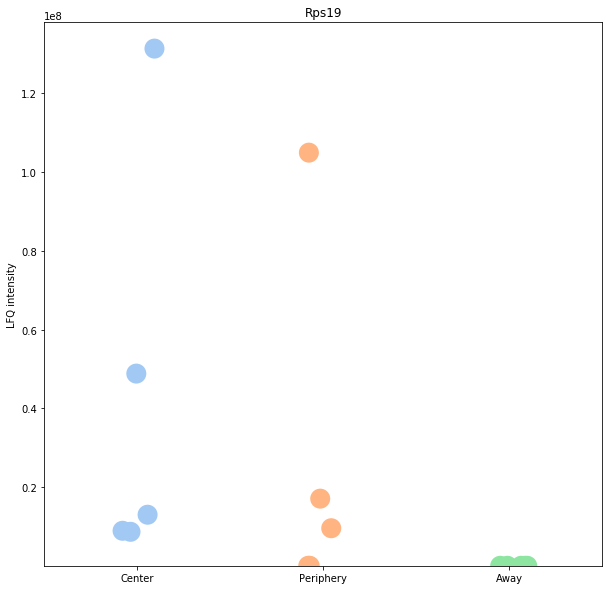

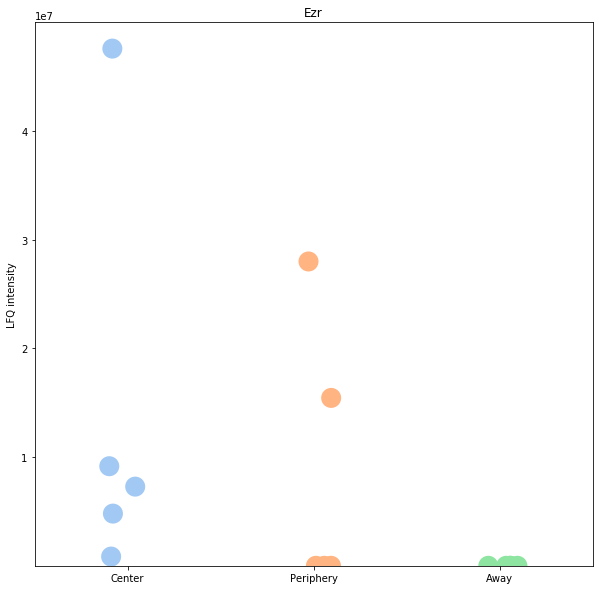

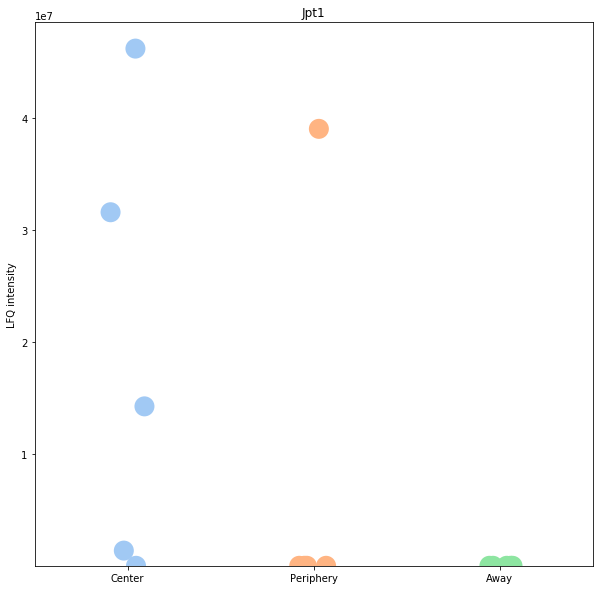

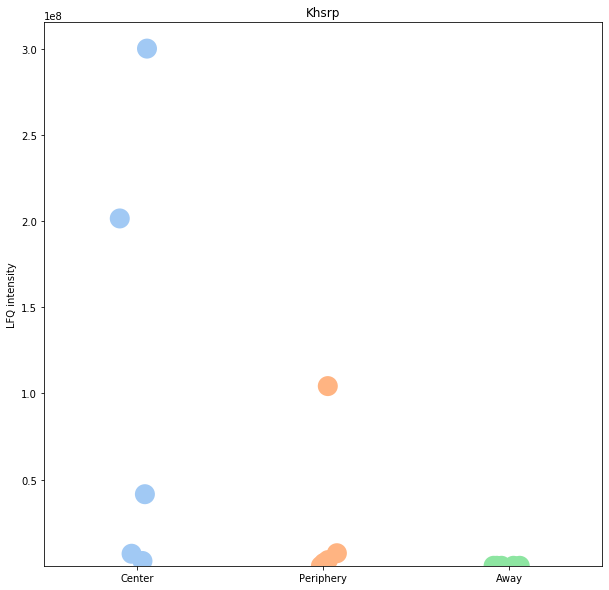

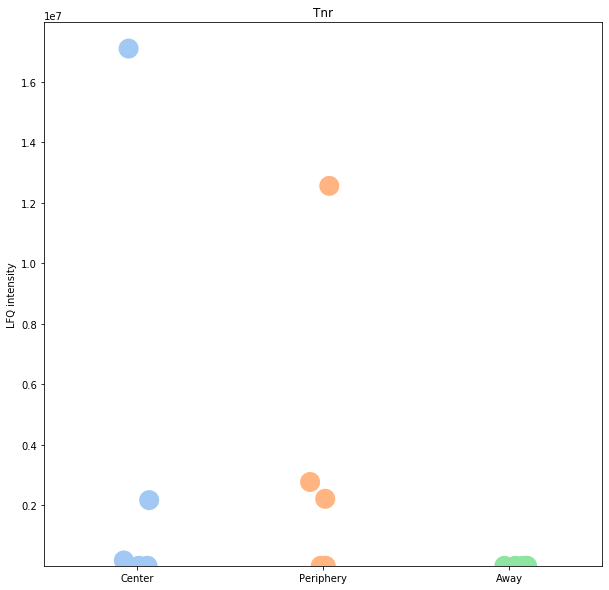

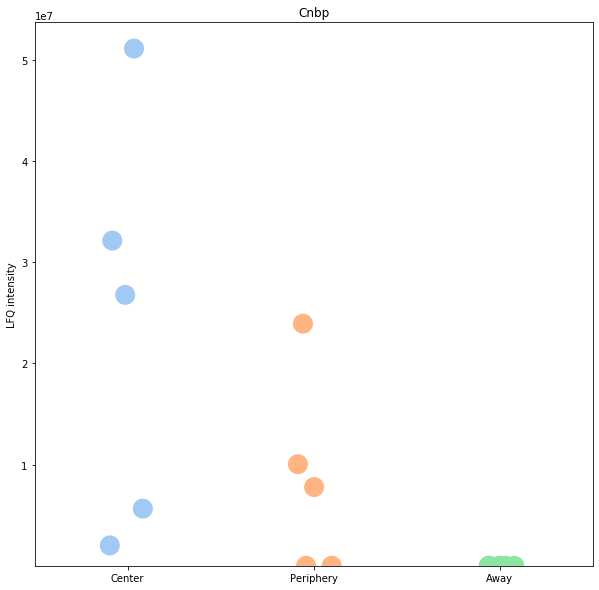

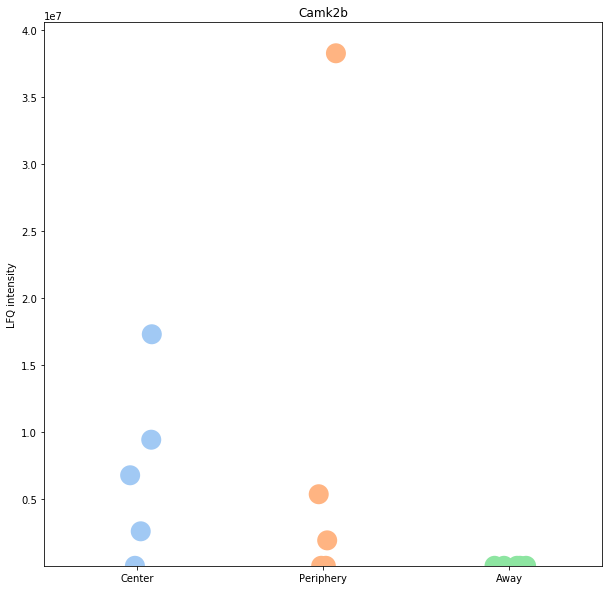

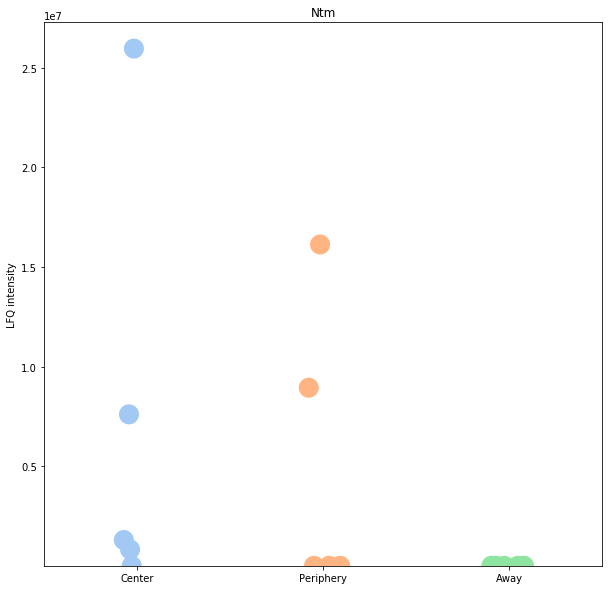

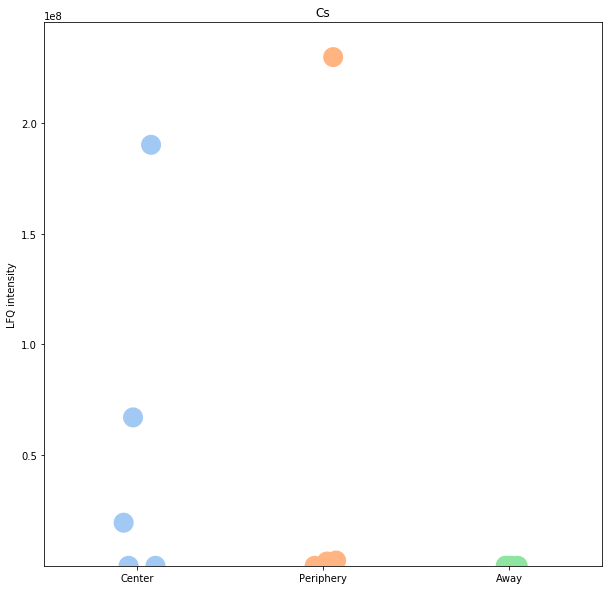

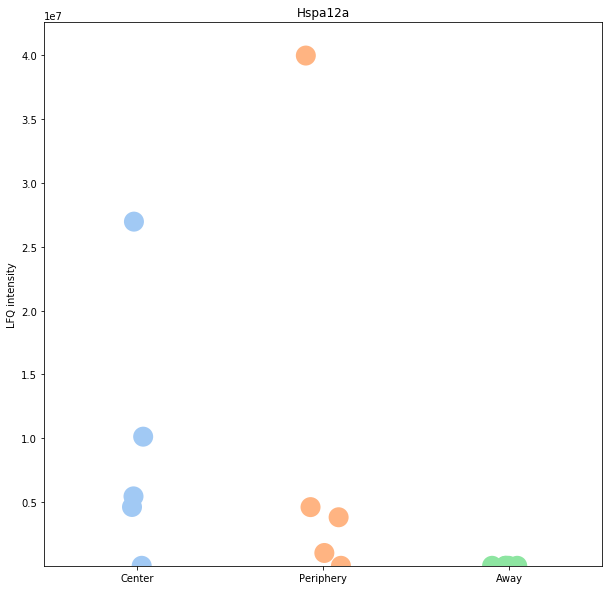

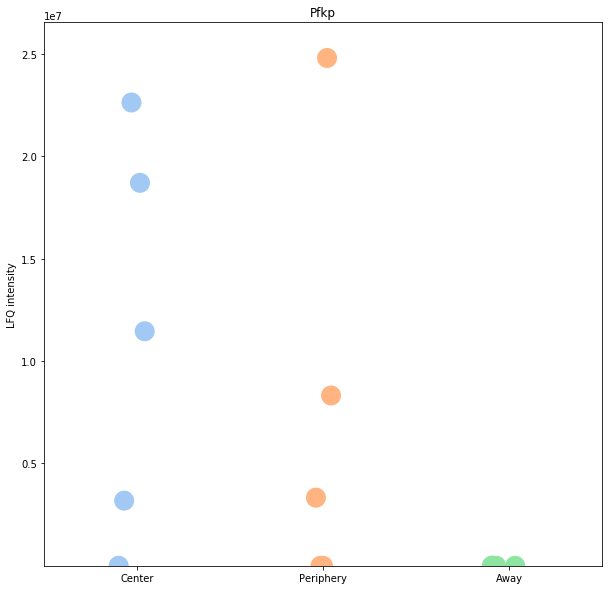

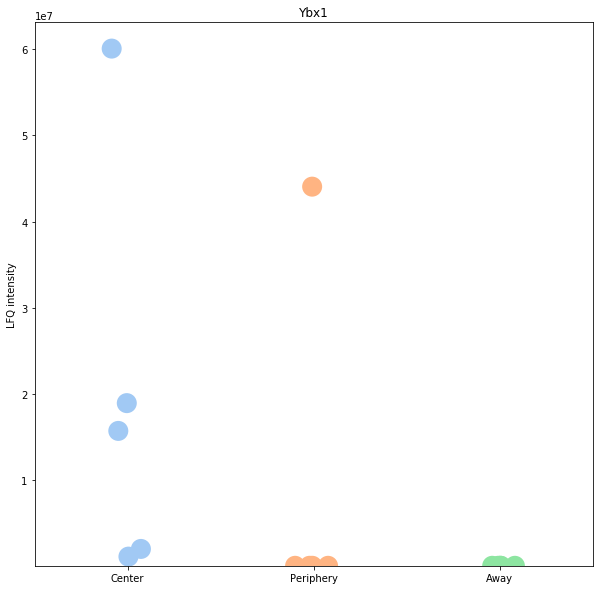

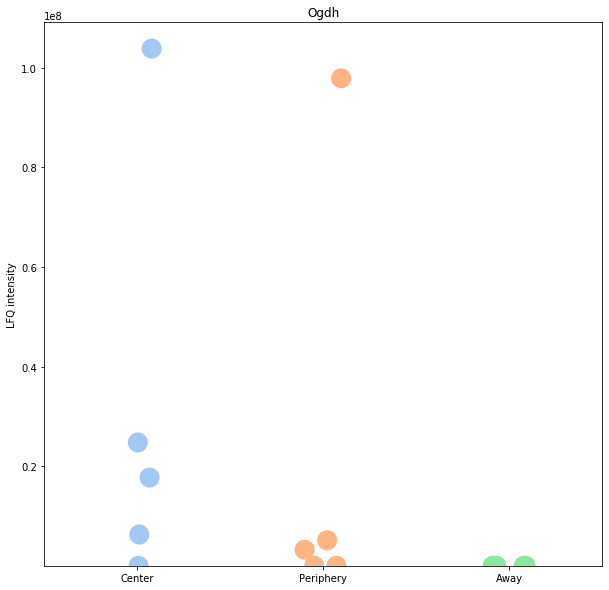

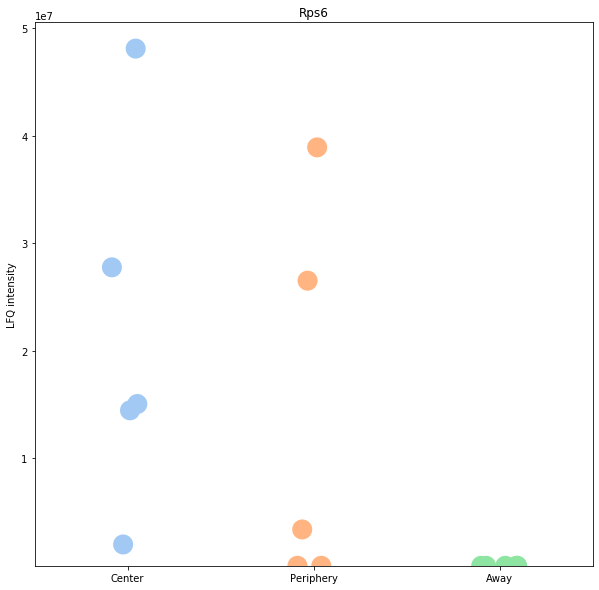

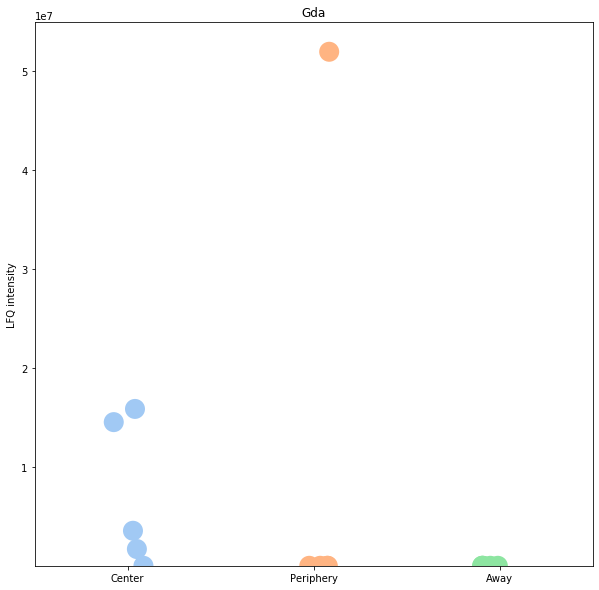

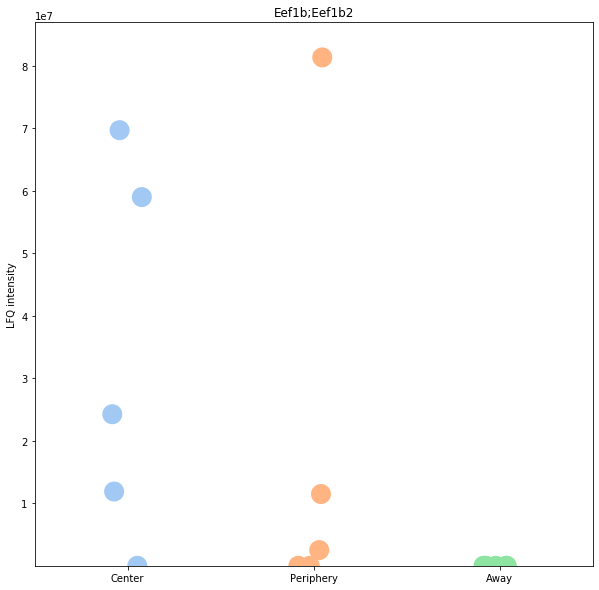

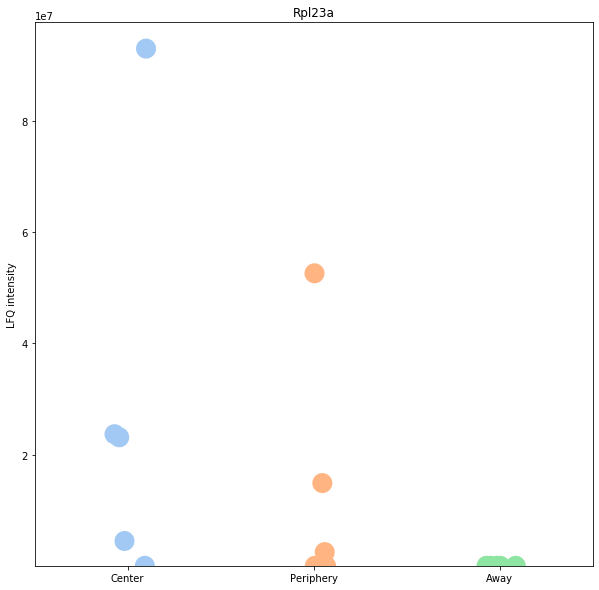

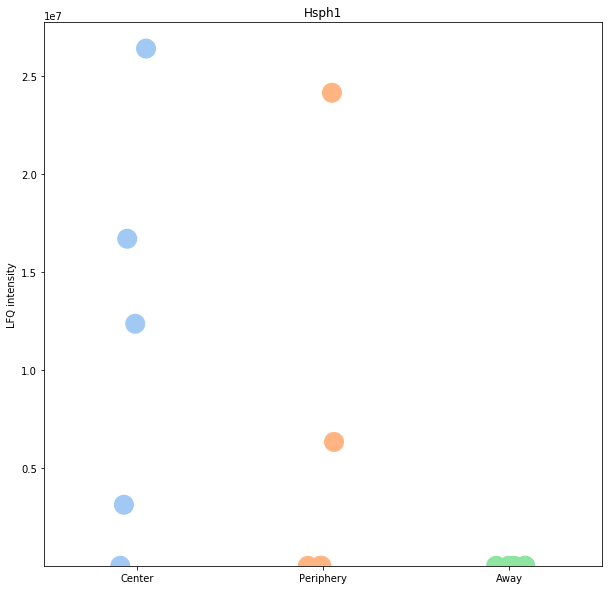

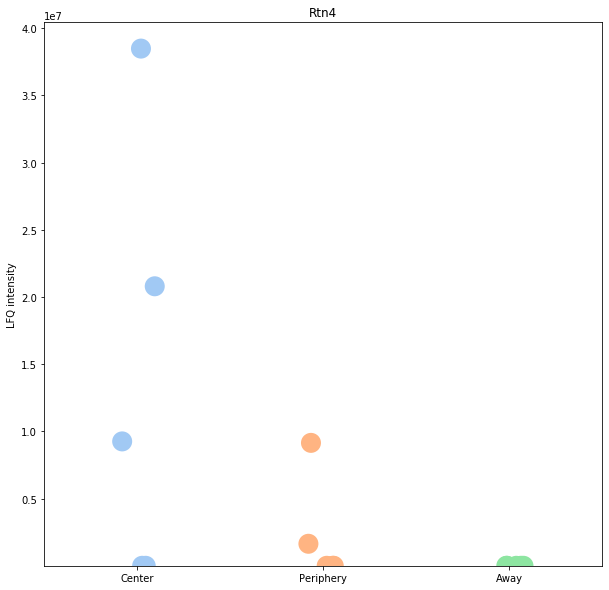

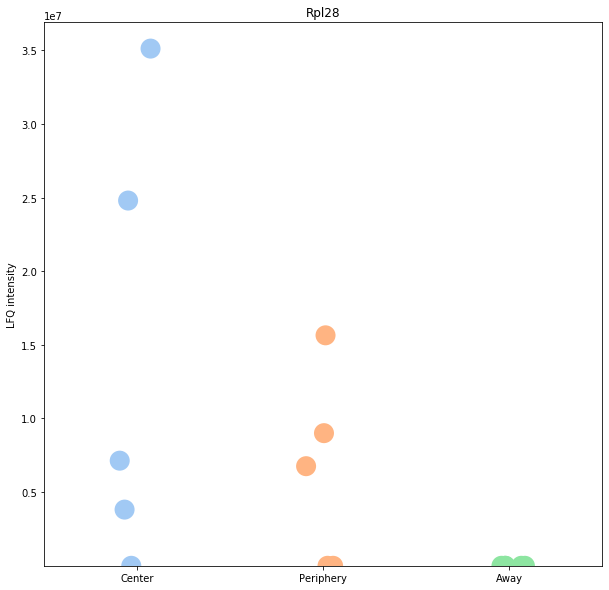

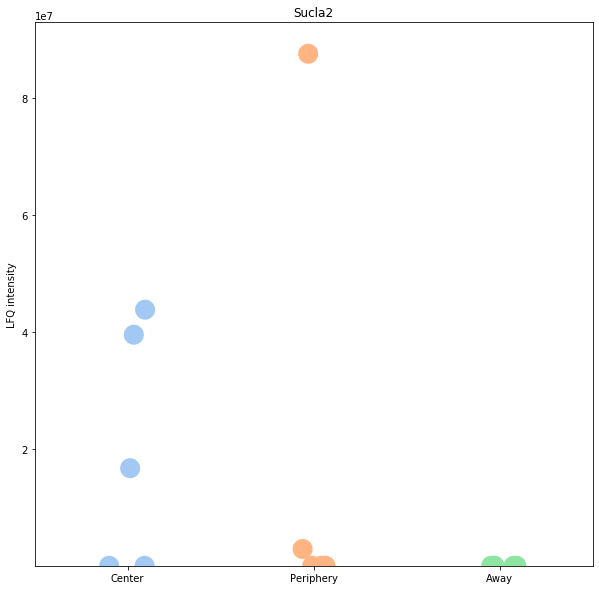

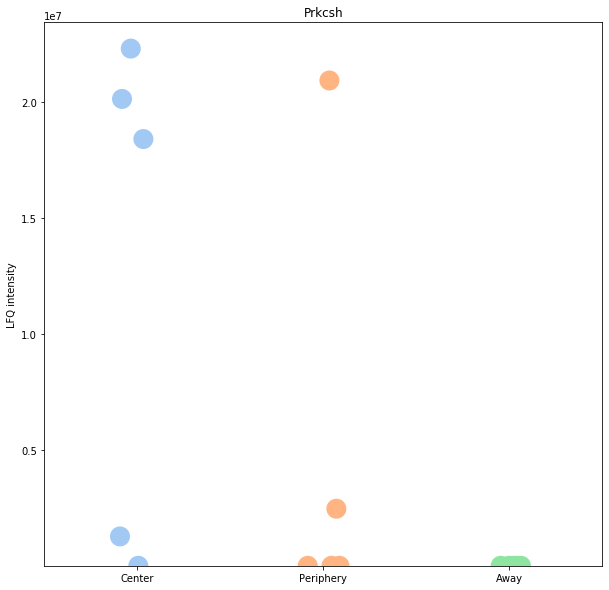

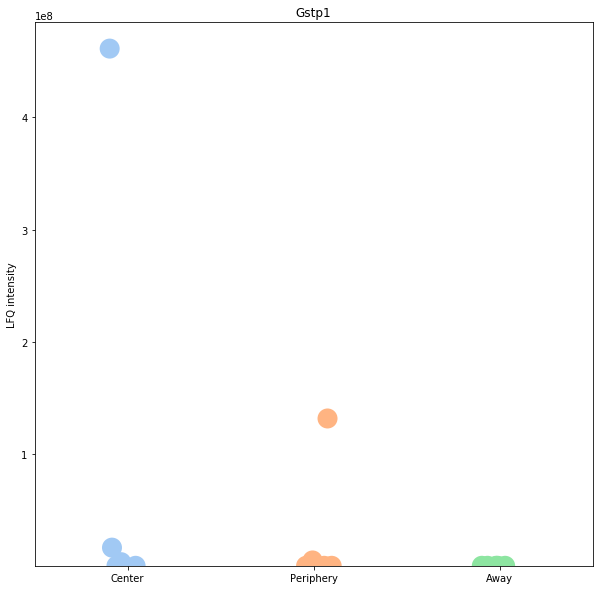

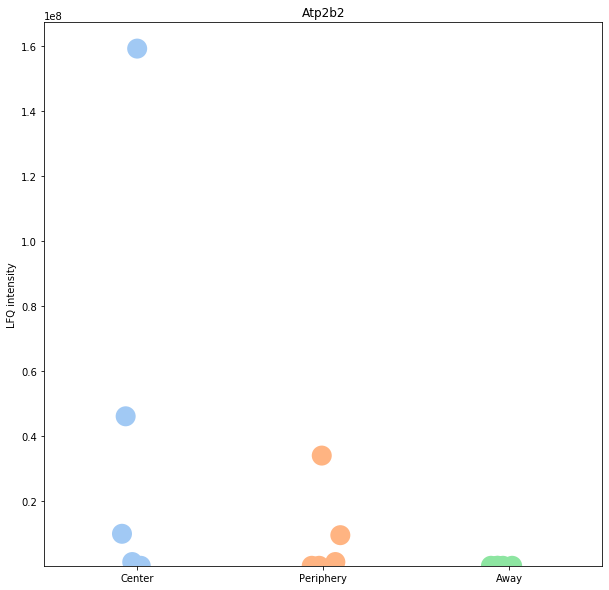

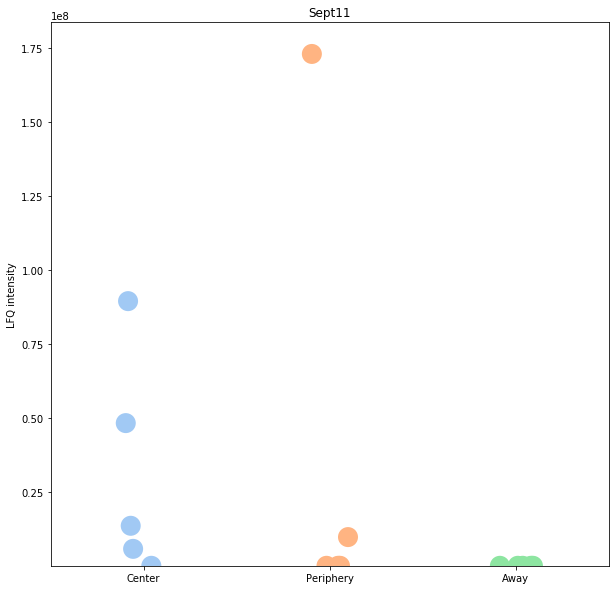

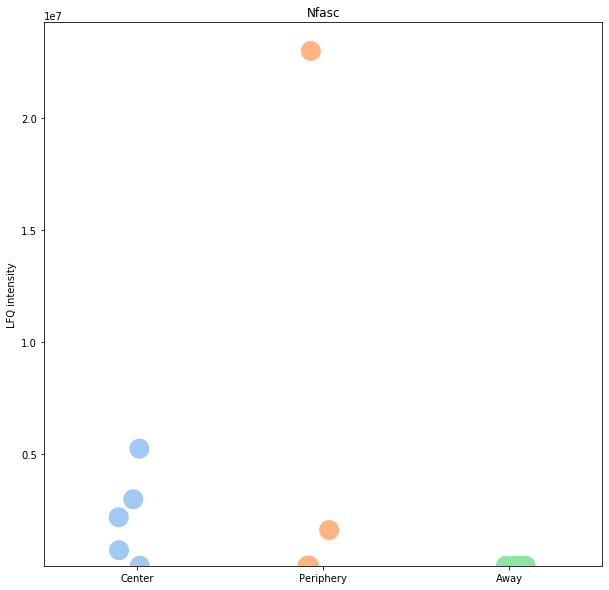

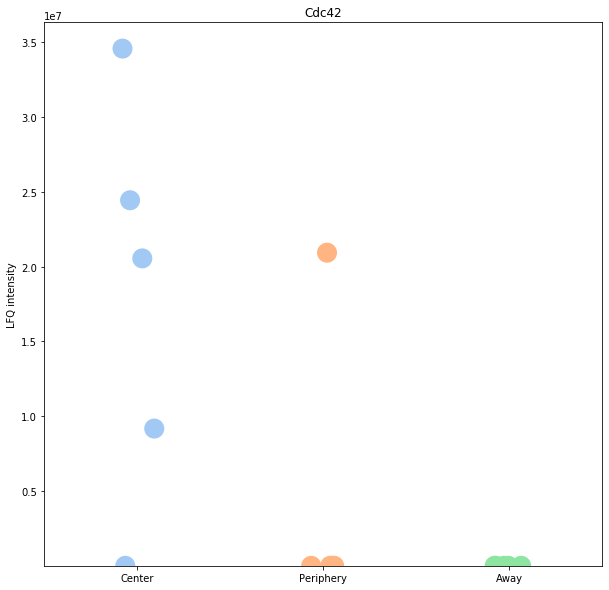

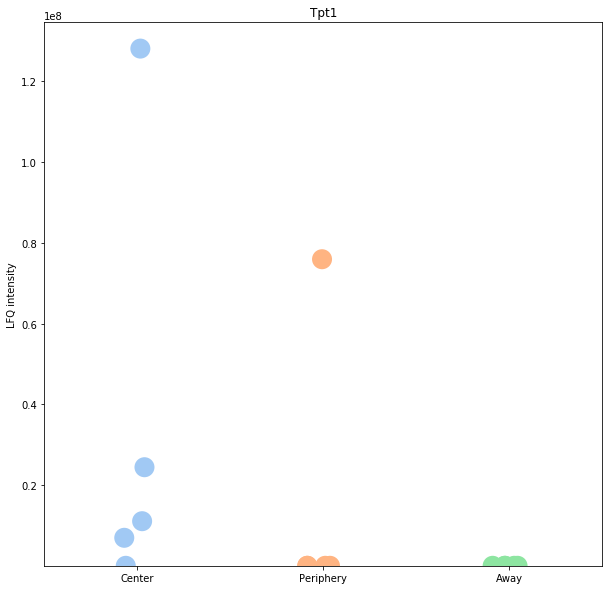

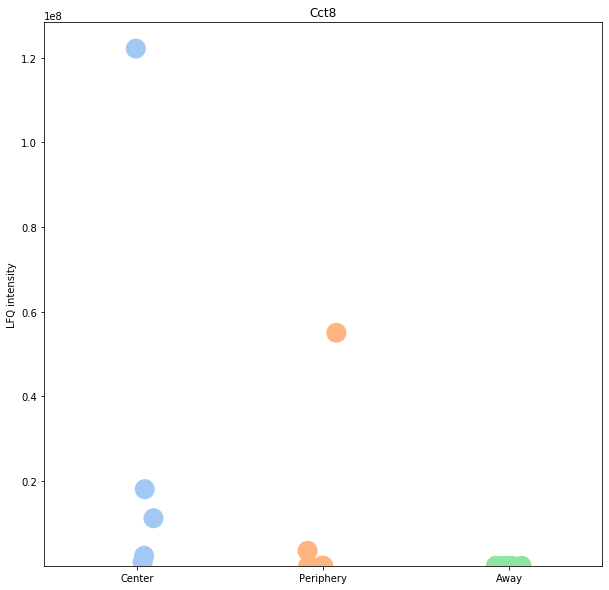

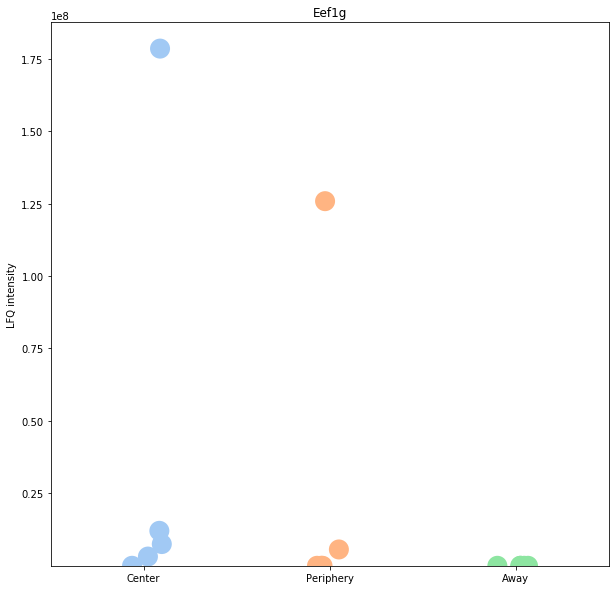

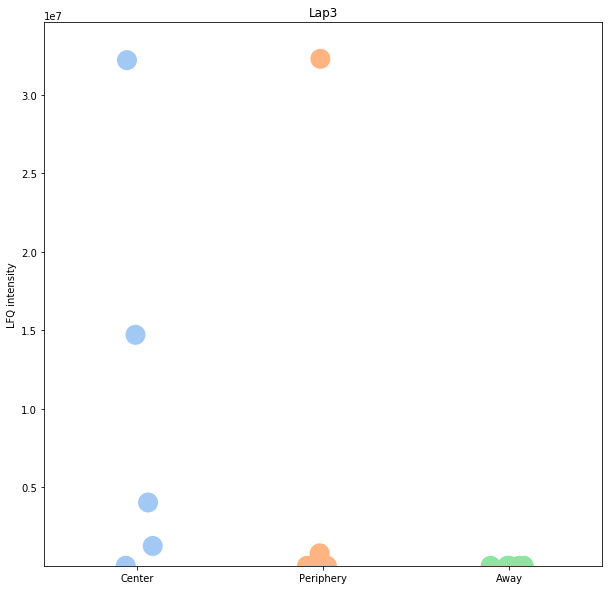

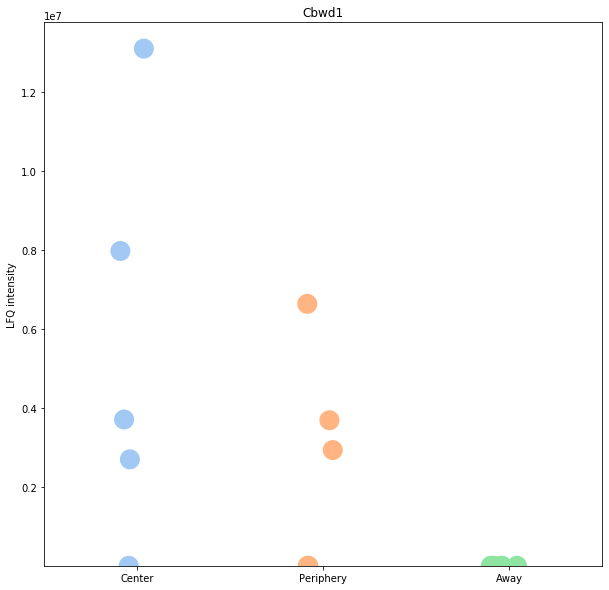

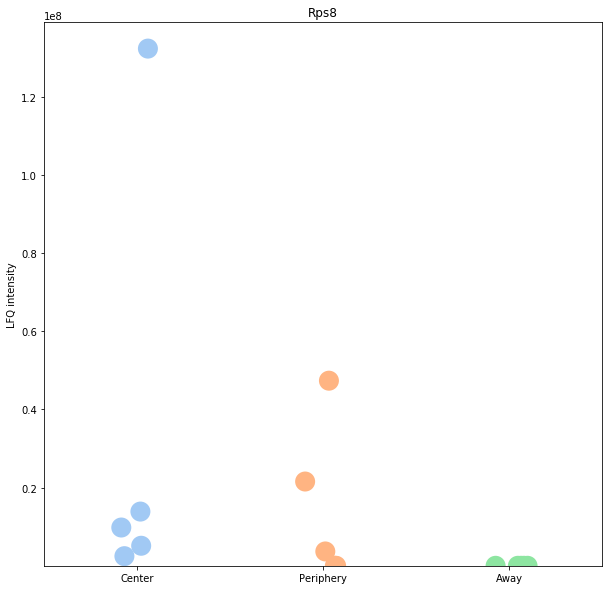

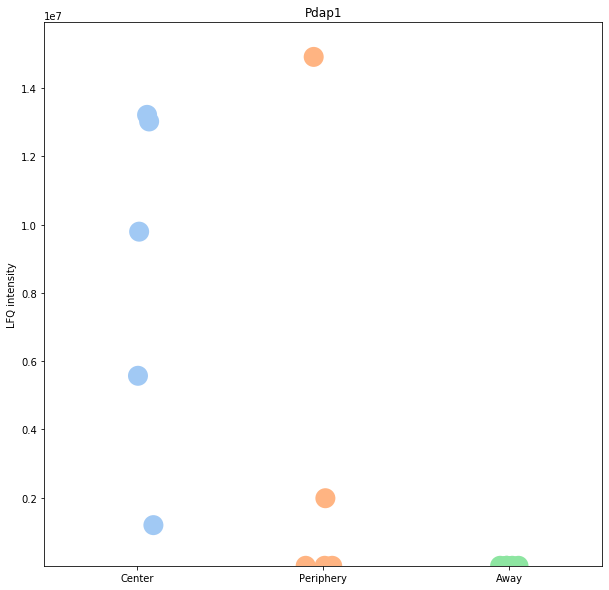

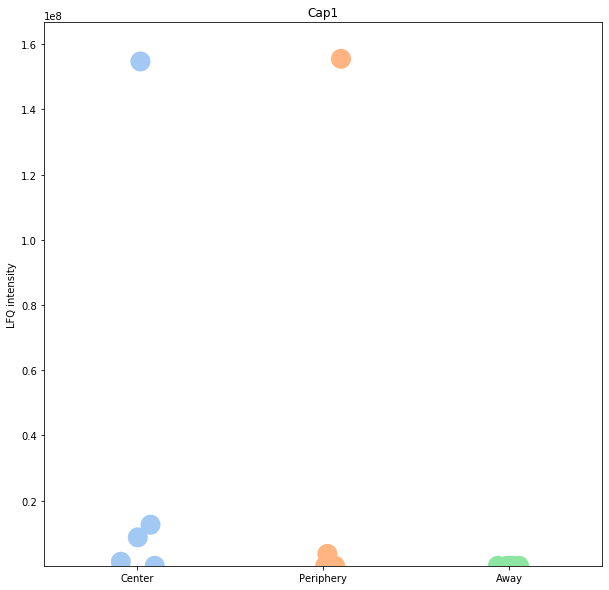

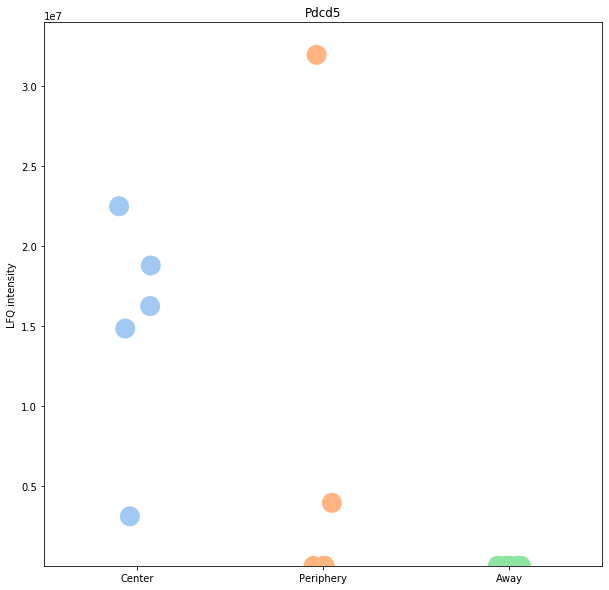

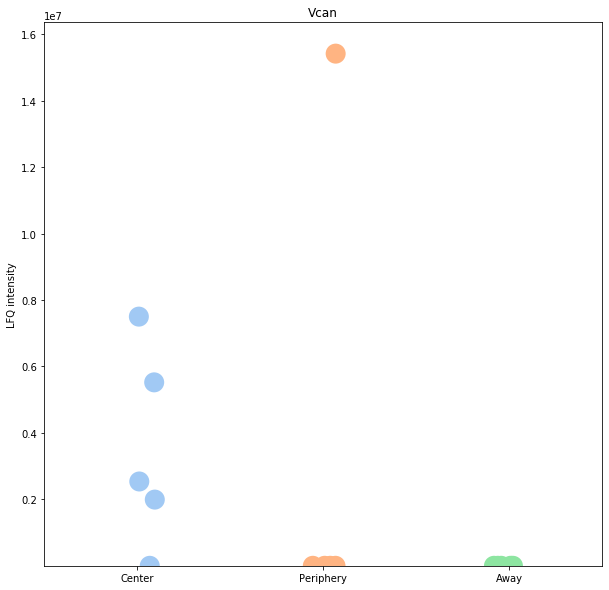

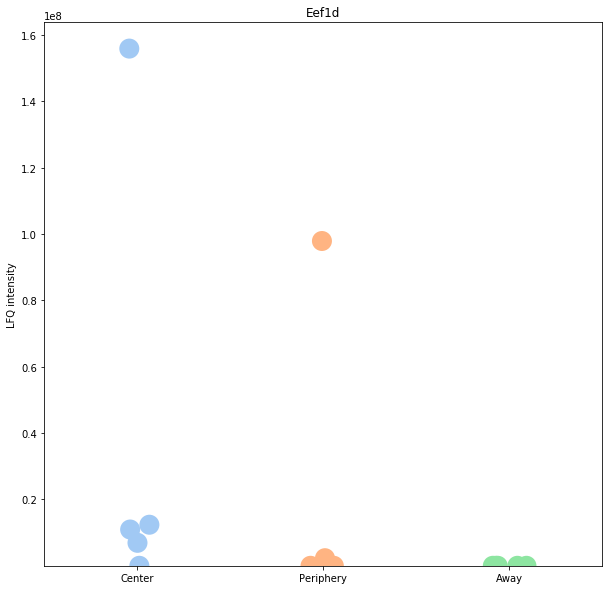

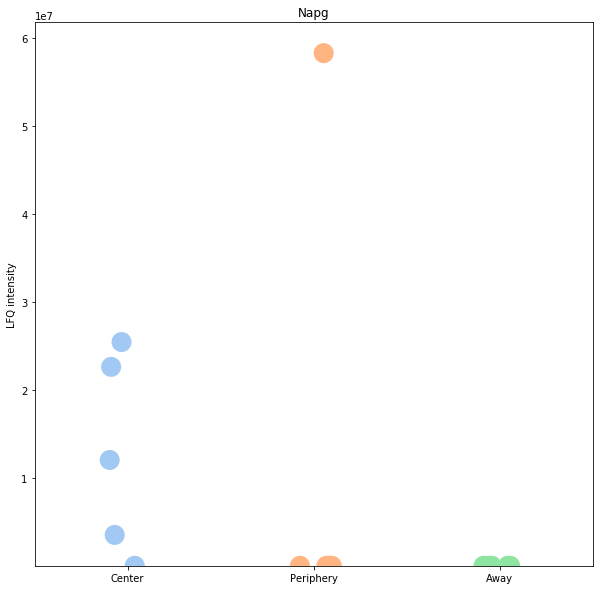

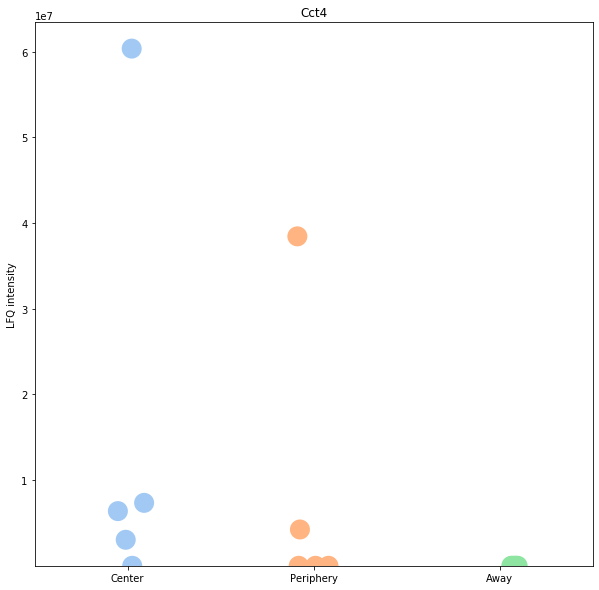

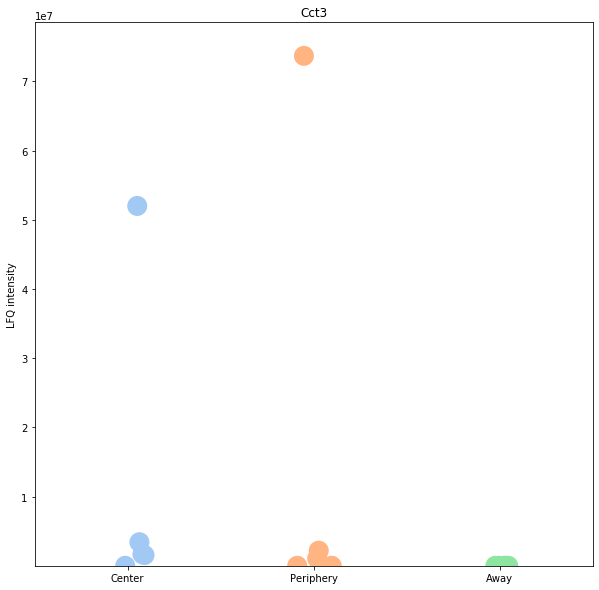

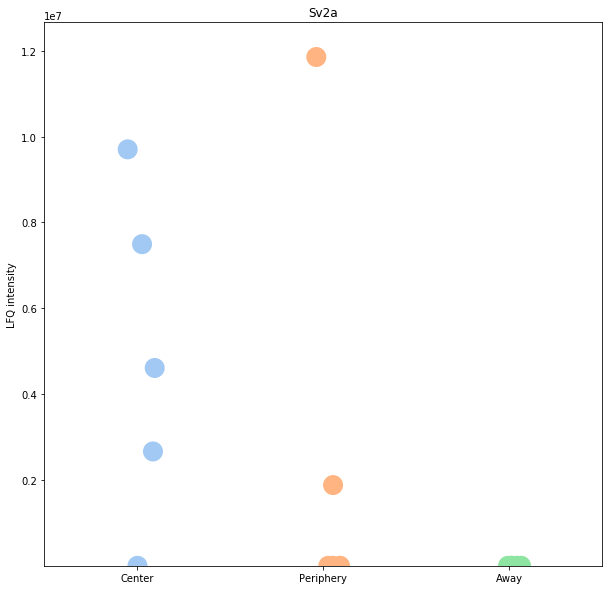

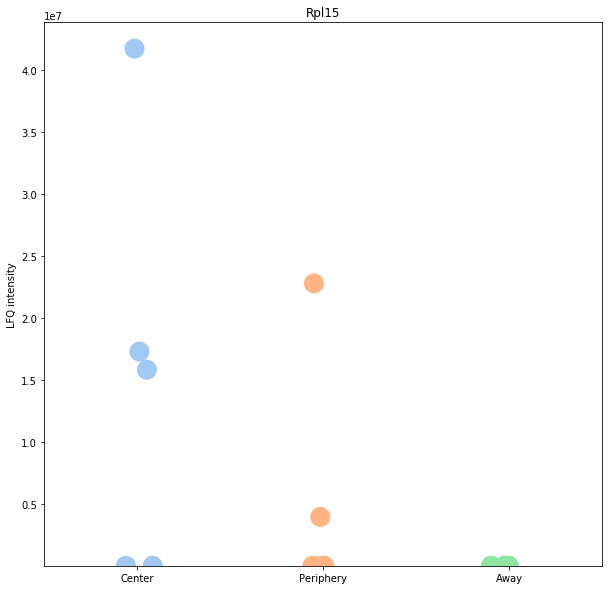

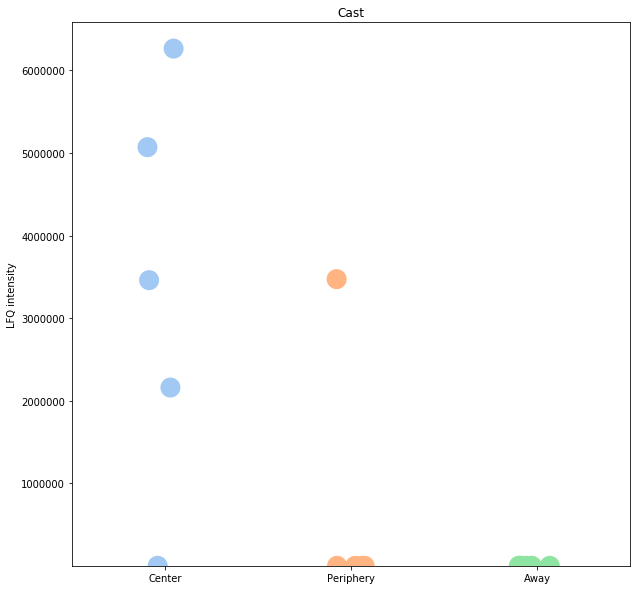

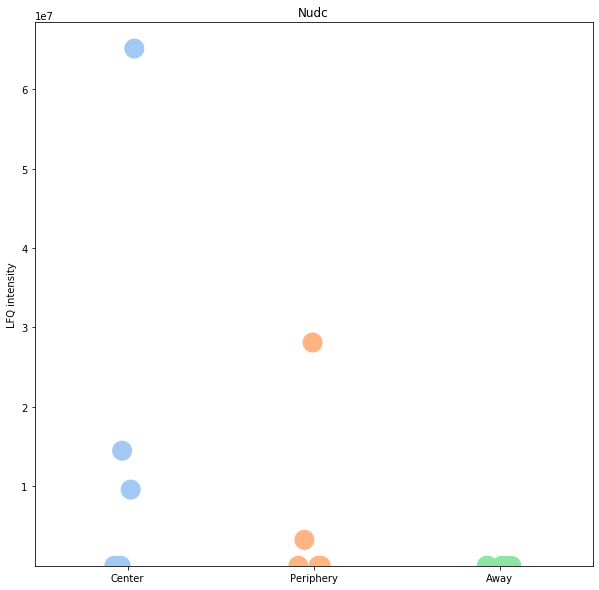

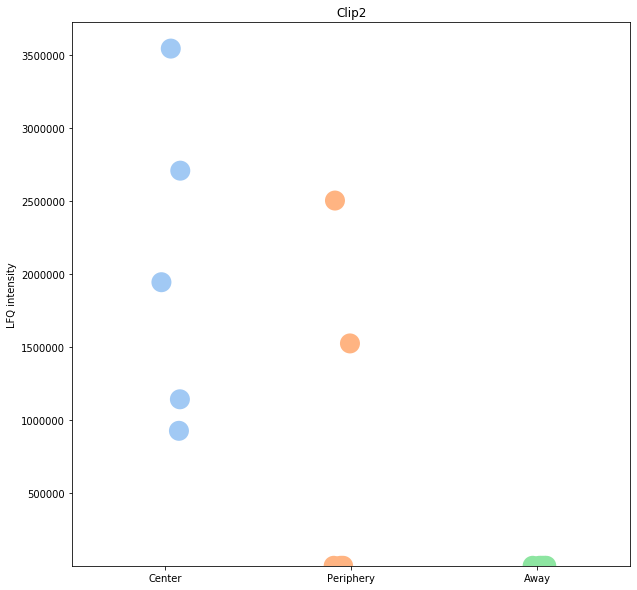

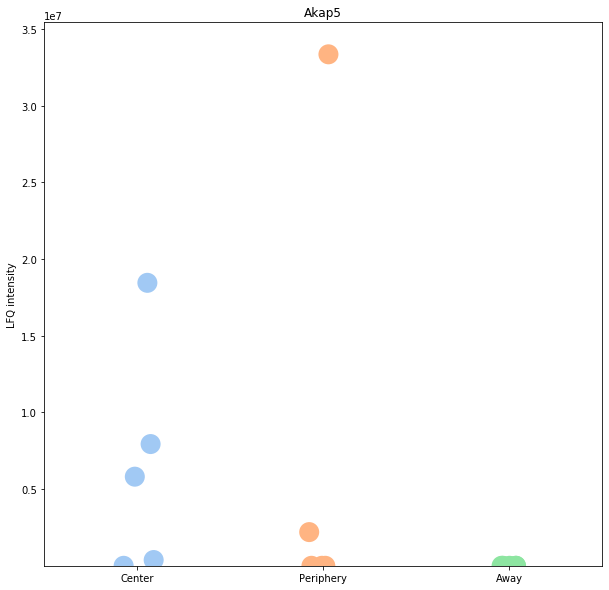

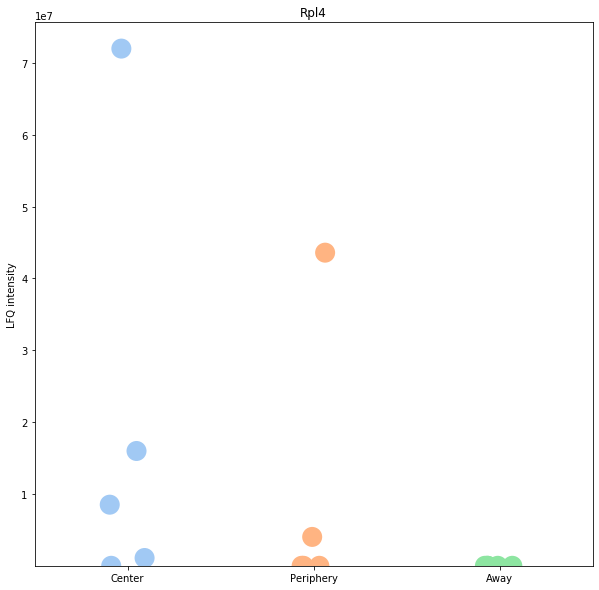

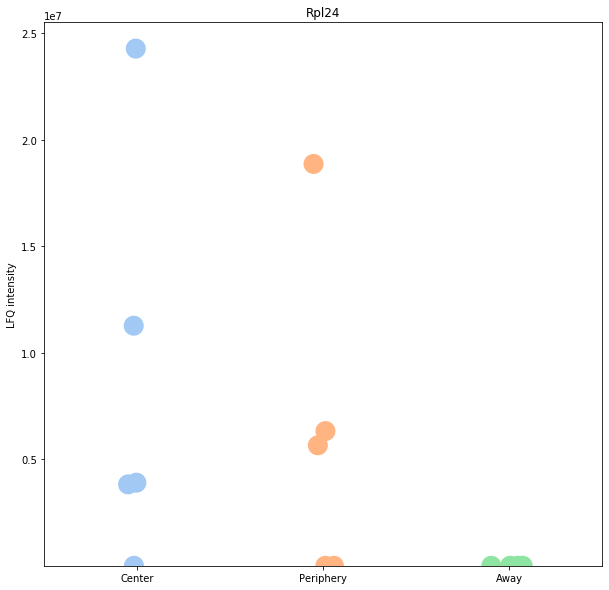

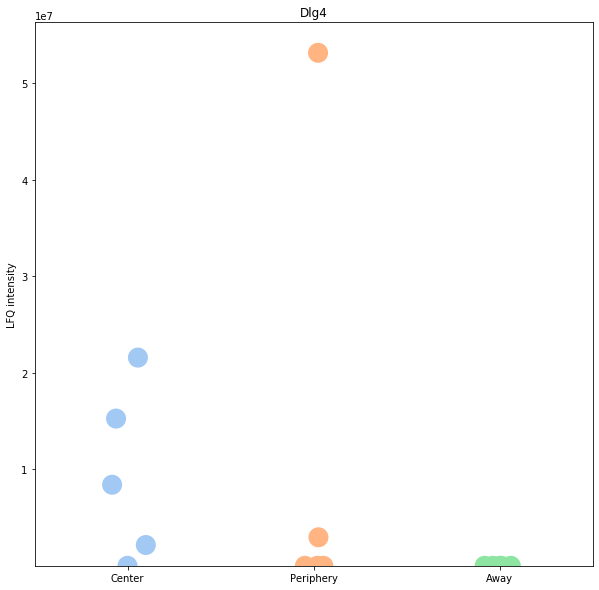

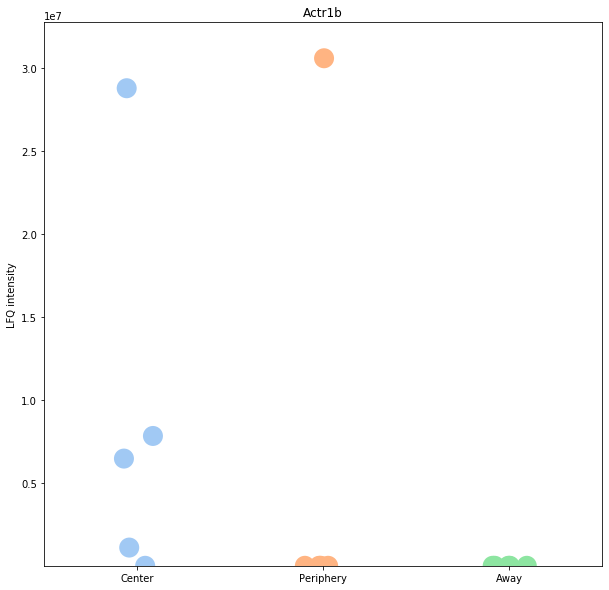

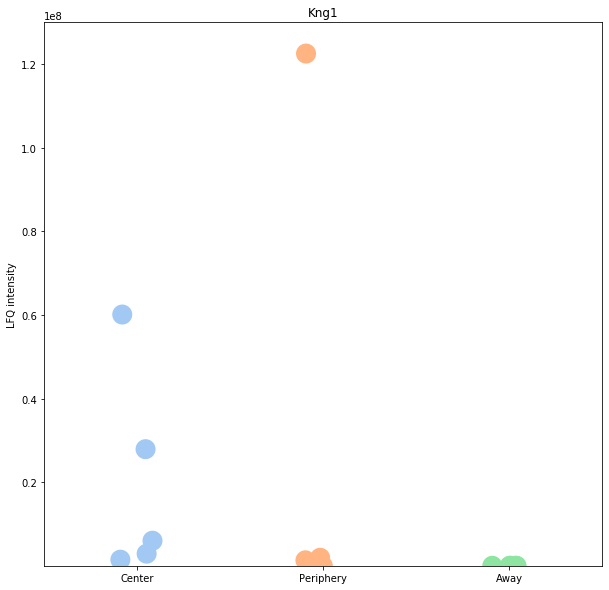

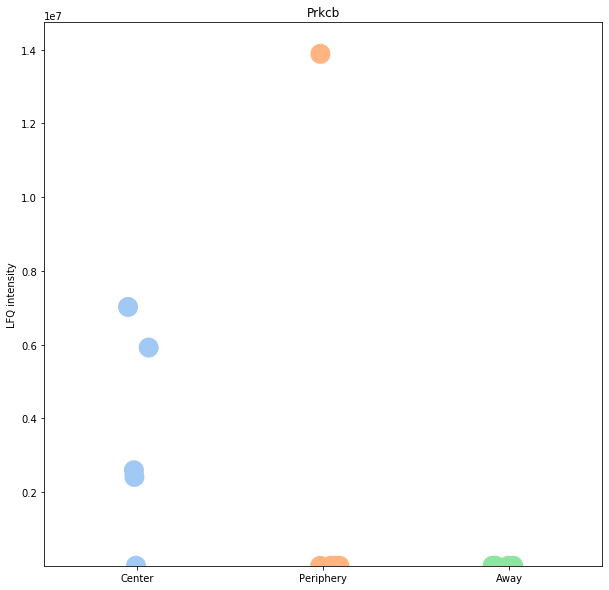

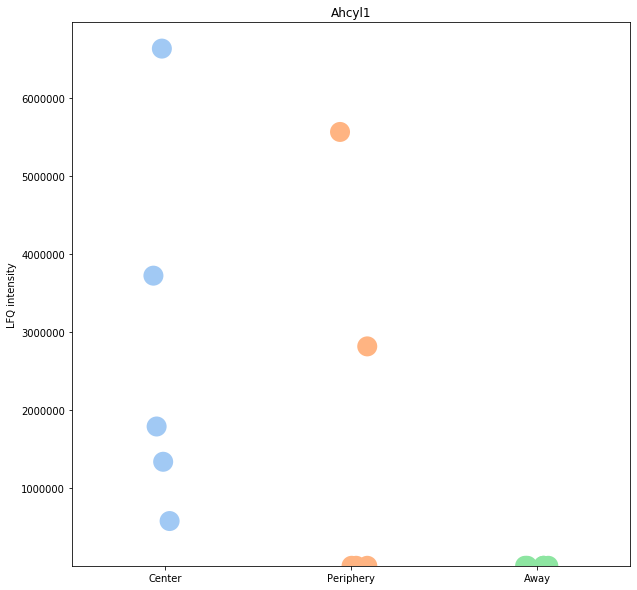

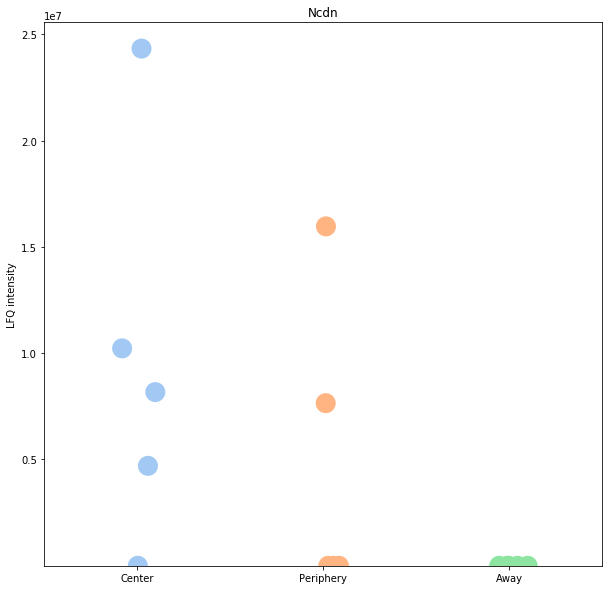

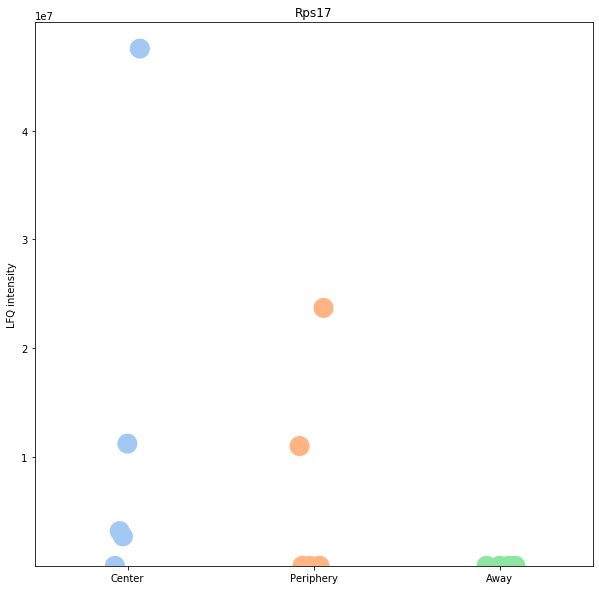

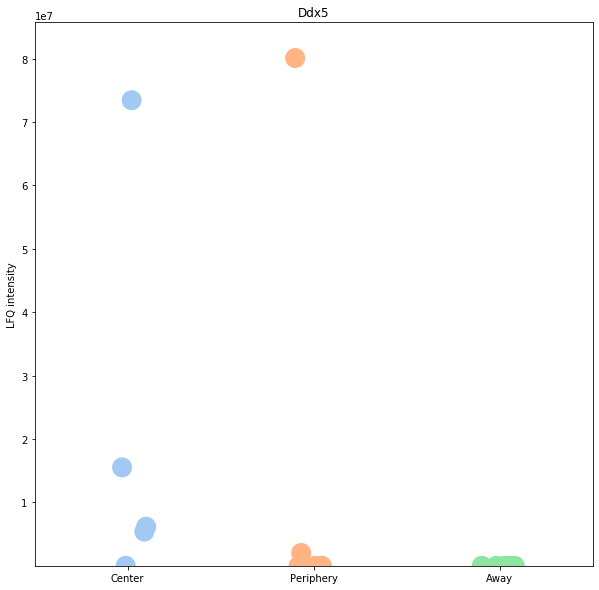

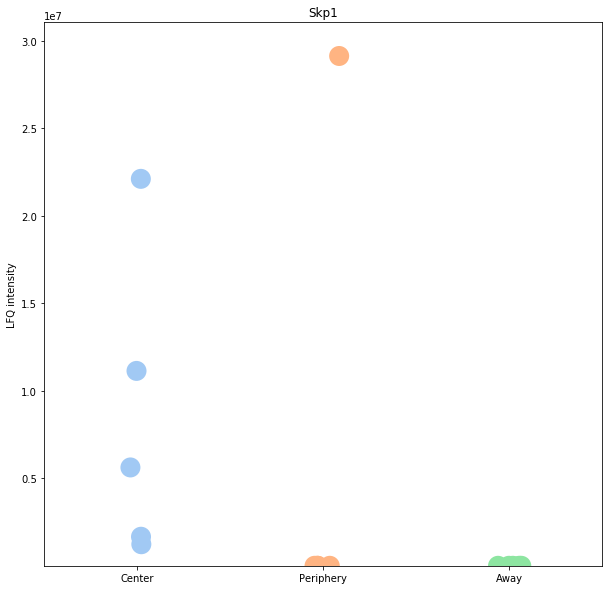

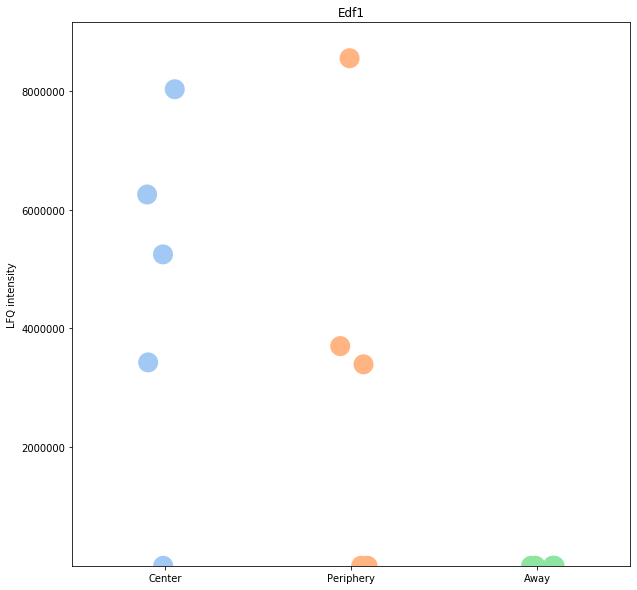

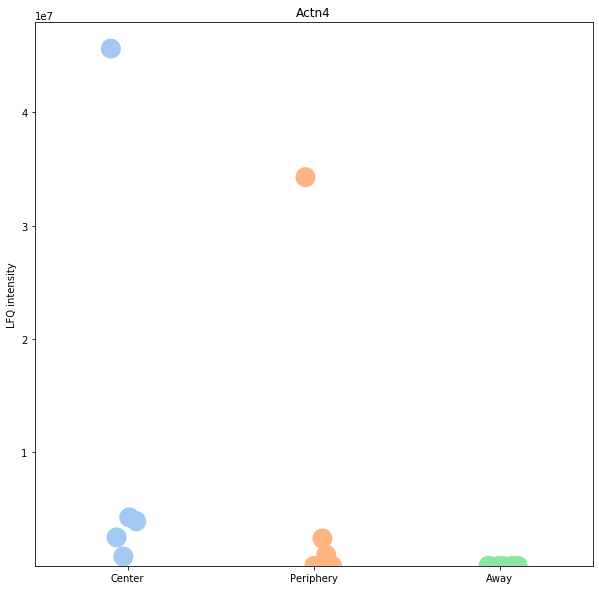

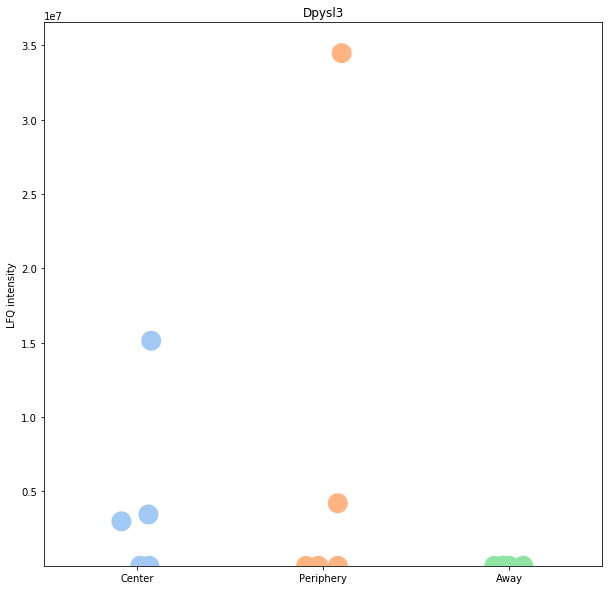

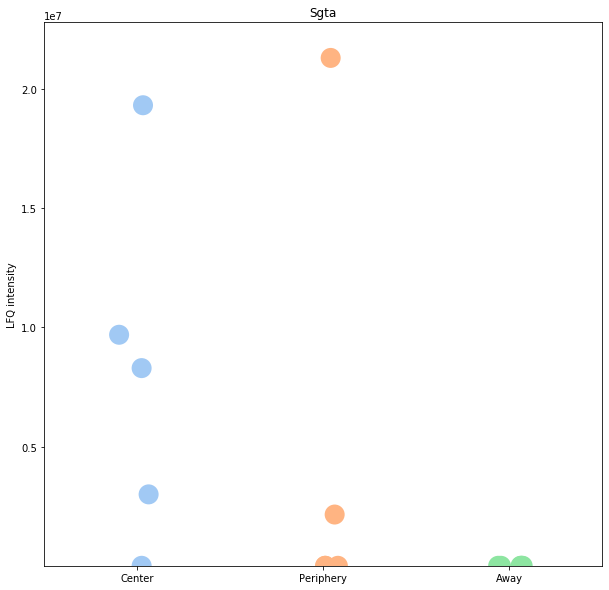

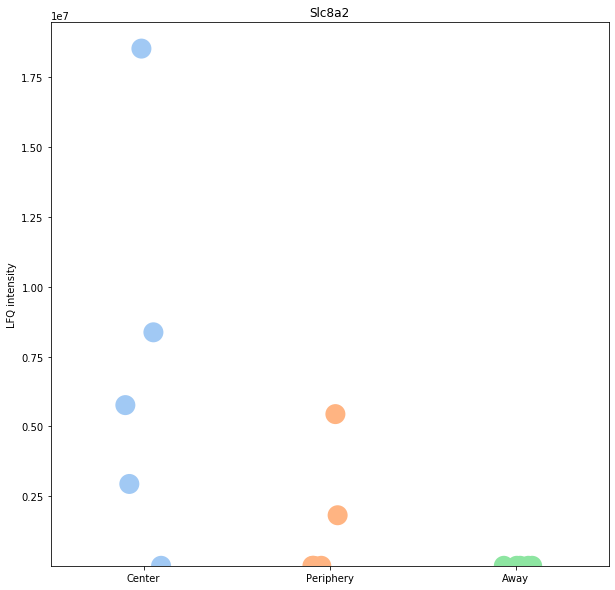

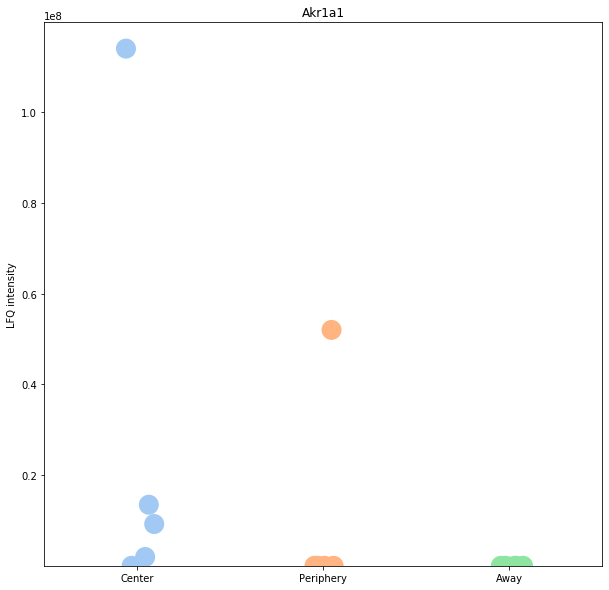

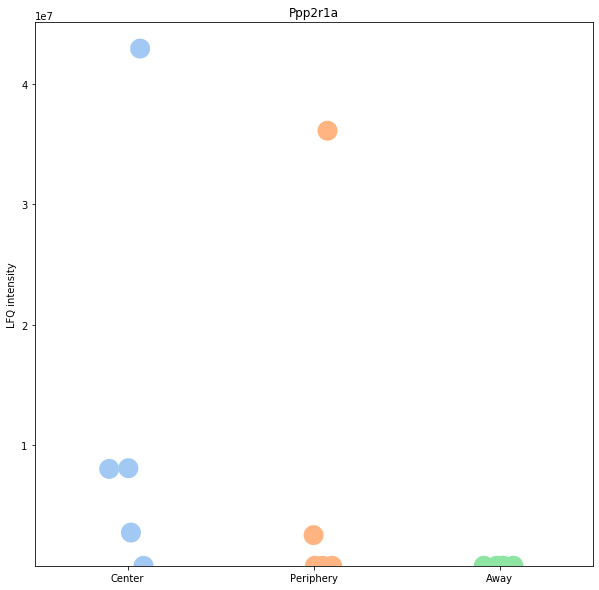

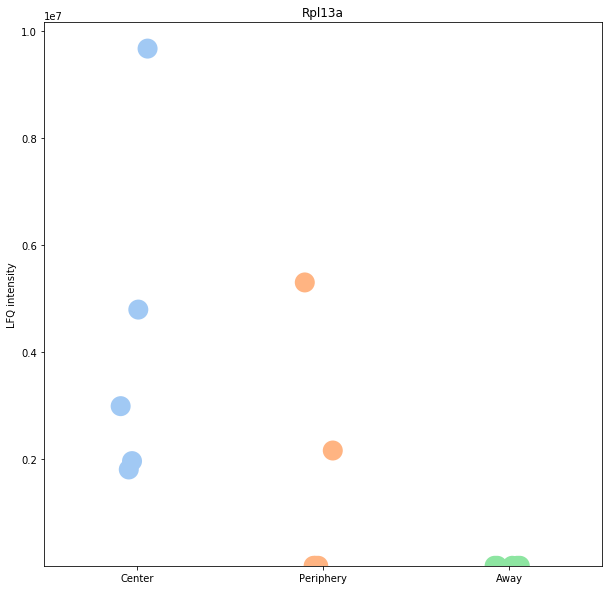

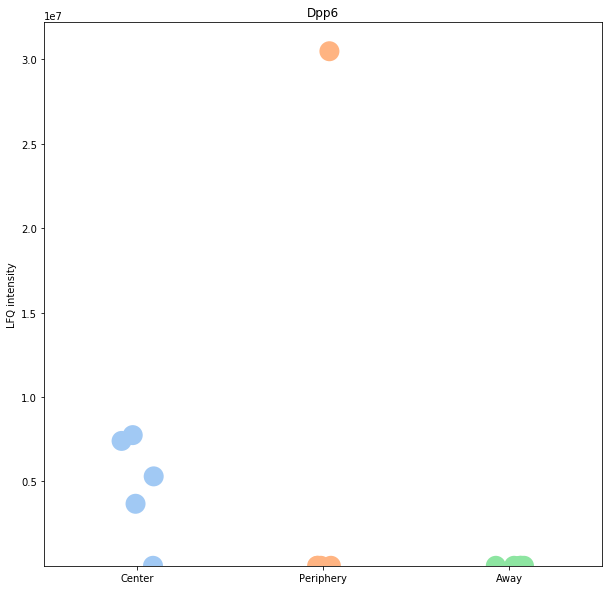

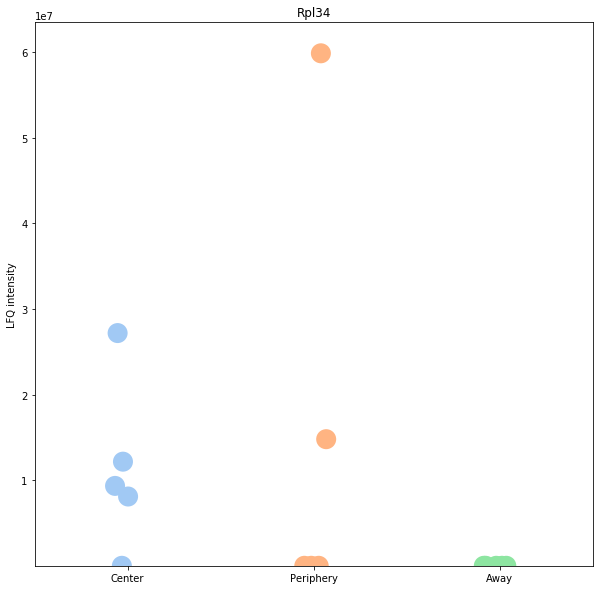

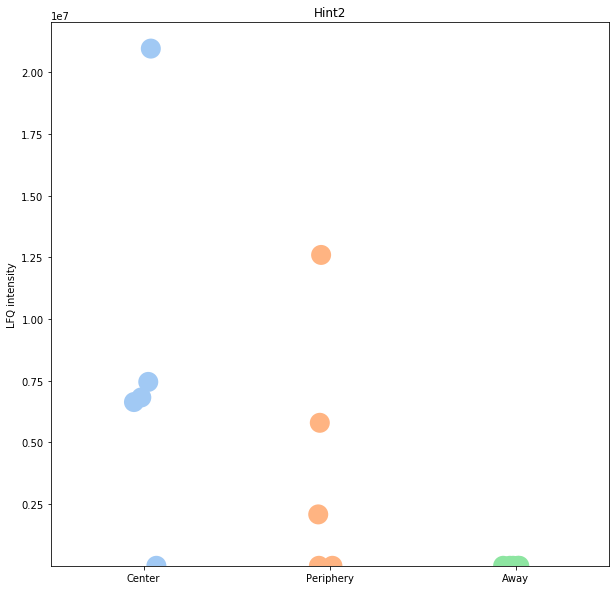

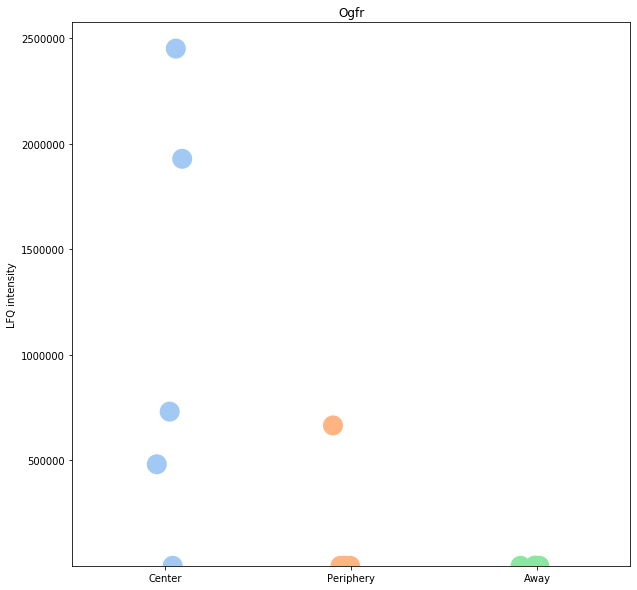

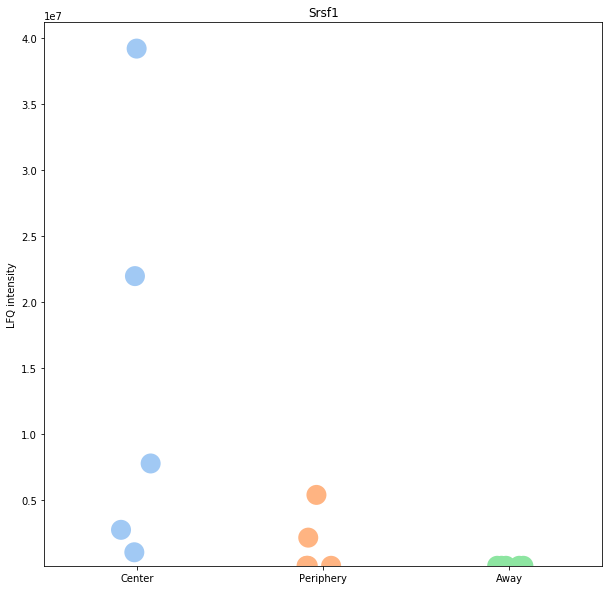

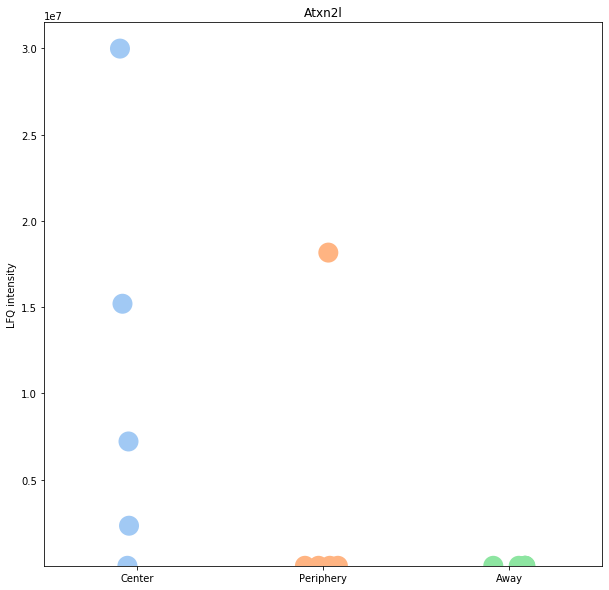

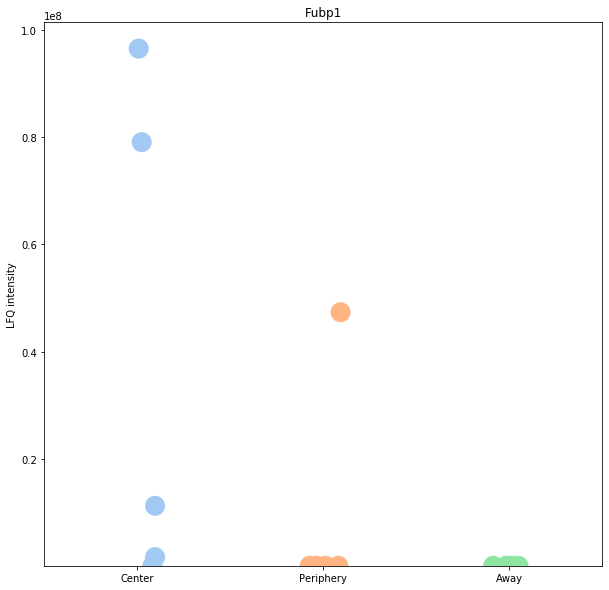

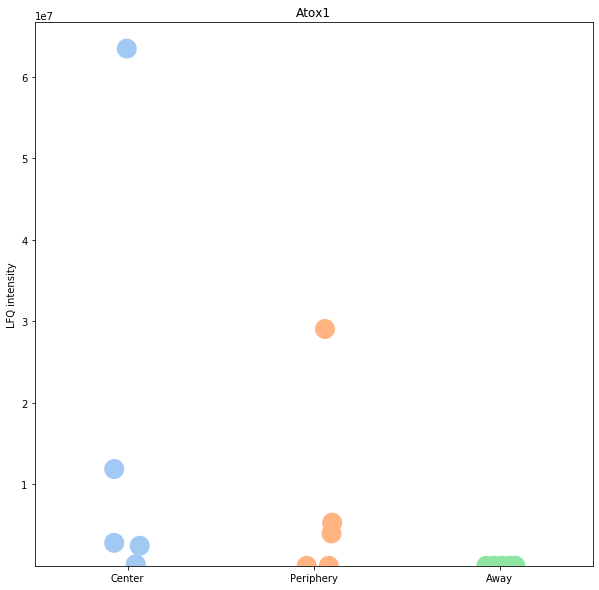

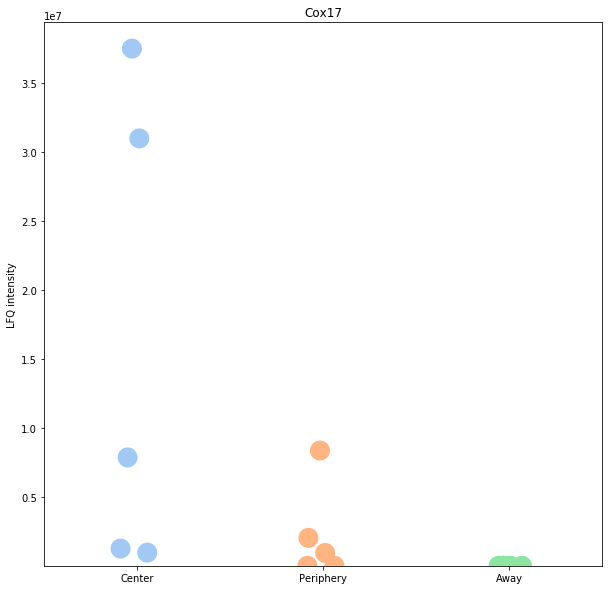

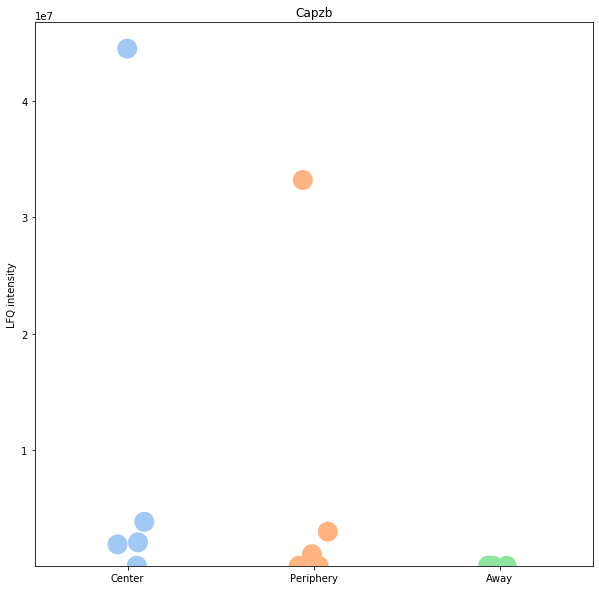

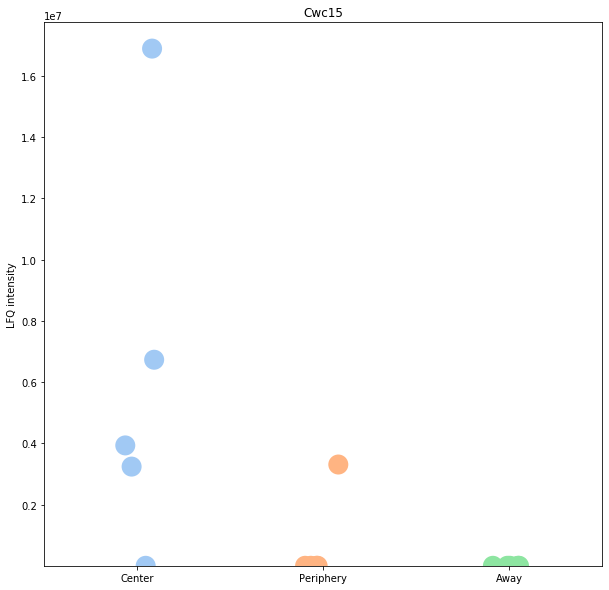

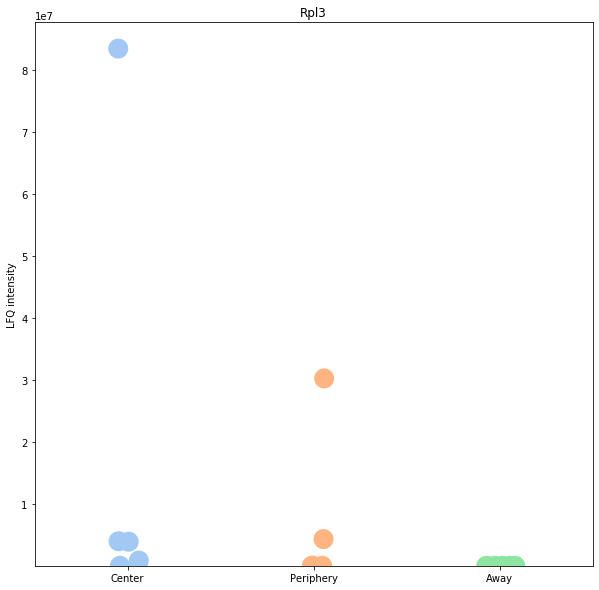

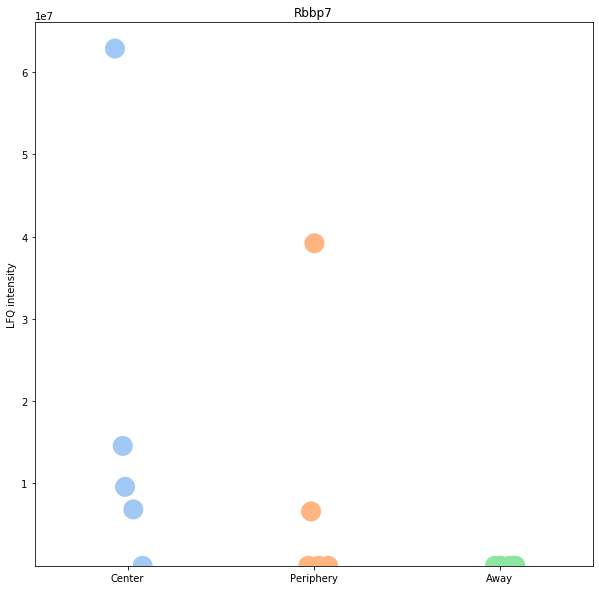

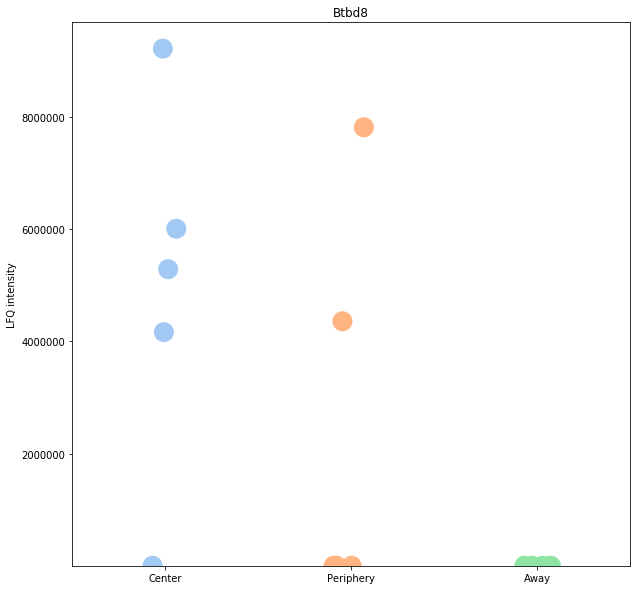

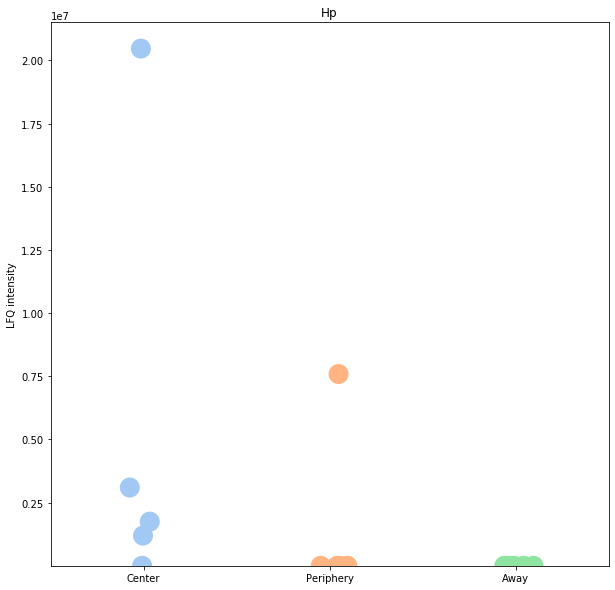

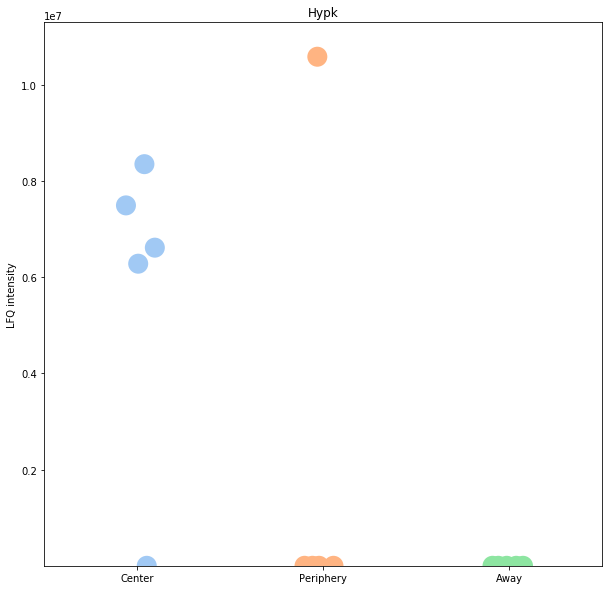

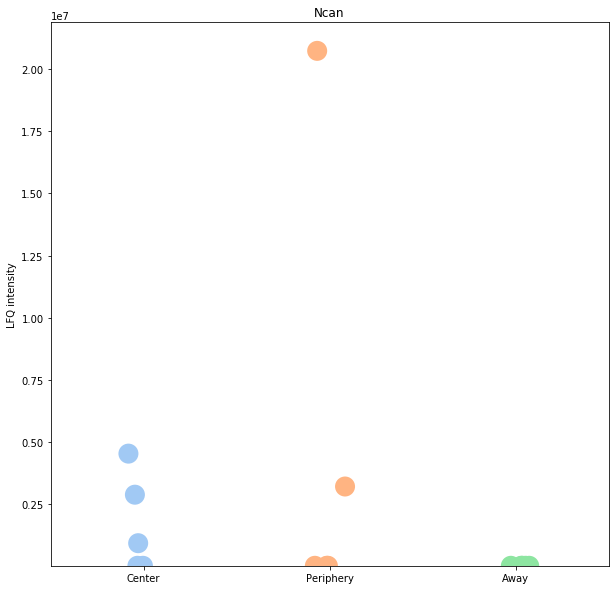

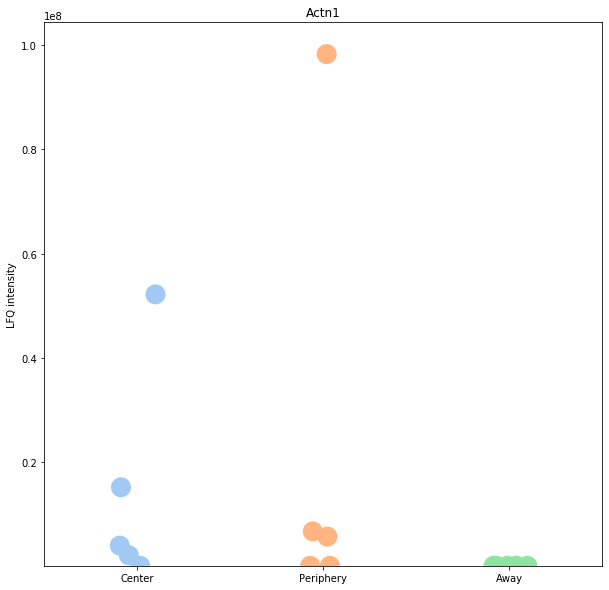

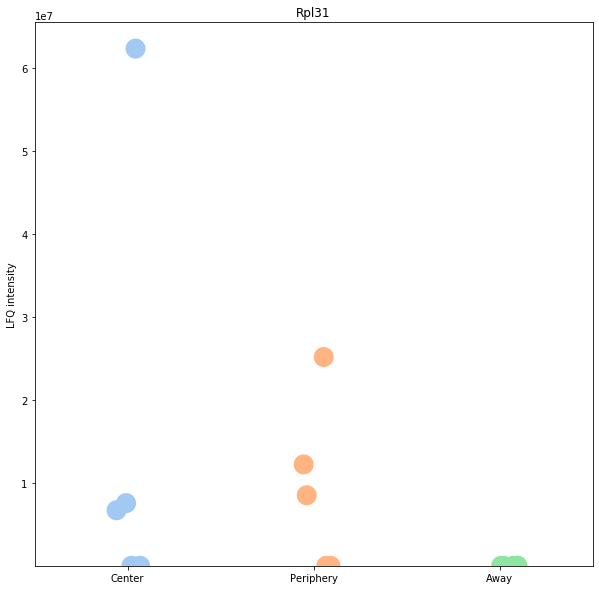

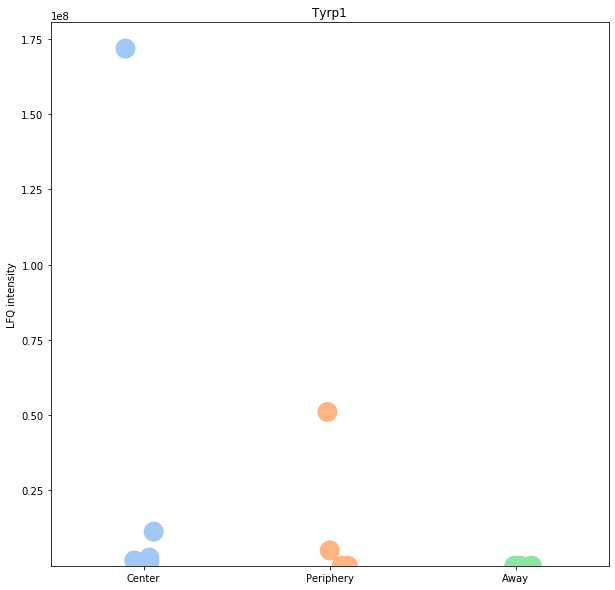

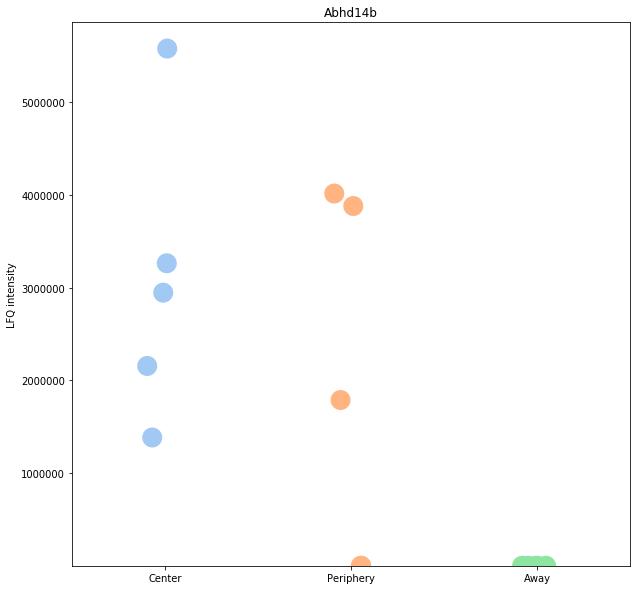

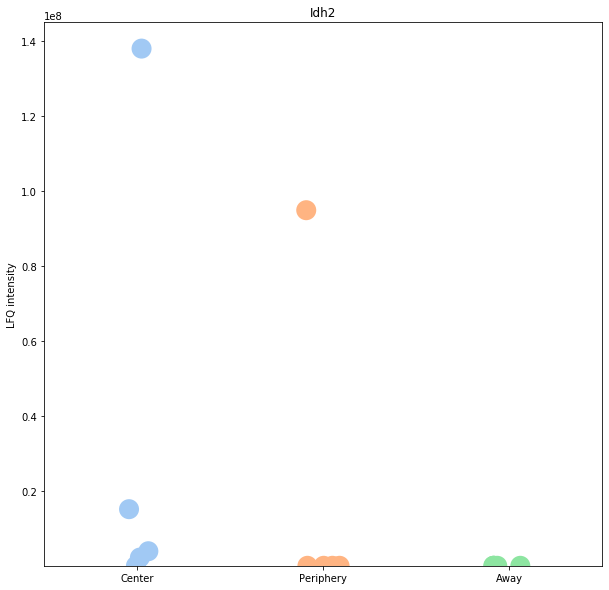

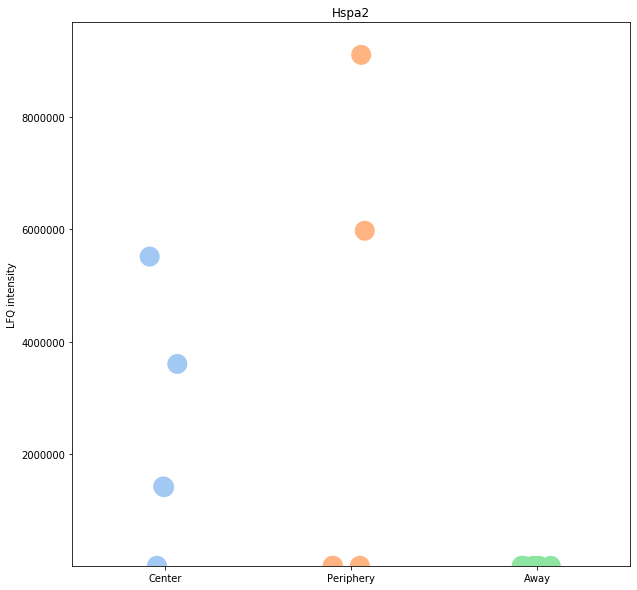

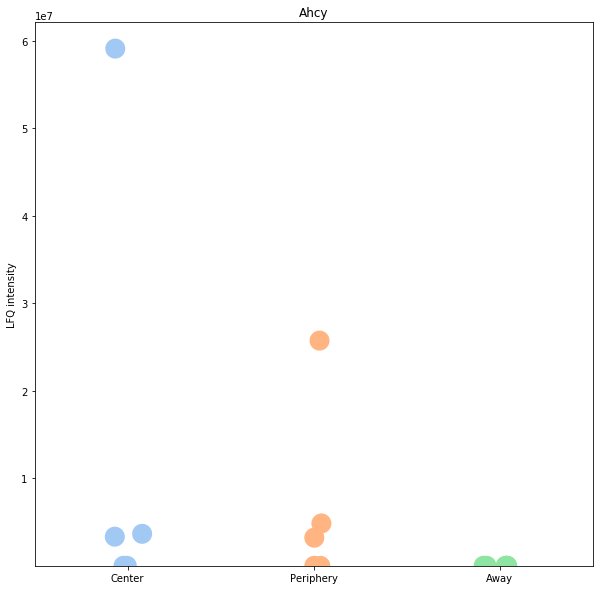

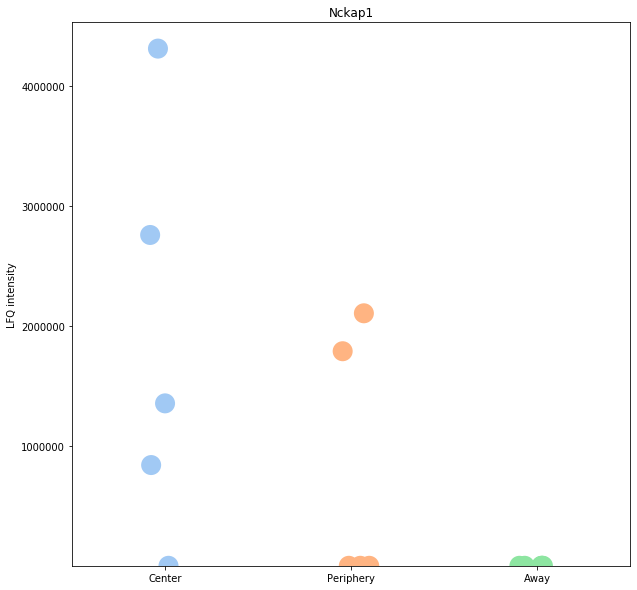

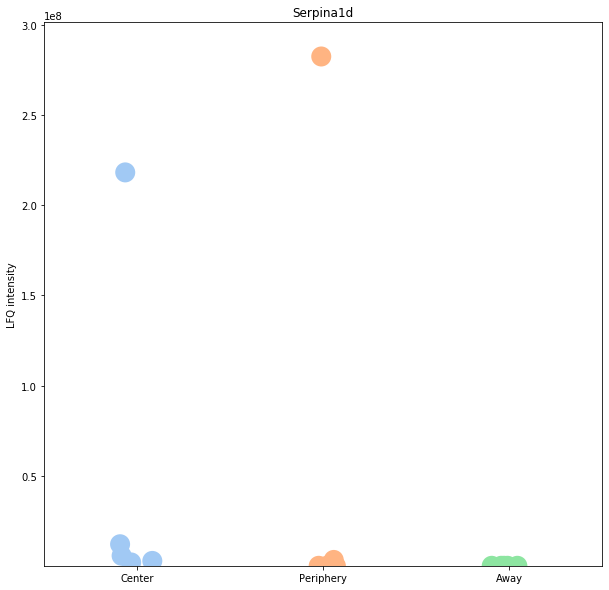

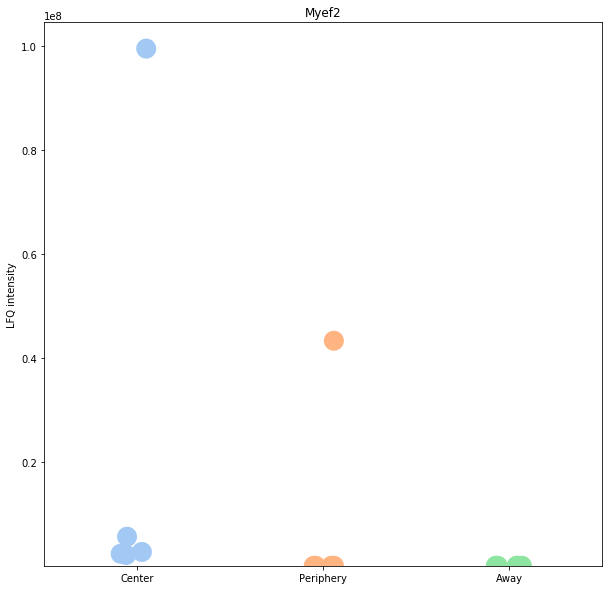

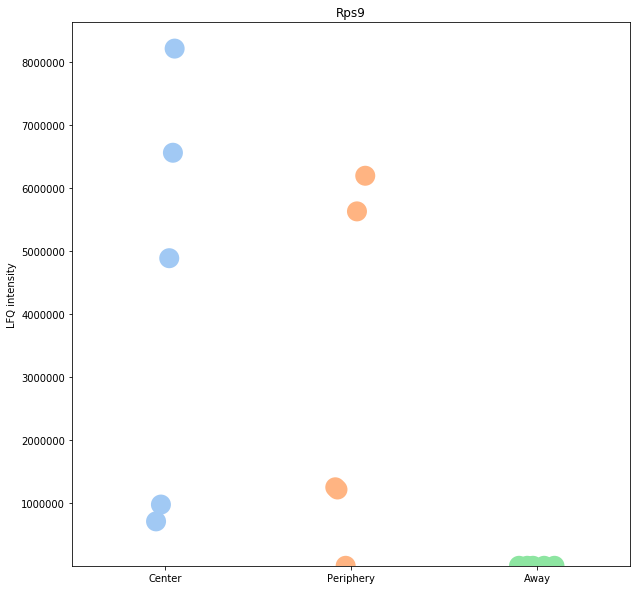

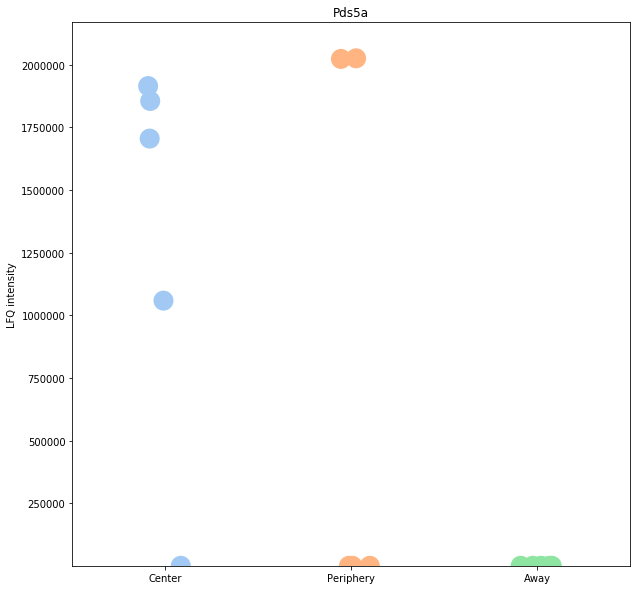

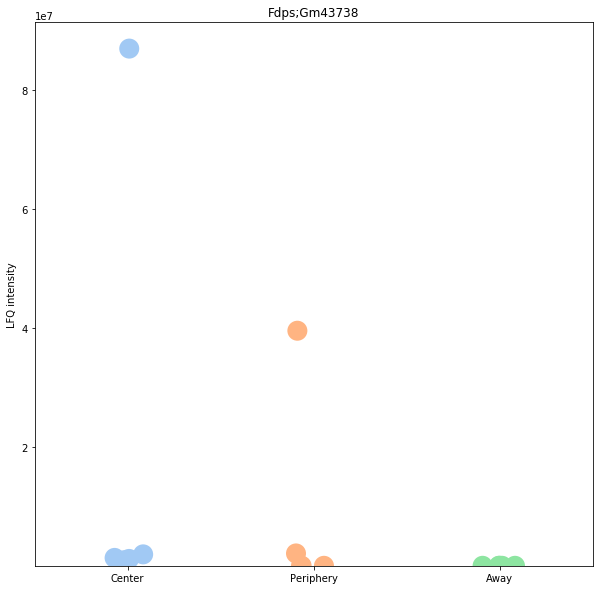

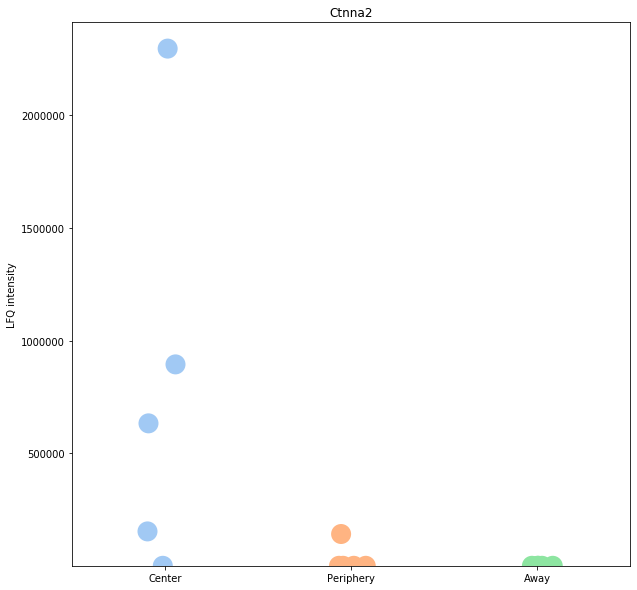

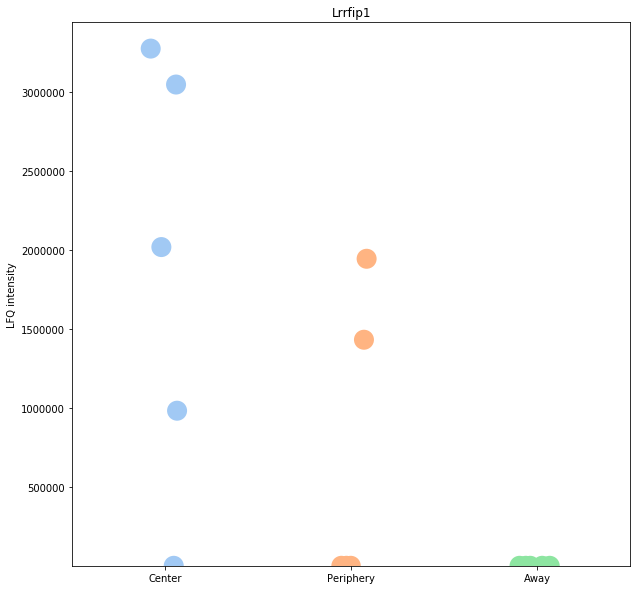

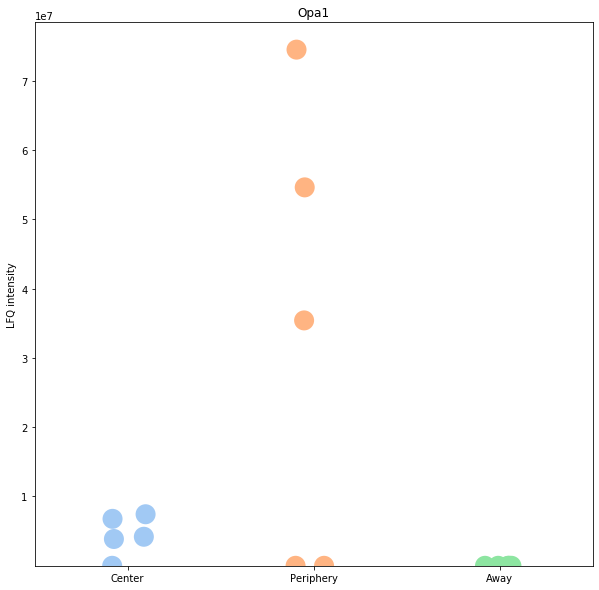

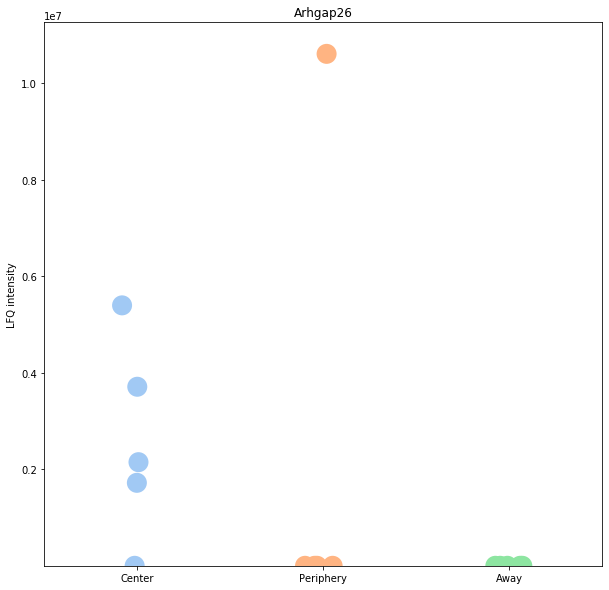

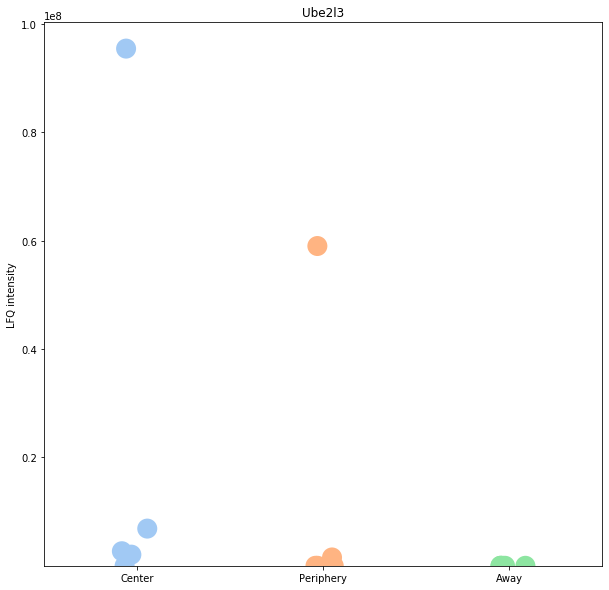

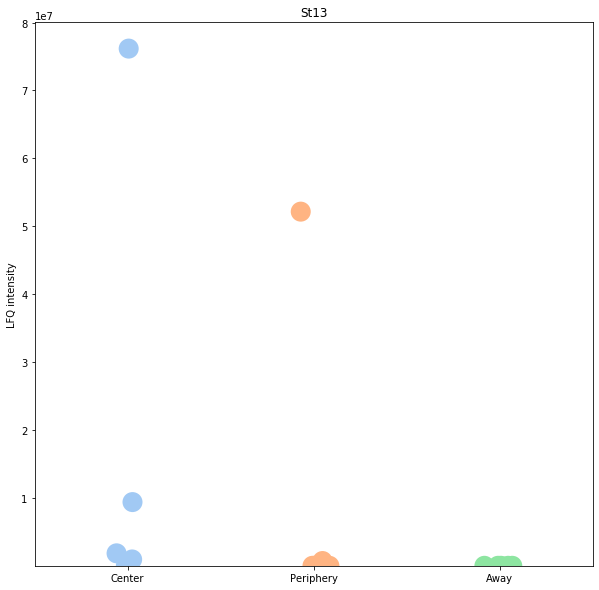

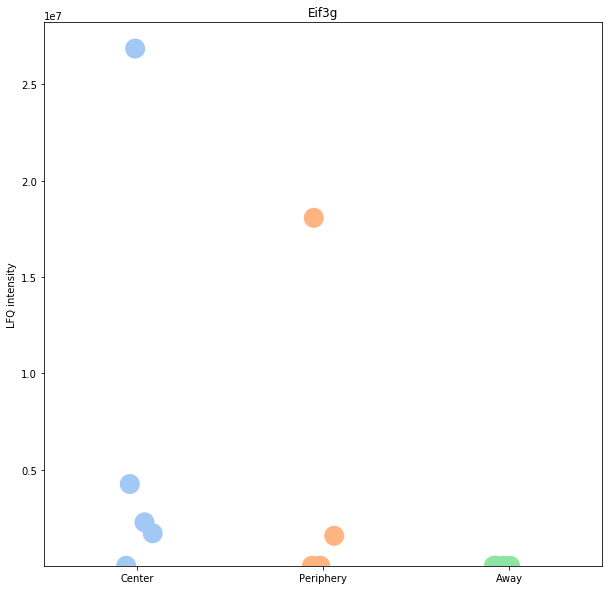

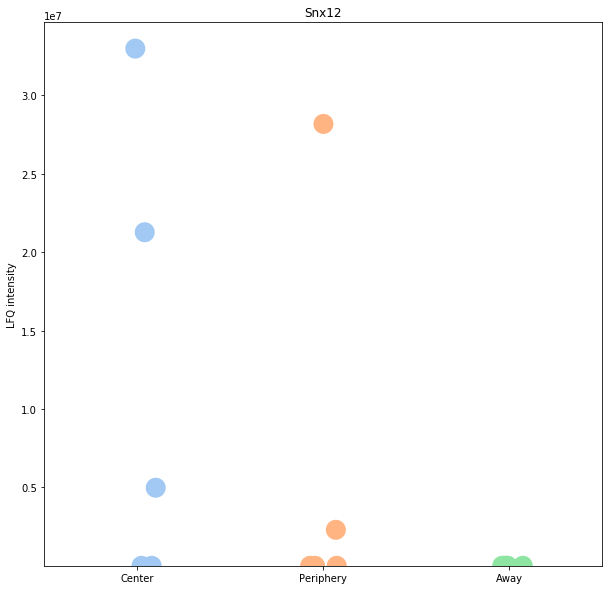

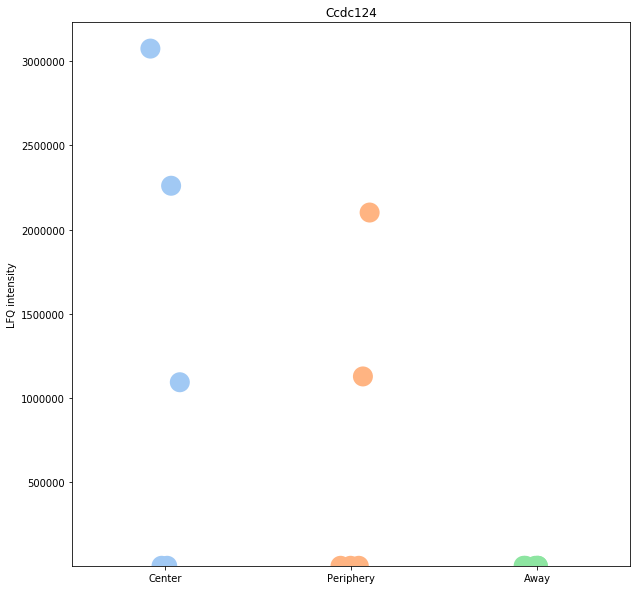

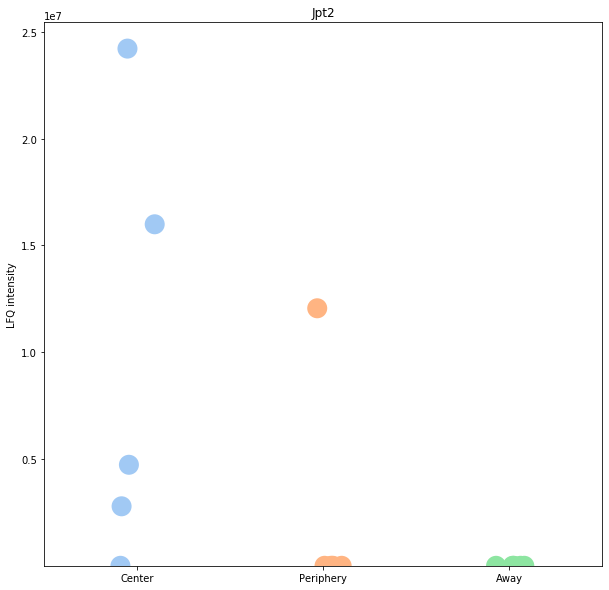

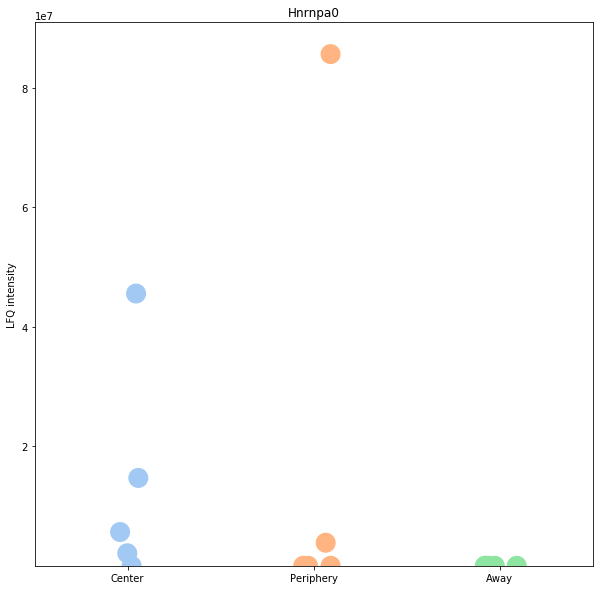

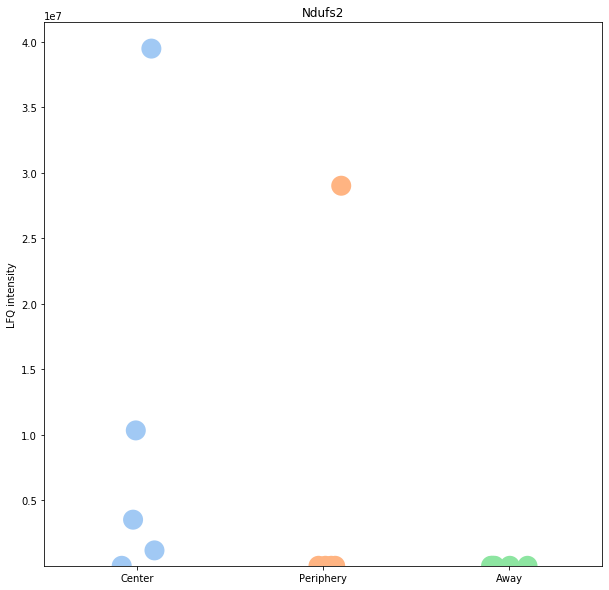

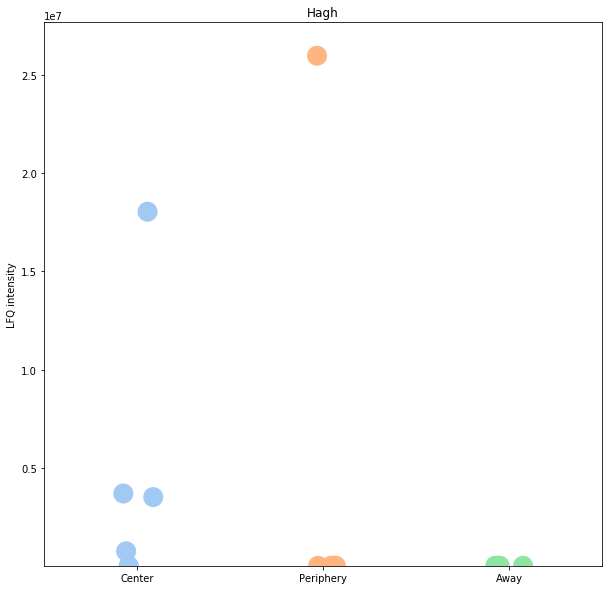

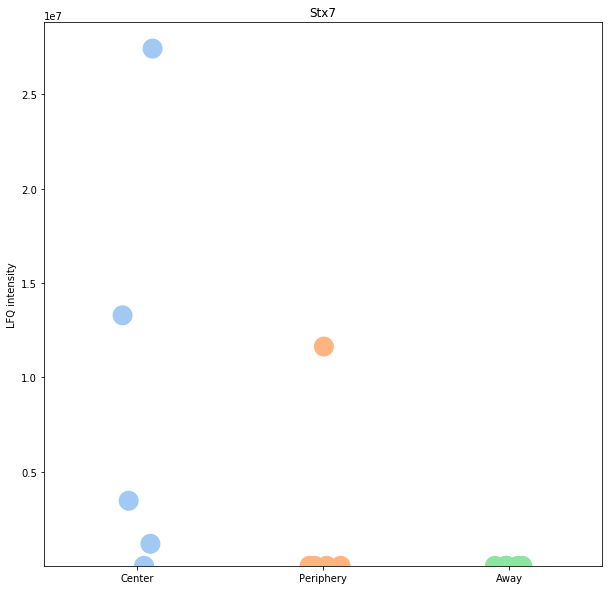

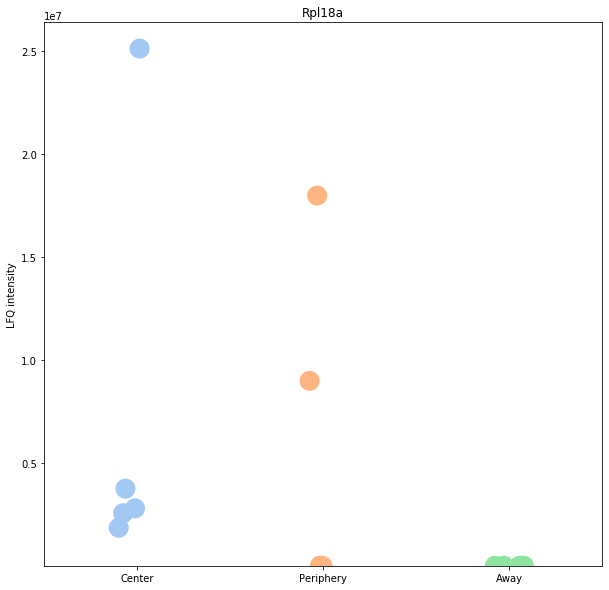

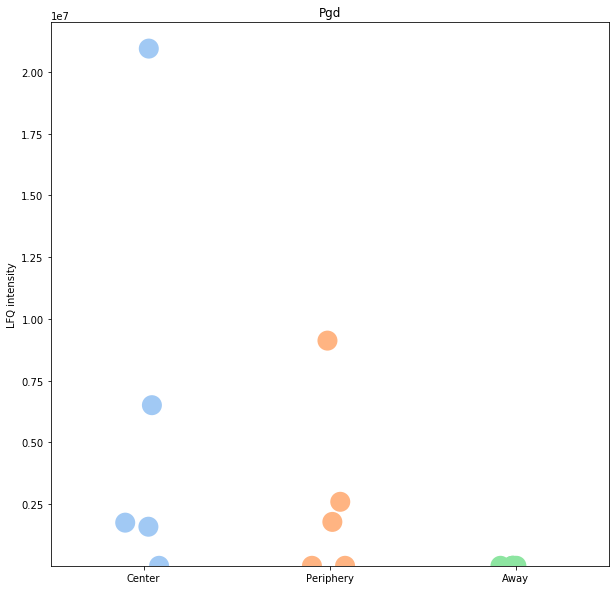

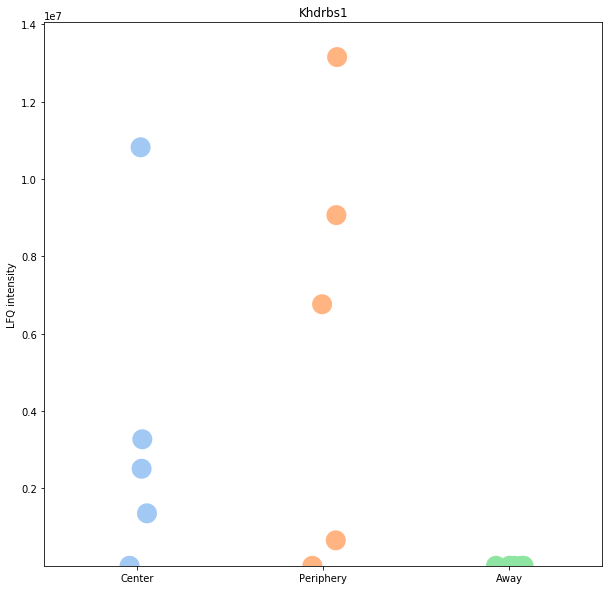

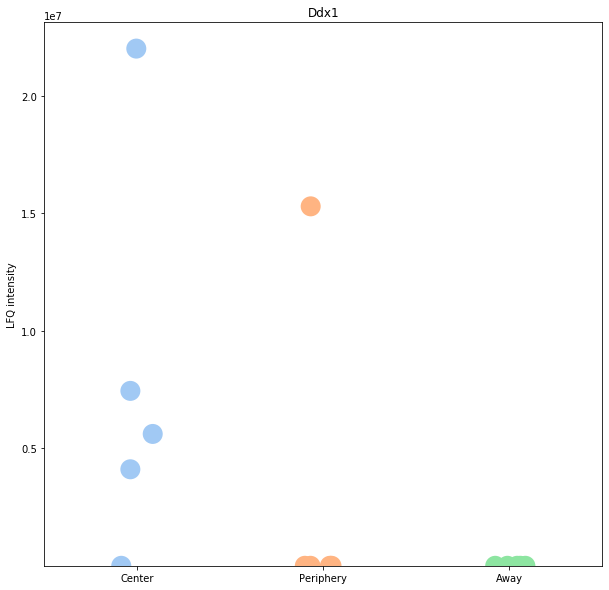

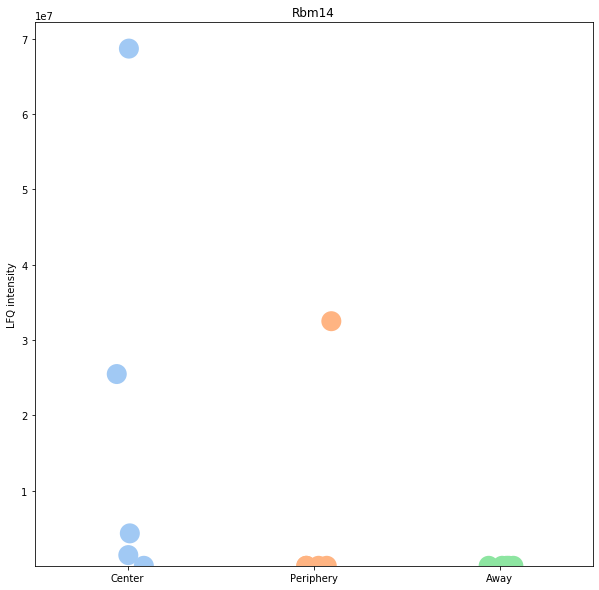

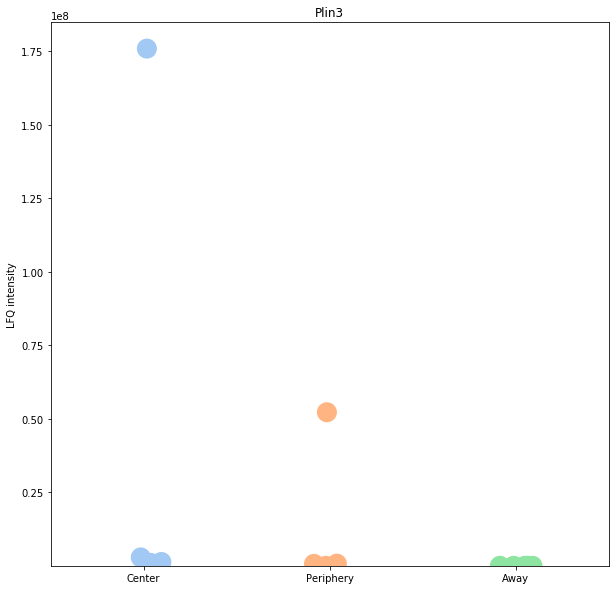

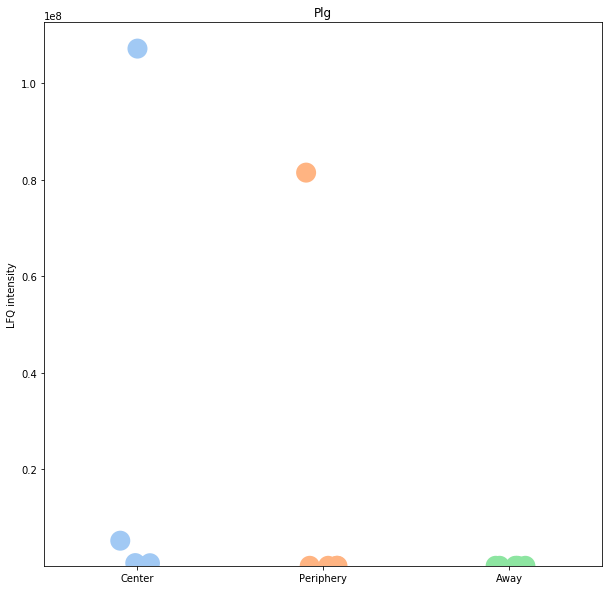

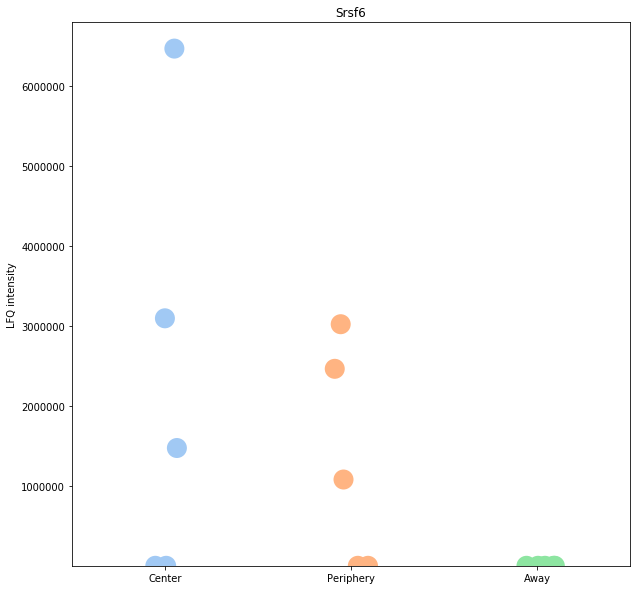

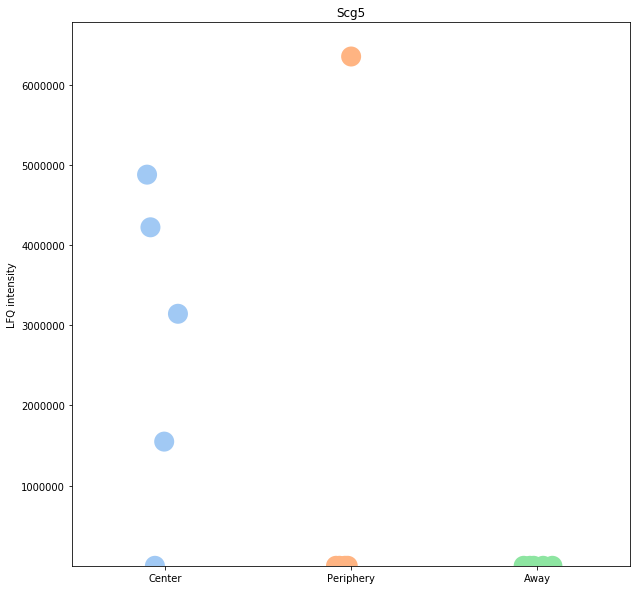

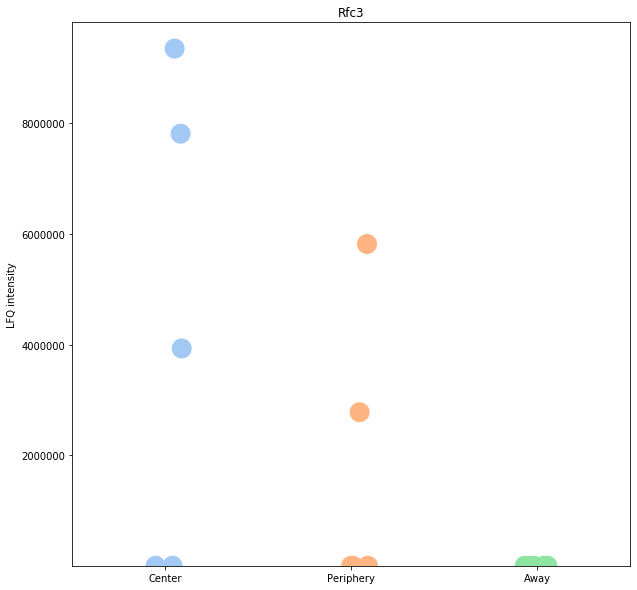

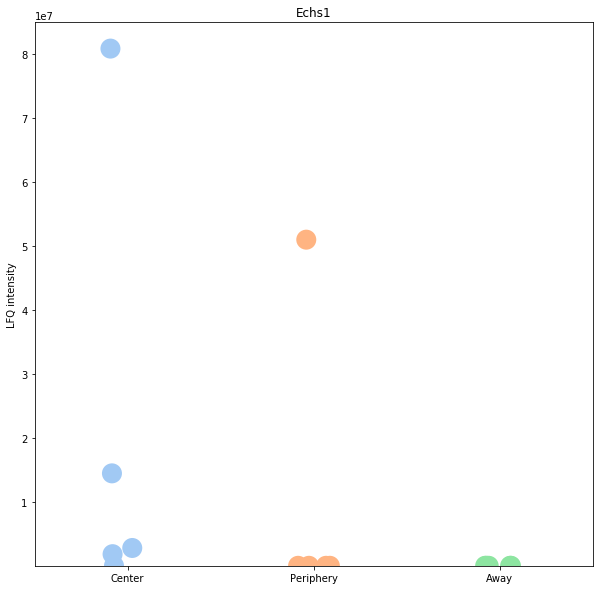

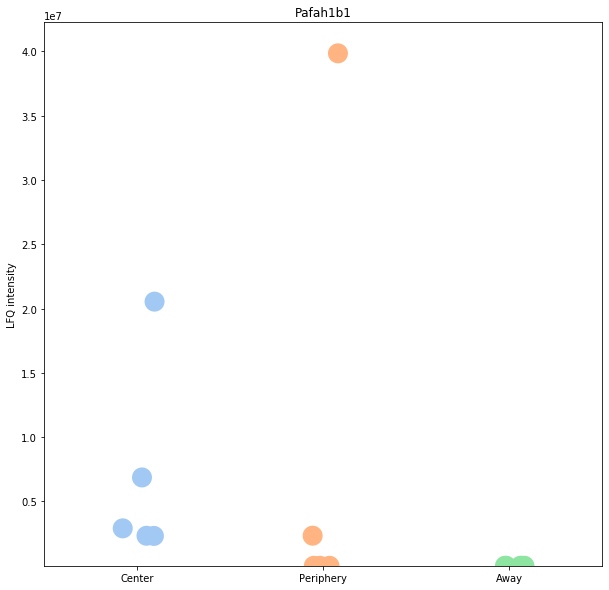

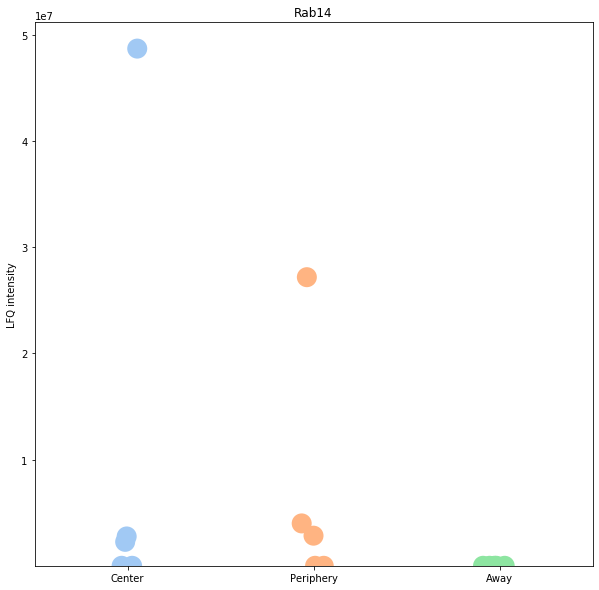

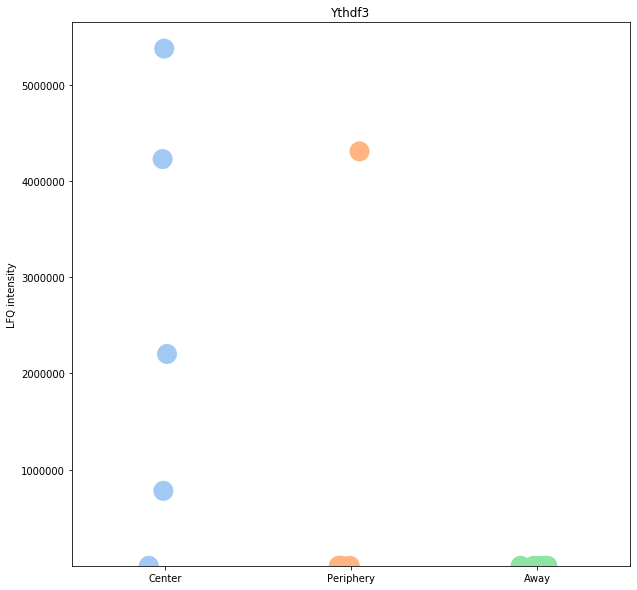

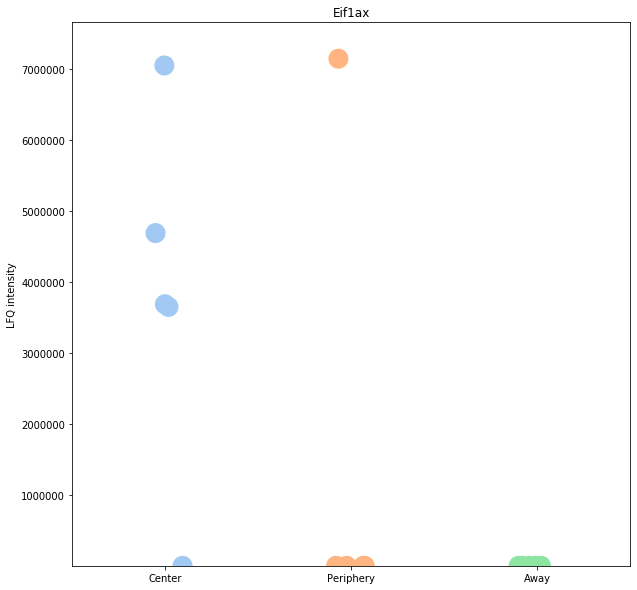

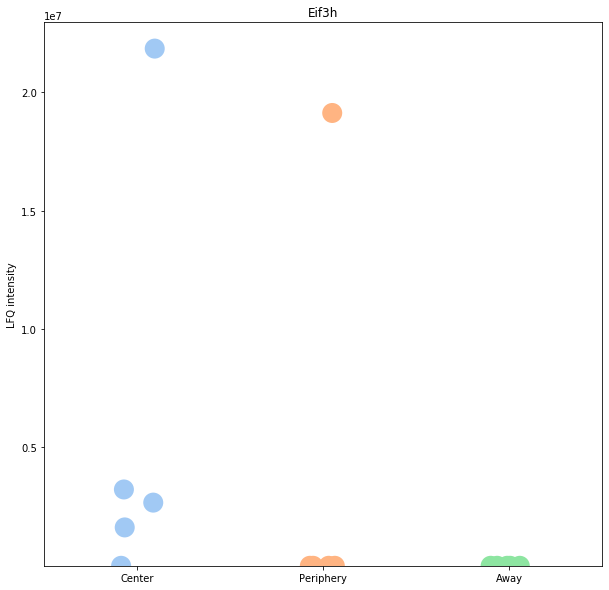

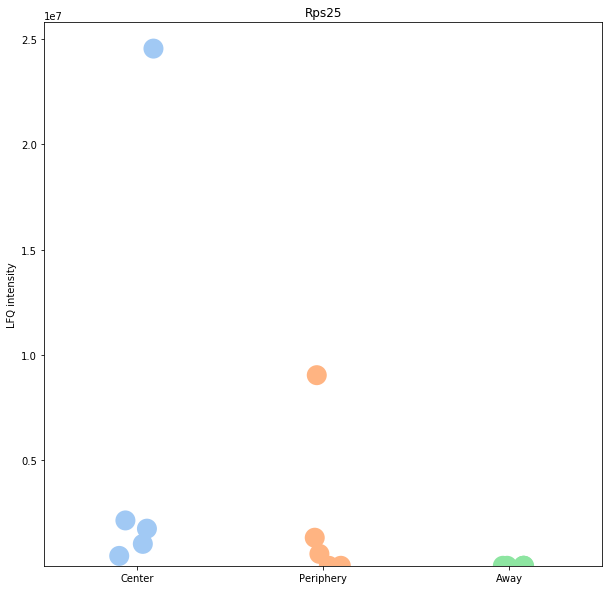

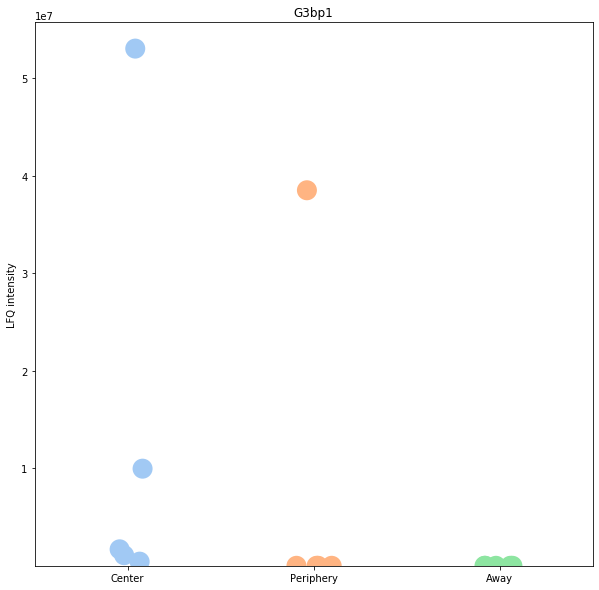

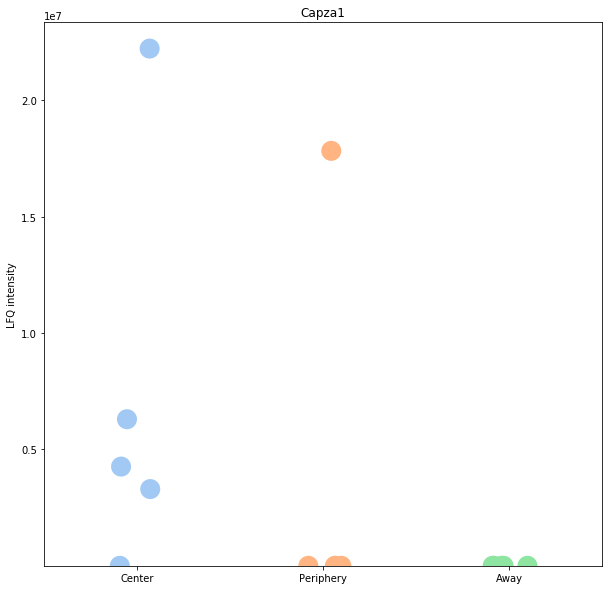

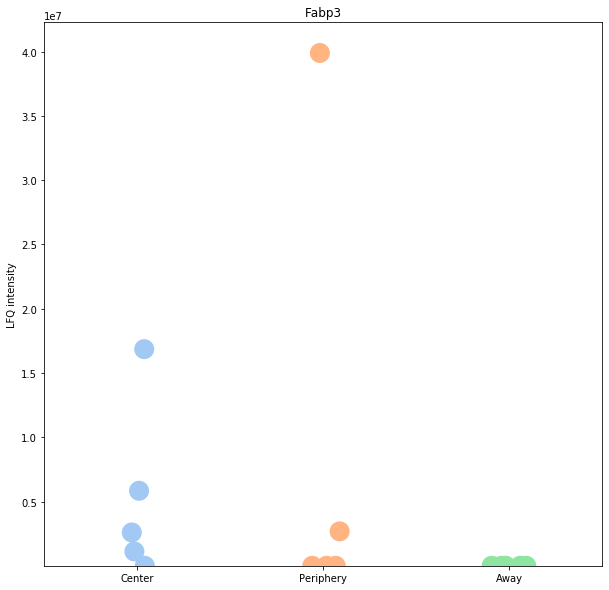

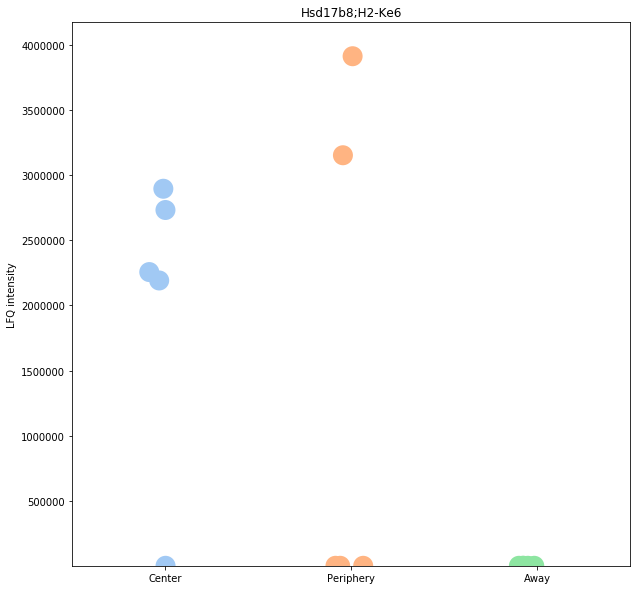

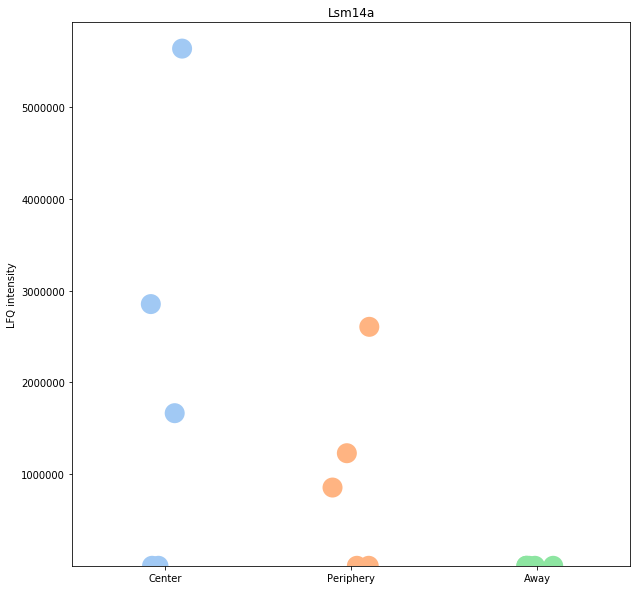

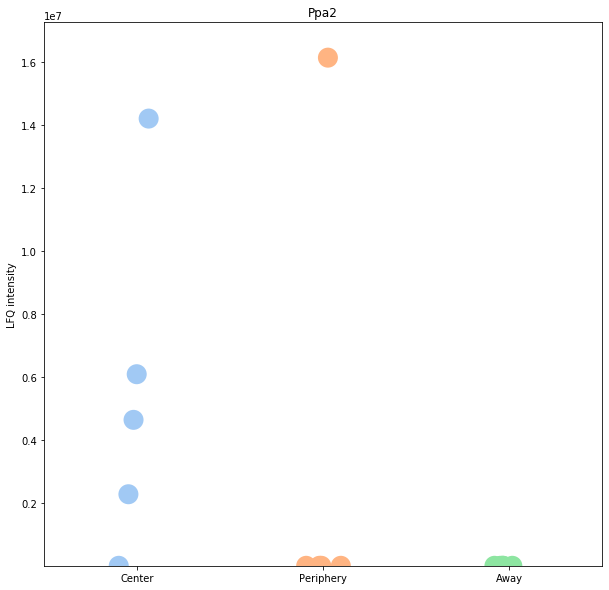

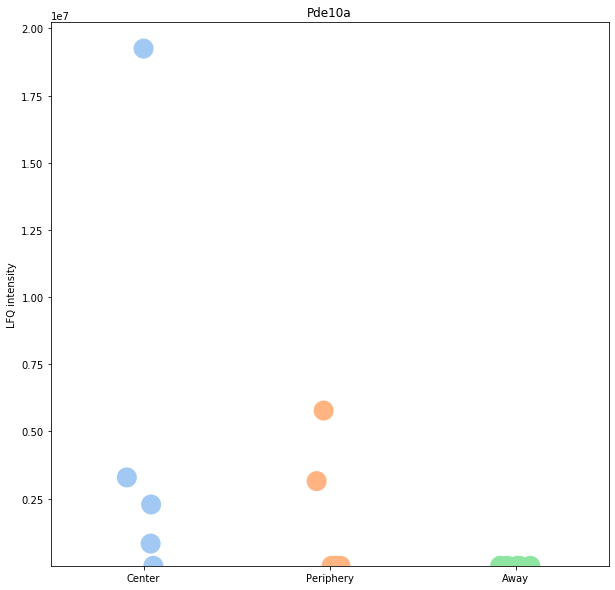

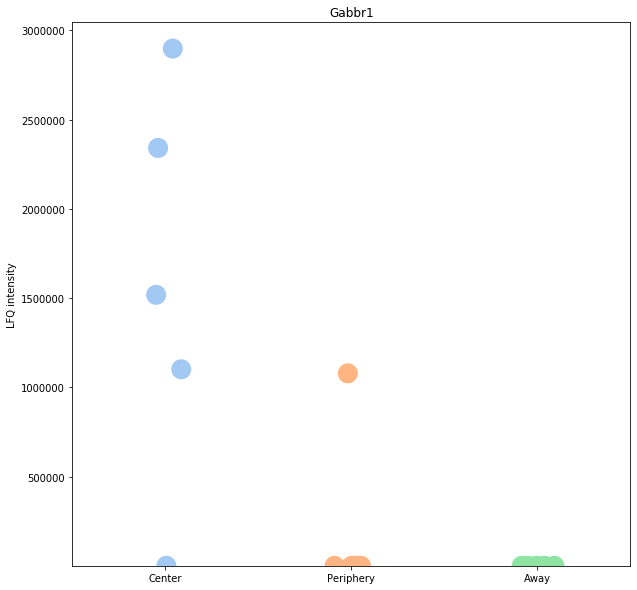

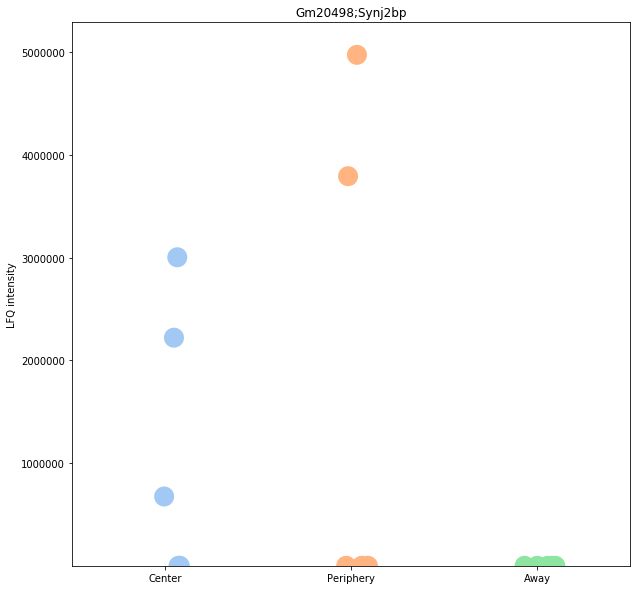

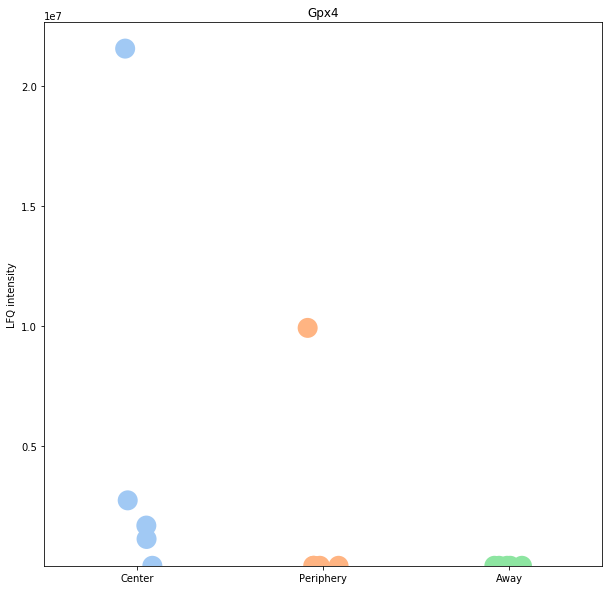

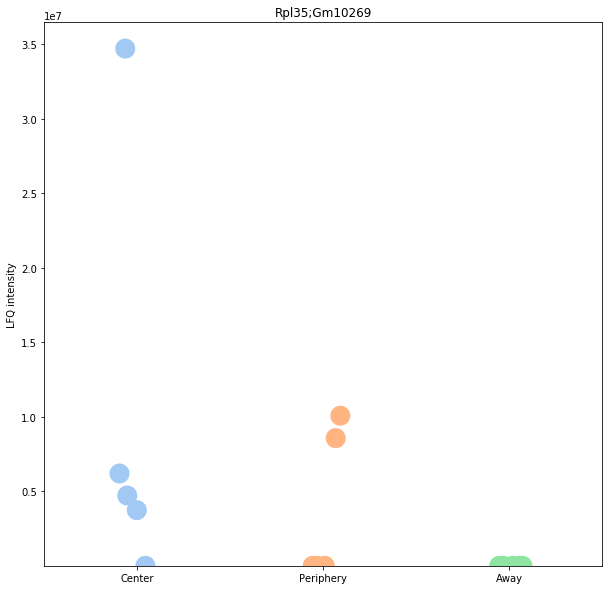

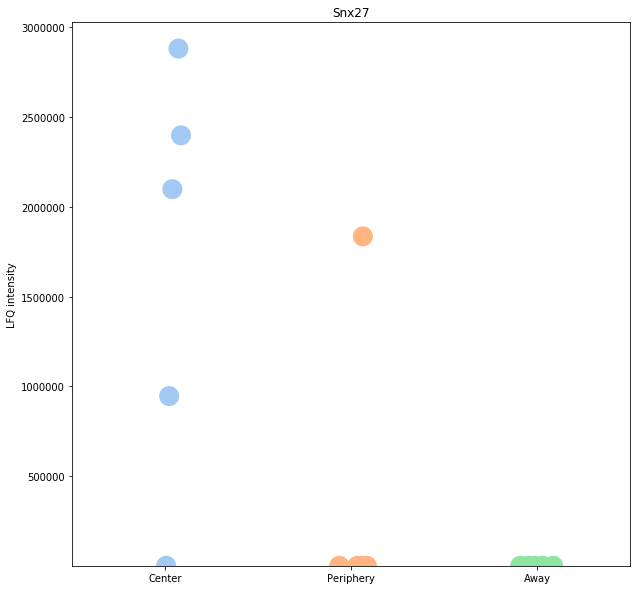

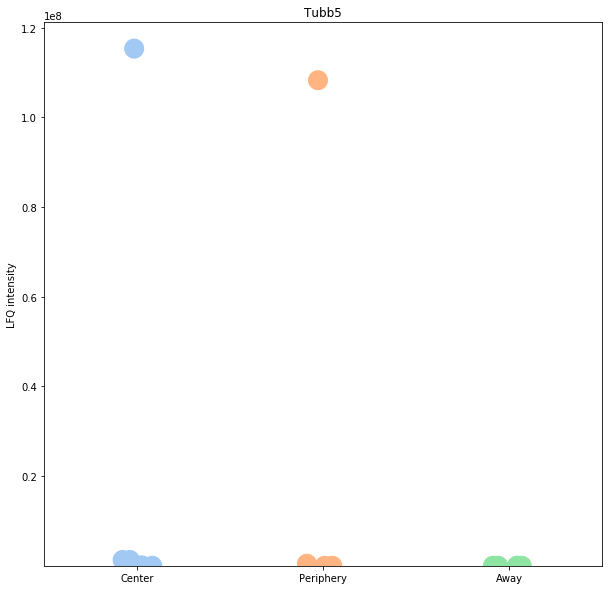

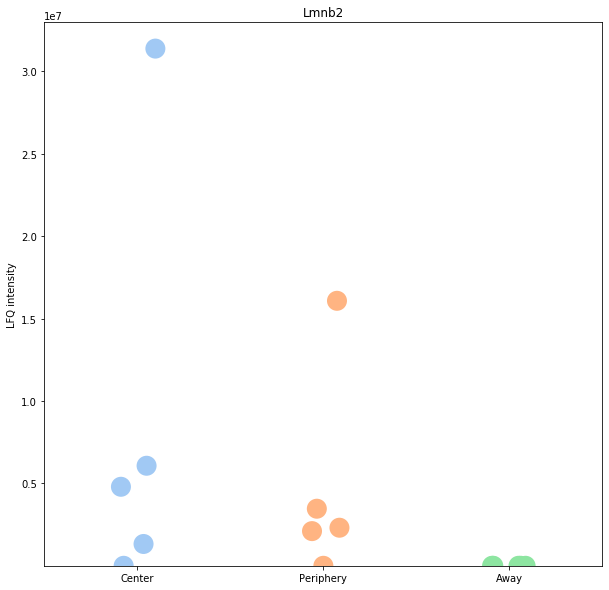

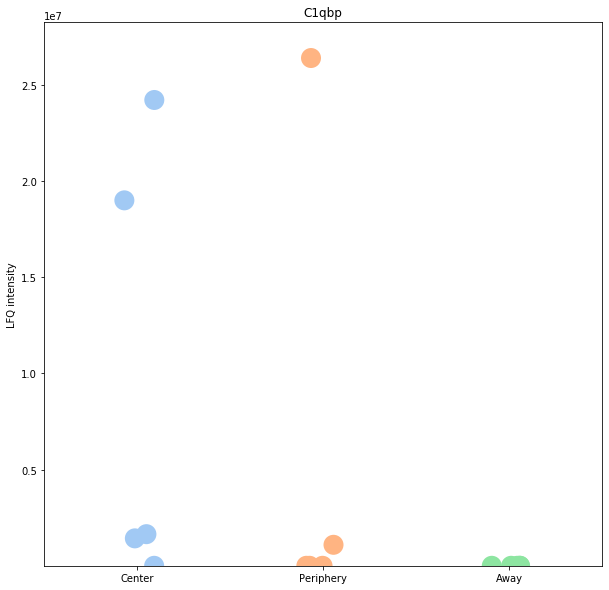

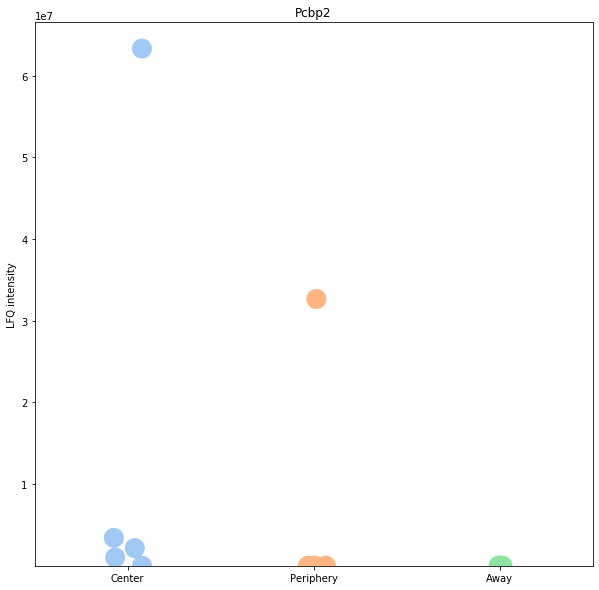

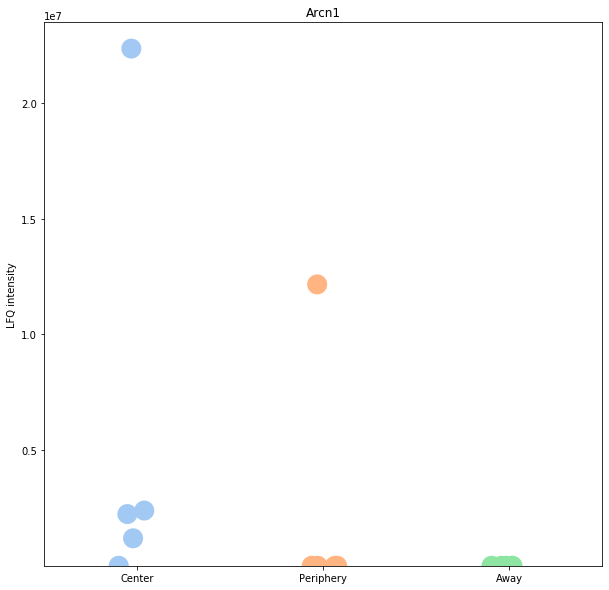

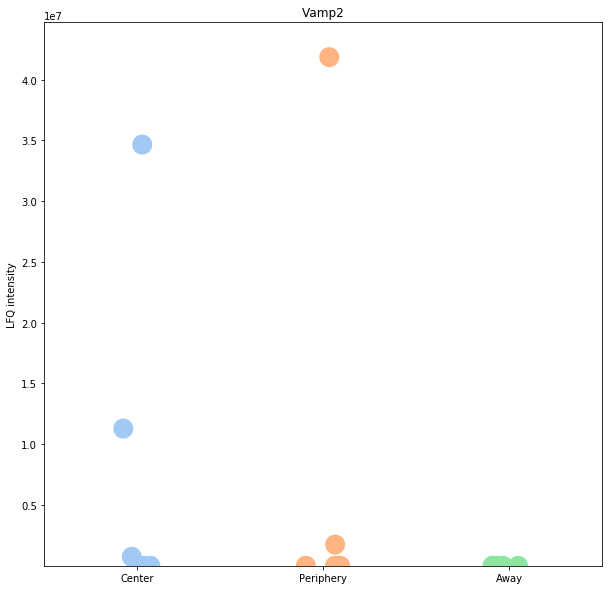

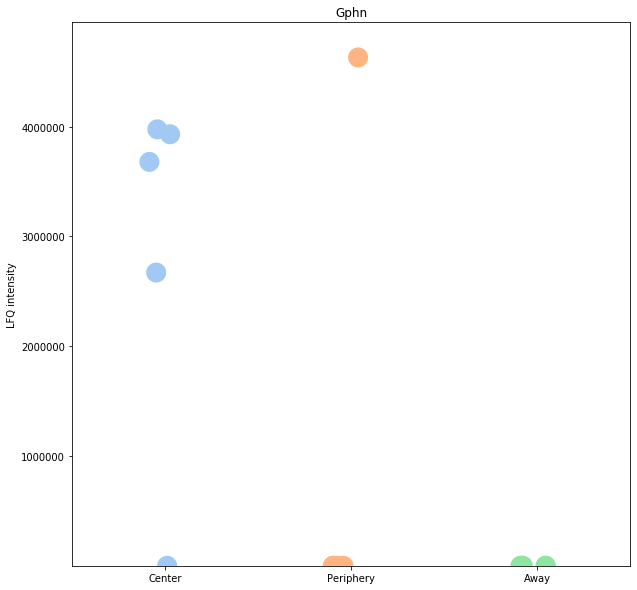

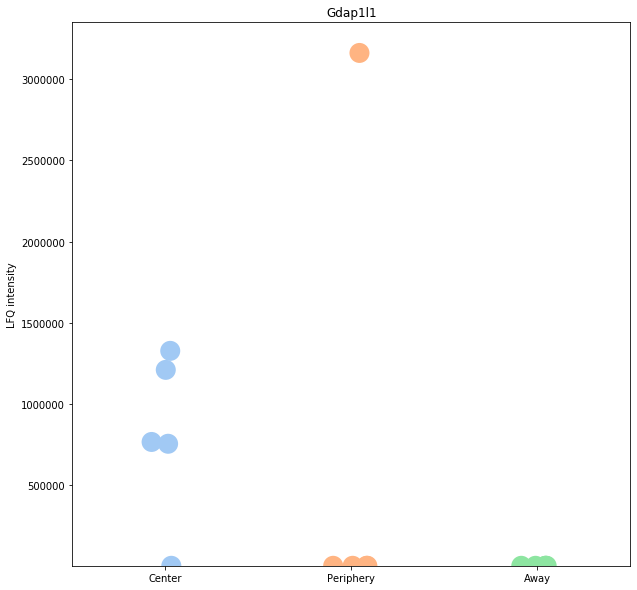

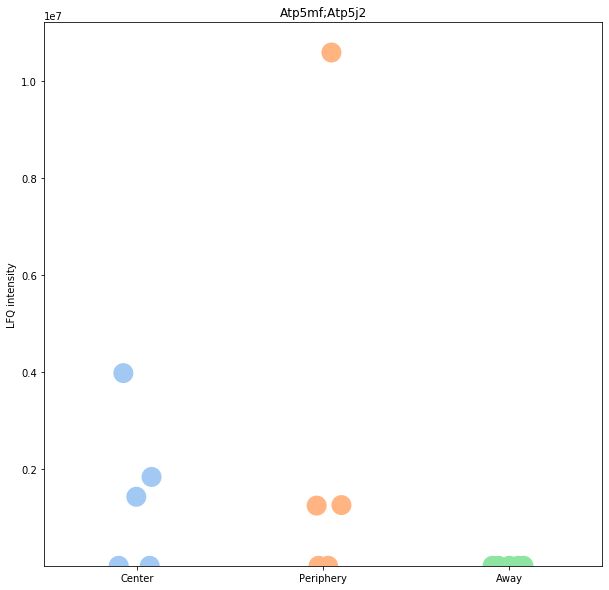

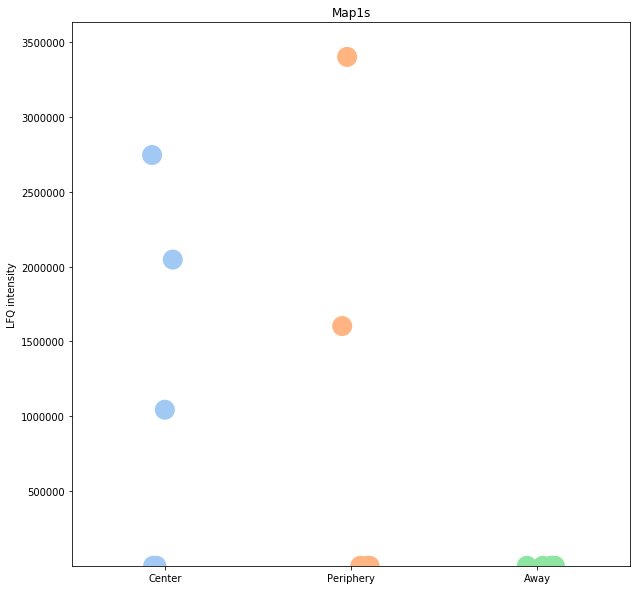

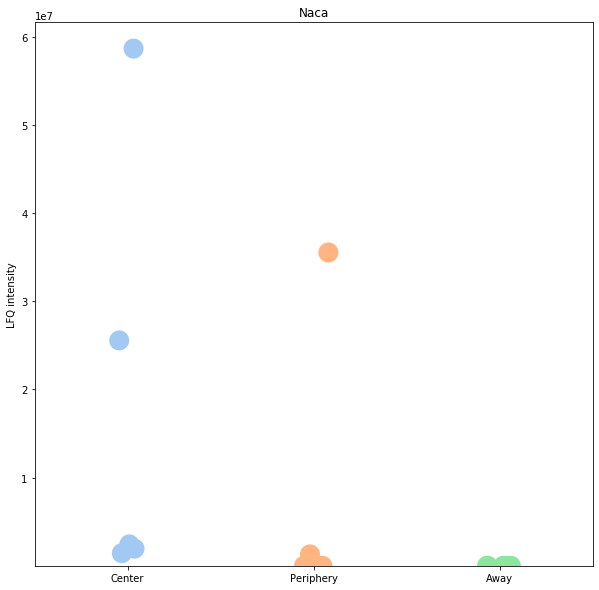

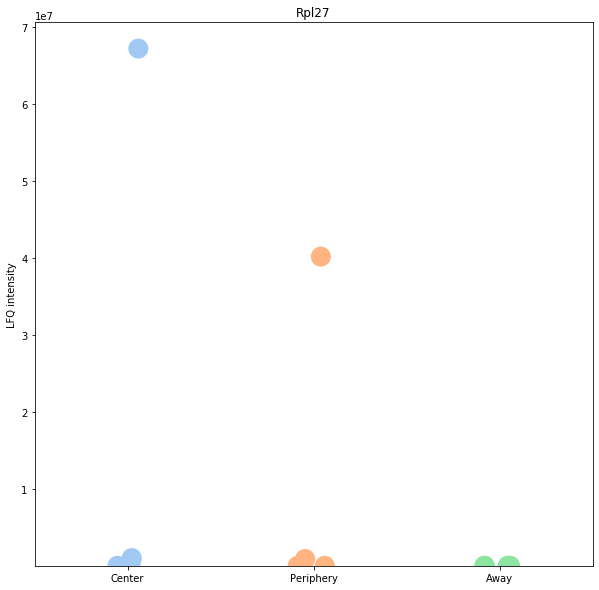

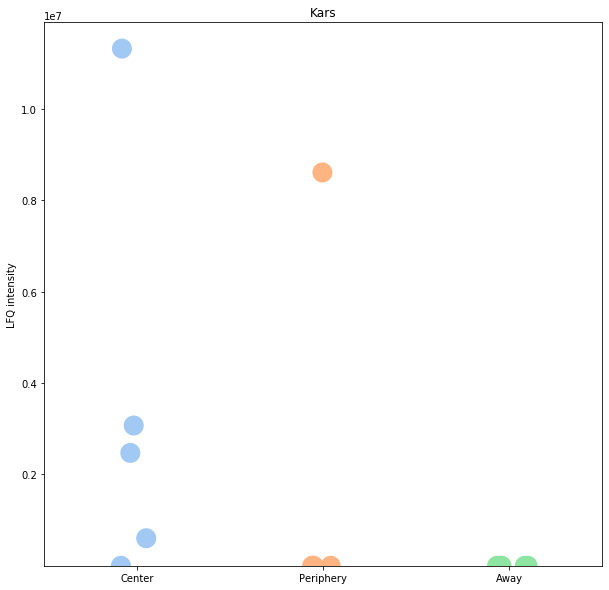

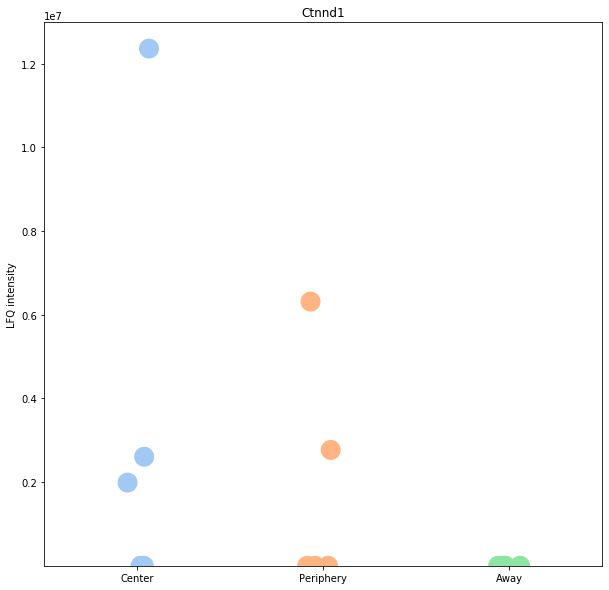

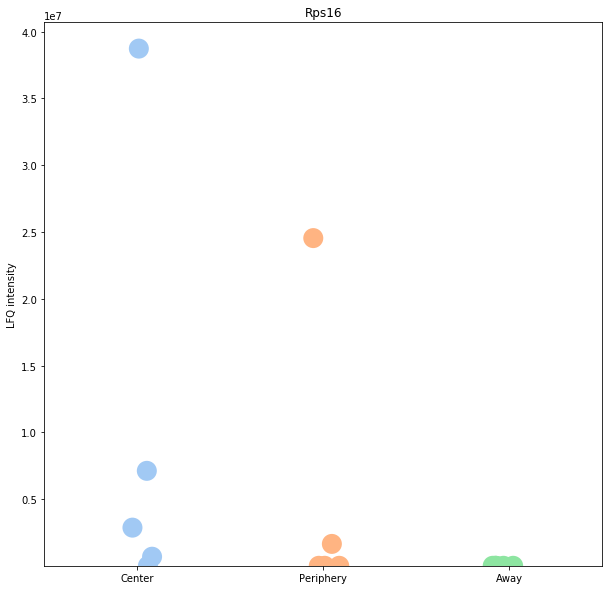

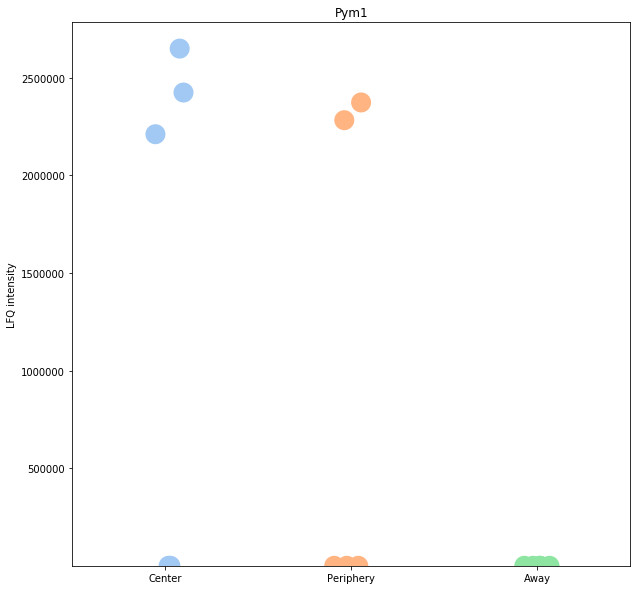

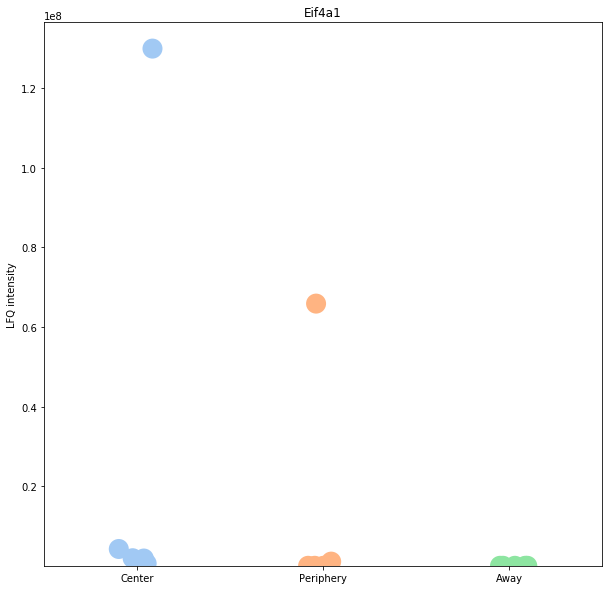

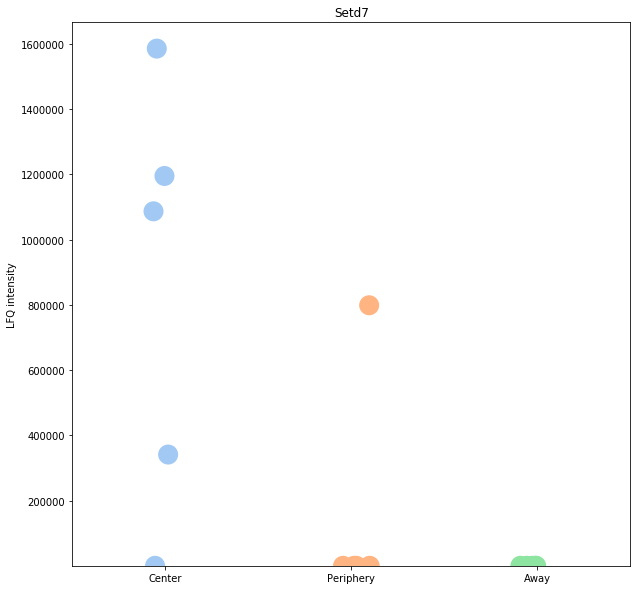

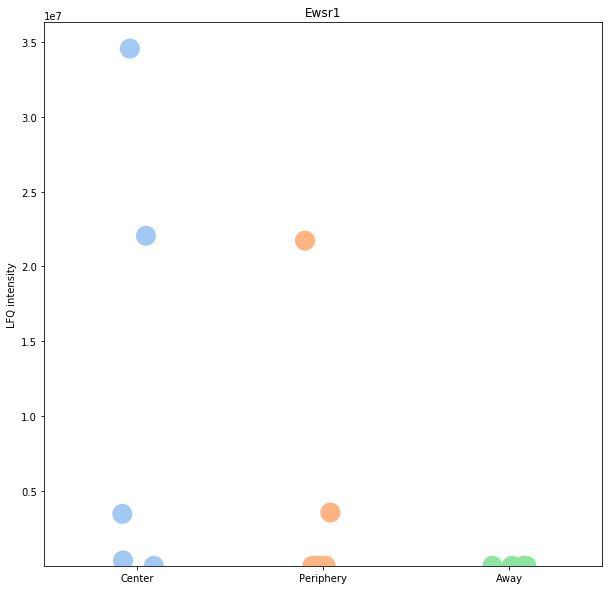

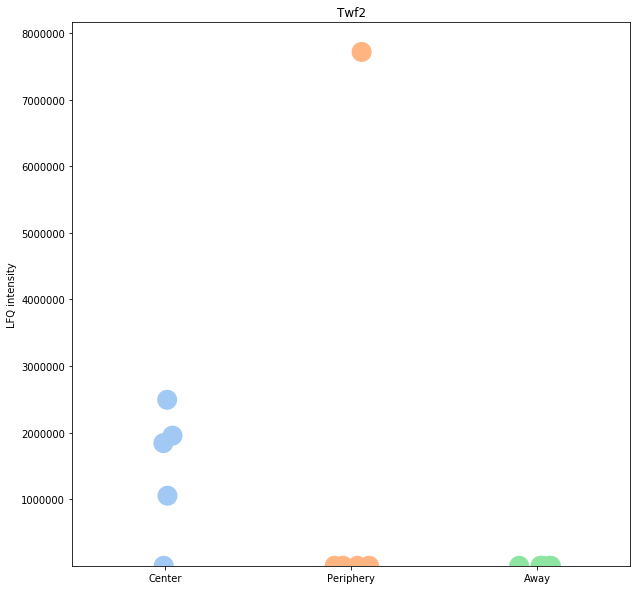

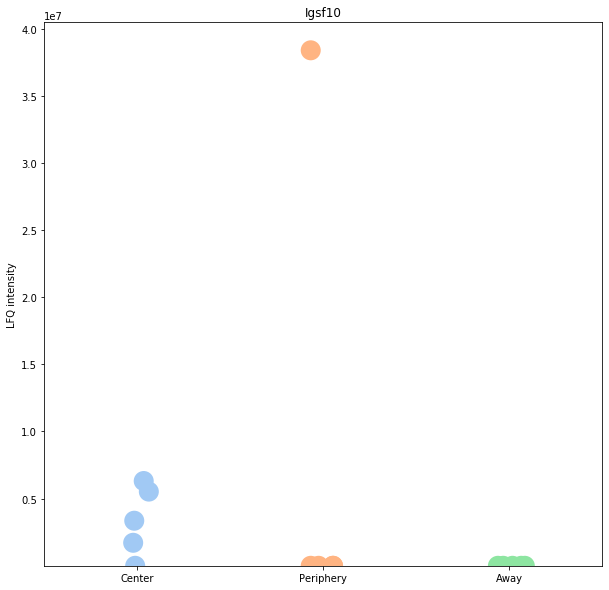

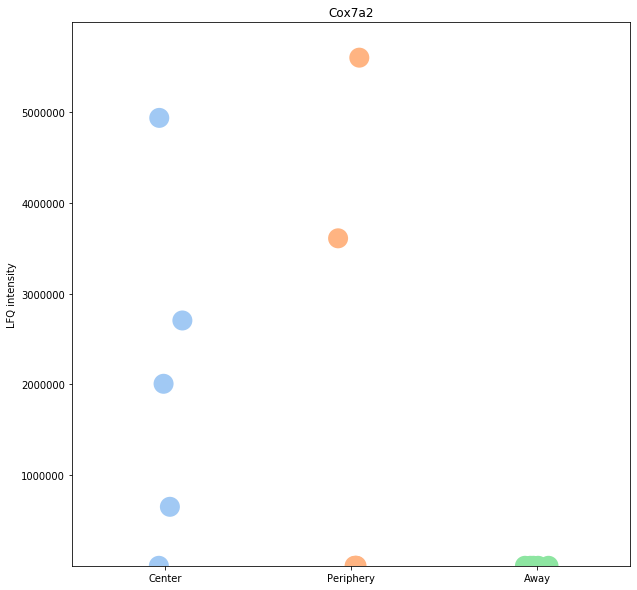

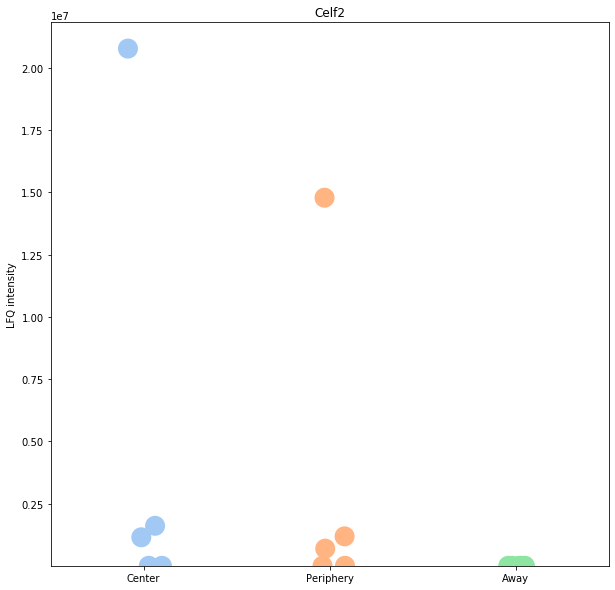

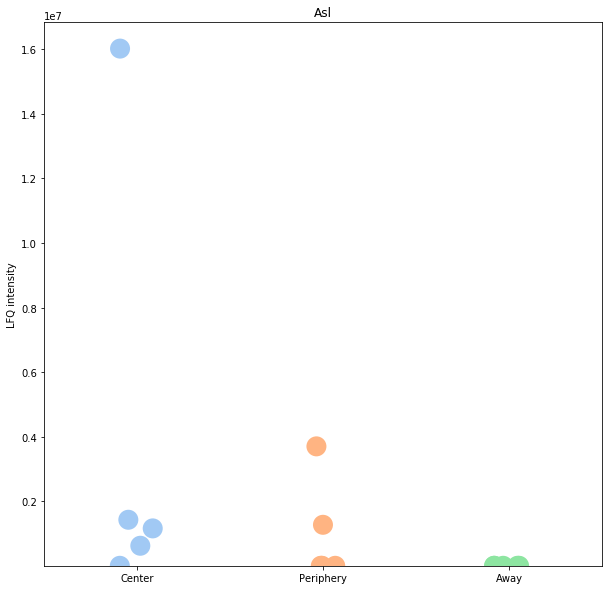

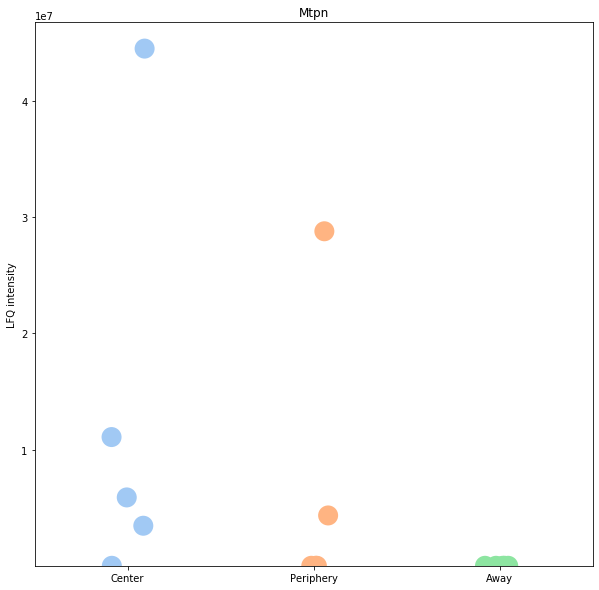

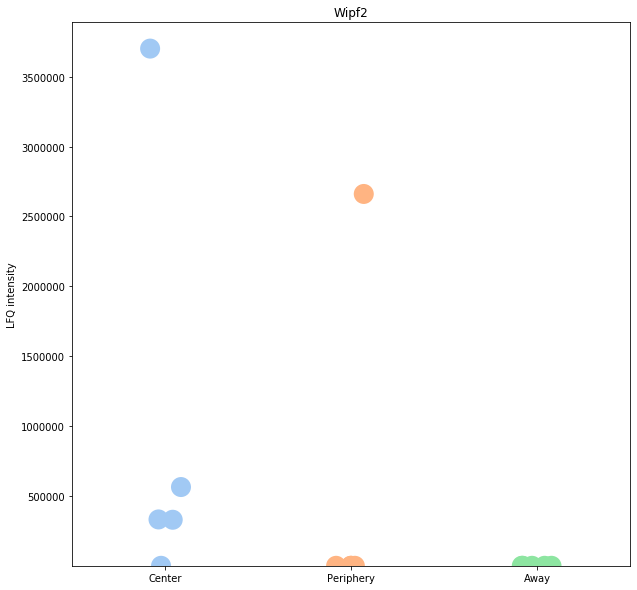

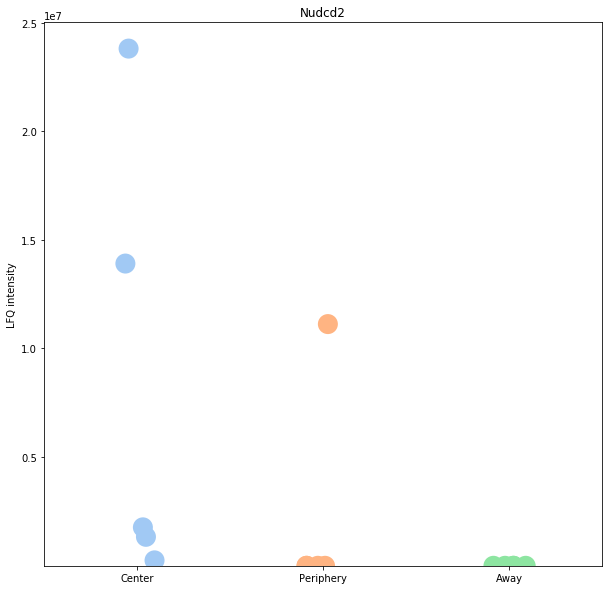

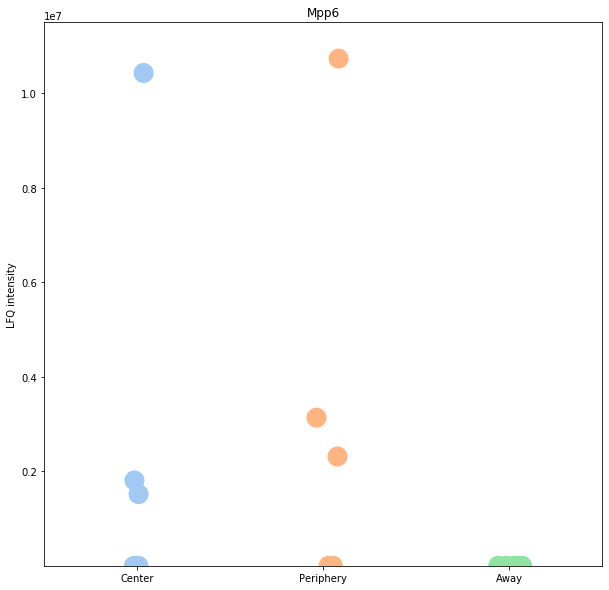

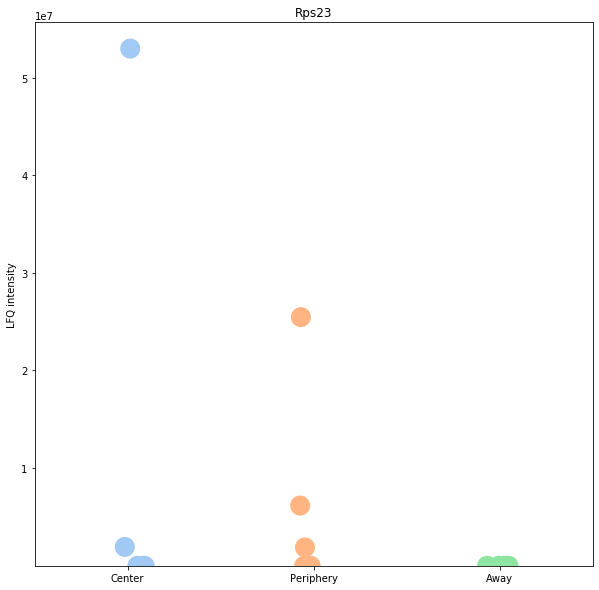

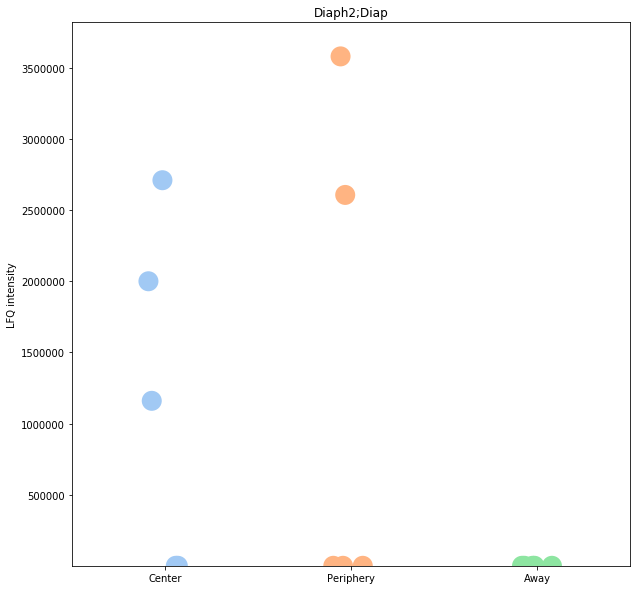

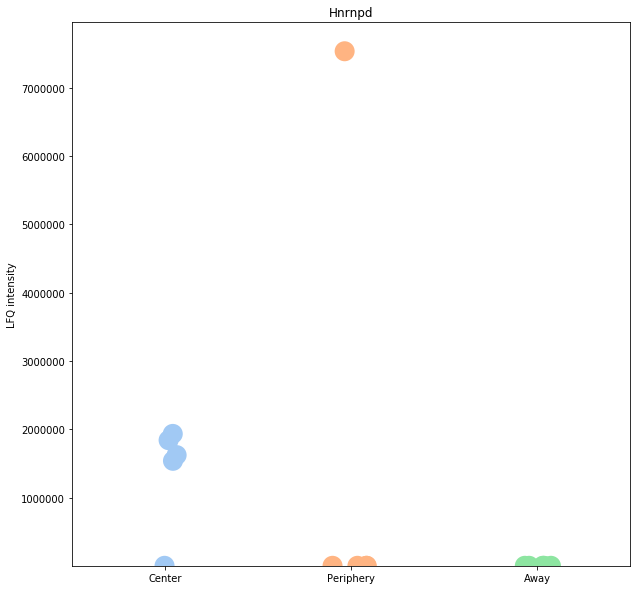

(182, 182)

In [11]:
plot_common_violinplot(positive_pattern_proteins_df[positive_pattern_proteins_df['mice count']>4],
                       positive_pattern_proteins_df[positive_pattern_proteins_df['mice count']>4].index,
                       np.array(positive_pattern_proteins_df[positive_pattern_proteins_df['mice count']>4].loc[:,'Gene names']))

In [12]:
np.array(positive_pattern_proteins_df[positive_pattern_proteins_df['mice count']>3].loc[:,'Gene names'])


array(['Map1b', 'Cldn11', 'Mobp', 'Map4', 'Dnm1', 'Npm1', 'Tubb3', 'Nefh',
       'Pdia3', 'Gpi', 'Mdh1', 'Ncl', 'Crmp1', 'Eif4b', 'Hmgn1', 'Bcas1',
       'Rpl19', 'Uba1', 'Pcsk1n', 'Rpl6', 'Cdv3', 'Hmga1', 'Hsp90aa1',
       'Reps1', 'Tubb4a', 'Ddx3x;D1Pas1', 'Atp6v1a', 'Fscn1', 'Ywhaq',
       'Hsp90b1', 'Rpl13', 'Ca2;Car2', 'Arpp21', 'Rps19', 'Ezr', 'Rps3a',
       'Ank2', 'Jpt1', 'Khsrp', 'Gnai2', 'Tnr', 'Cnbp', 'Thy1', 'Pdha1',
       'Cryab', 'Ranbp1', 'Camk2b', 'Ntm', 'Uqcrc1', 'Rtn1', 'Rpl8',
       'Psip1', 'Pura', 'Cs', 'Slc3a2', 'Ptprz1', 'Tagln3', 'Hspa12a',
       'Gnb2', 'Syn2', 'Pfkp', 'Ybx1', 'Hint1', 'Bin1', 'Add1', 'Ctsz',
       'Ogdh', 'Hnrnpd', 'Ttr', 'Rps6', 'Gda', 'Ppp1r1b', 'Eef1b;Eef1b2',
       'Rpl23a', 'Vdac2', 'Usp5', 'Sept5', 'Calu', 'Hsph1', 'Gpm6a',
       'Ap2b1', 'Atp1b2', 'Pcbp1', 'Rtn4', 'Epb41l2', 'Rab3a', 'Rpl28',
       'Coro1c', 'Gyg1;Gyg', 'Sucla2', 'Prkcsh', 'Hk1', 'Cct5', 'Acot7',
       'Gstp1', 'Chgb', 'Atp2b2', 'Sept11', 'Oxct1', 'Cplx2', 

# ORDER (BY ORIGINAL DATA ORDER) AND SAVE POSITIVE PATTERN TABLE

In [14]:
a = pd.concat([positive_pattern_proteins_df, rest_df])
a = a.set_index('Protein IDs')
a = a.reindex(index=raw_data['Protein IDs'])
a = a.reset_index()
a

# for i, j in zip(a.index, raw_data.index):
#     print(i,j)
#     if a.loc[i,'Gene names'] != raw_data.loc[j,'Gene names']:
#         print(a.loc[i,'Protein IDs'], raw_data.loc[j,'Protein IDs'])

# a.to_excel('epulse-10-pattern.xlsx') #save possitive pattern table.

/Users/ilaigenishmac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


# Following code is not needed!!!!!!!!!!

# Finding negative pattern proteins

In [20]:
negative_pattern_proteins_df = pd.DataFrame()

for protein in filtered_df.index:
    count = 0
    for mice in ['1\.', '2\.', '3\.','4\.', '5\.']:
        mouse_df = filtered_df.filter(regex=mice).loc[protein,:]
#         display(all(mouse_df.filter(regex= mice + '1')),all(mouse_df.filter(regex= mice + '2')))
#         display('aa', (mouse_df.filter(regex= mice + '1').iloc[0] + mouse_df.filter(regex= mice + '2').iloc[0]) / 2)
        
        if (mouse_df.filter(regex= mice + '1').iloc[0] + mouse_df.filter(regex= mice + '2').iloc[0]) / 2 == 0  and mouse_df.filter(regex= mice + '3').iloc[0] > 0: 
            
            count += 1
                
    if count > 0:
        protein_data = filtered_df.loc[protein, :]
        protein_data['mice count'] = count
        negative_pattern_proteins_df = negative_pattern_proteins_df.append(protein_data)
        

/Users/ilaigenishmac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [21]:
negative_pattern_proteins_df

,Fasta headers,Gene names,LFQ intensity 1.1_center,LFQ intensity 1.2_periphery,LFQ intensity 1.3_away from periphery,LFQ intensity 2.1_center,LFQ intensity 2.2_periphery,LFQ intensity 2.3_away from periphery,LFQ intensity 3.1_center,LFQ intensity 3.2_periphery,...,LFQ intensity 4.2_periphery,LFQ intensity 4.3_away from periphery,LFQ intensity 5.1_center,LFQ intensity 5.2_periphery,LFQ intensity 5.3_away from periphery,Majority protein IDs,Number of proteins,Protein IDs,Protein names,mice count
71,>sp|Q8R480|NUP85_MOUSE Nuclear pore complex pr...,Nup85,106670000.0,0.0,0.0,0.0,181970000.0,0.0,54954000.0,43142000.0,...,0.0,24991000.0,197520000.0,0.0,965090.0,Q8R480,3.0,Q8R480;Z4YLV0;Z4YM95,Nuclear pore complex protein Nup85,1.0
177,>tr|B1AWN6|B1AWN6_MOUSE Sodium channel protein...,Scn2a,13223000.0,194020000.0,13091000.0,0.0,0.0,18391000.0,0.0,0.0,...,0.0,0.0,1026200.0,9263900.0,0.0,B1AWN6;A0A0J9YTW6,10.0,B1AWN6;A0A0J9YTW6;A2ASI5;F7AMU5;G3X8T7;E9PW82;...,Sodium channel protein,1.0
307,>tr|A0A3B2W864|A0A3B2W864_MOUSE RPS10-NUDT3 re...,Rps10,12237000.0,3814700.0,0.0,1476800.0,118390000.0,0.0,0.0,0.0,...,0.0,0.0,82373000.0,0.0,5315200.0,A0A3B2W864;A0A338P7K4;Q3UW83;A0A338P731,8.0,A0A3B2W864;A0A338P7K4;Q3UW83;A0A338P731;B2KF67...,RPS10-NUDT3 readthrough; 40S ribosomal protei...,1.0
390,>sp|P28663|SNAB_MOUSE Beta-soluble NSF attachm...,Napb,7000000.0,0.0,0.0,0.0,90073000.0,0.0,0.0,0.0,...,0.0,1397300.0,35191000.0,0.0,0.0,P28663,2.0,P28663;D6RHL2,Beta-soluble NSF attachment protein,1.0
400,>tr|Q5SWN2|Q5SWN2_MOUSE Replication protein A ...,Rpa1,13495000.0,0.0,0.0,0.0,1071900.0,0.0,0.0,0.0,...,0.0,0.0,1262700.0,0.0,0.0,Q5SWN2;Q8VEE4,2.0,Q5SWN2;Q8VEE4,Replication protein A subunit; Replication pr...,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4729,>P07477 SWISS-PROT:P07477 Tax_Id=9606 Gene_Sym...,NaN,0.0,2910600.0,0.0,0.0,8690900.0,10257000.0,0.0,0.0,...,0.0,0.0,10106000.0,0.0,0.0,CON__P07477;E9QPR6;Q5U405,3.0,CON__P07477;E9QPR6;Q5U405,NaN,1.0
4733,>Q61782 TREMBL:Q61782 Tax_Id=10090 Gene_Symbol...,NaN,6542900.0,133870000.0,0.0,29079000.0,10778000.0,0.0,0.0,0.0,...,0.0,0.0,5604800.0,0.0,0.0,CON__Q61782,1.0,CON__Q61782,NaN,1.0
4738,>Q9BYR9 SWISS-PROT:Q9BYR9 Tax_Id=9606 Gene_Sym...,NaN,0.0,0.0,0.0,0.0,0.0,46218000.0,0.0,0.0,...,723210.0,0.0,0.0,0.0,0.0,CON__Q9BYR9,1.0,CON__Q9BYR9,NaN,2.0
4843,>sp|O70456|1433S_MOUSE 14-3-3 protein sigma OS...,Sfn,0.0,0.0,0.0,0.0,68851000.0,0.0,0.0,0.0,...,0.0,2230000.0,72765000.0,0.0,0.0,O70456,1.0,O70456,14-3-3 protein sigma,1.0


In [22]:
negative_pattern_proteins_df[negative_pattern_proteins_df['mice count'] > 1]#.iloc[:,:-5]

,Fasta headers,Gene names,LFQ intensity 1.1_center,LFQ intensity 1.2_periphery,LFQ intensity 1.3_away from periphery,LFQ intensity 2.1_center,LFQ intensity 2.2_periphery,LFQ intensity 2.3_away from periphery,LFQ intensity 3.1_center,LFQ intensity 3.2_periphery,...,LFQ intensity 4.2_periphery,LFQ intensity 4.3_away from periphery,LFQ intensity 5.1_center,LFQ intensity 5.2_periphery,LFQ intensity 5.3_away from periphery,Majority protein IDs,Number of proteins,Protein IDs,Protein names,mice count
1879,>sp|Q9R1P0|PSA4_MOUSE Proteasome subunit alpha...,Psma4,0.0,0.0,9446000.0,1856200.0,11122000.0,18031000.0,0.0,0.0,...,8640200.0,0.0,17070000.0,1964200.0,7164600.0,Q9R1P0;E9PW69,3.0,Q9R1P0;E9PW69;E9Q0X0,Proteasome subunit alpha type-4; Proteasome s...,2.0
2731,>sp|P32848|PRVA_MOUSE Parvalbumin alpha OS=Mus...,Pvalb,0.0,0.0,2333900.0,0.0,1949600.0,19019000.0,0.0,0.0,...,0.0,2203300.0,781380.0,3534000.0,0.0,P32848,1.0,P32848,Parvalbumin alpha,2.0
2926,>sp|P08030|APT_MOUSE Adenine phosphoribosyltra...,Aprt,0.0,0.0,26965000.0,0.0,5397000.0,0.0,0.0,23606000.0,...,0.0,17987000.0,7327300.0,0.0,0.0,P08030,2.0,P08030;A0A1D5RLR6,Adenine phosphoribosyltransferase,2.0
3058,>sp|Q9D9V3|ECHD1_MOUSE Ethylmalonyl-CoA decarb...,Echdc1,0.0,0.0,0.0,0.0,0.0,4164800.0,0.0,0.0,...,0.0,0.0,956820.0,0.0,0.0,Q9D9V3,2.0,Q9D9V3;E0CXS3,Ethylmalonyl-CoA decarboxylase,2.0
3612,>sp|Q9D0C4|TRM5_MOUSE tRNA (guanine(37)-N1)-me...,Trmt5,0.0,0.0,0.0,0.0,0.0,1159500.0,0.0,0.0,...,0.0,0.0,389000.0,0.0,0.0,Q9D0C4;A0A1Y7VMB1,2.0,Q9D0C4;A0A1Y7VMB1,tRNA (guanine(37)-N1)-methyltransferase; tRNA...,2.0
3756,>tr|D3YWK1|D3YWK1_MOUSE WD repeat domain phosp...,Wipi2,0.0,0.0,5511900.0,0.0,0.0,6926000.0,0.0,6716500.0,...,0.0,0.0,0.0,0.0,0.0,D3YWK1;Q80W47,2.0,D3YWK1;Q80W47,WD repeat domain phosphoinositide-interacting...,2.0
4074,>tr|Q9D6D0|Q9D6D0_MOUSE Solute carrier family ...,Slc25a27,0.0,6806200.0,8092100.0,0.0,2887300.0,0.0,0.0,0.0,...,0.0,28980000.0,0.0,0.0,6836600.0,Q9D6D0,2.0,Q9D6D0;A0A3B2WCR9,"Solute carrier family 25, member 27",2.0
4108,>tr|V9GXA0|V9GXA0_MOUSE Muscular LMNA-interact...,Mlip,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5611200.0,0.0,0.0,5304900.0,V9GXA0;V9GXX2;V9GWW6;V9GX62;B7ZMP8;V9GXP3;Q5FW52,9.0,V9GXA0;V9GXX2;V9GWW6;V9GX62;B7ZMP8;V9GXP3;Q5FW...,Muscular LMNA-interacting protein,2.0
4208,">O43790 SWISS-PROT:O43790 Keratin, type II cut...",NaN,0.0,0.0,0.0,0.0,0.0,1311800.0,0.0,0.0,...,0.0,2085900.0,718830.0,1615100.0,1907500.0,CON__O43790;CON__Q6NT21;CON__P78385;CON__Q14533,4.0,CON__O43790;CON__Q6NT21;CON__P78385;CON__Q14533,NaN,3.0
4738,>Q9BYR9 SWISS-PROT:Q9BYR9 Tax_Id=9606 Gene_Sym...,NaN,0.0,0.0,0.0,0.0,0.0,46218000.0,0.0,0.0,...,723210.0,0.0,0.0,0.0,0.0,CON__Q9BYR9,1.0,CON__Q9BYR9,NaN,2.0


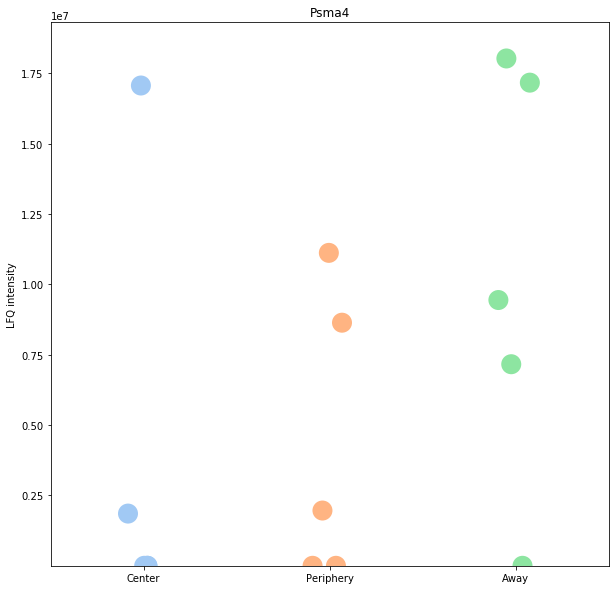

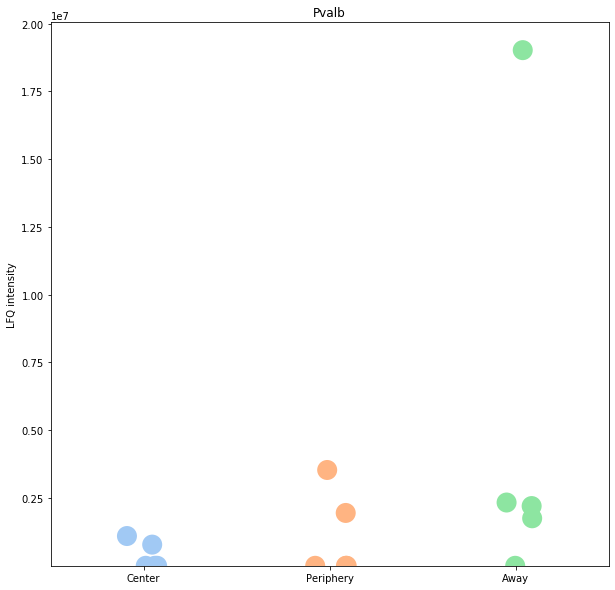

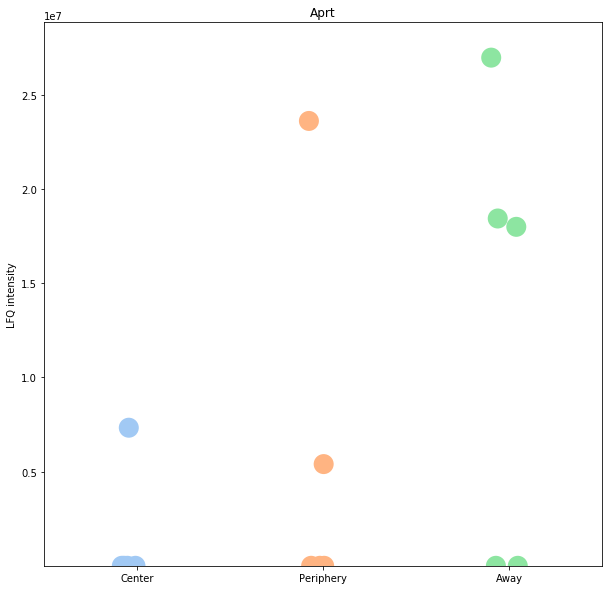

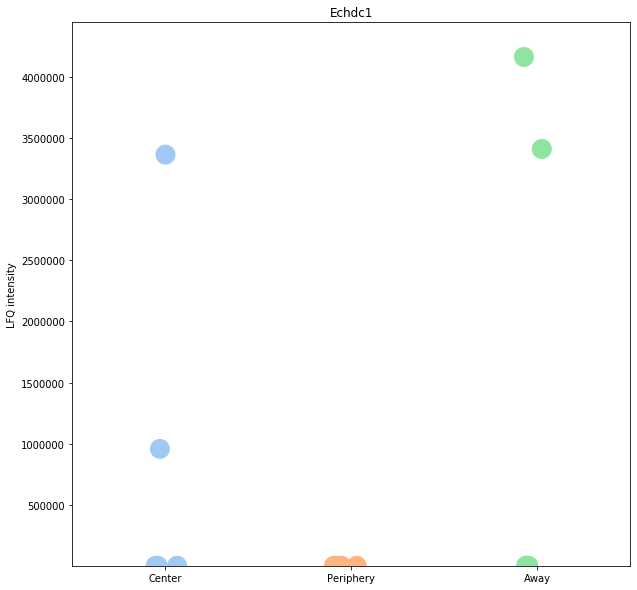

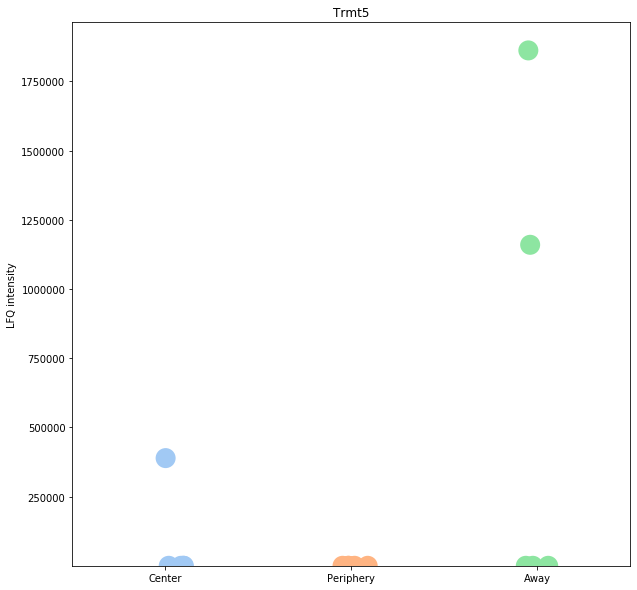

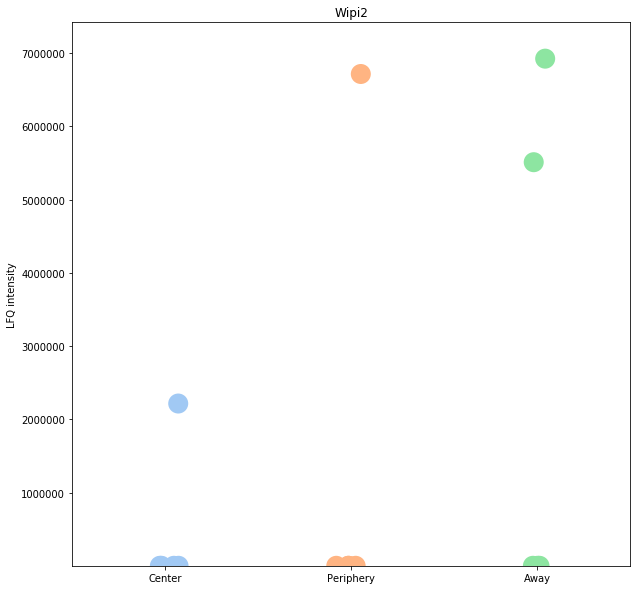

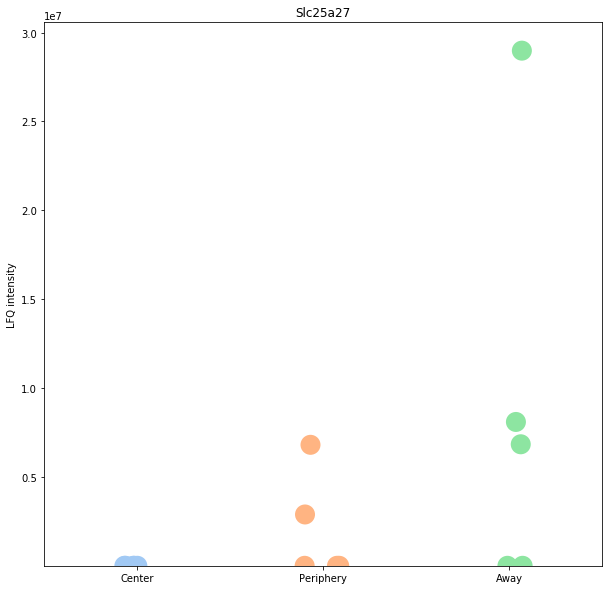

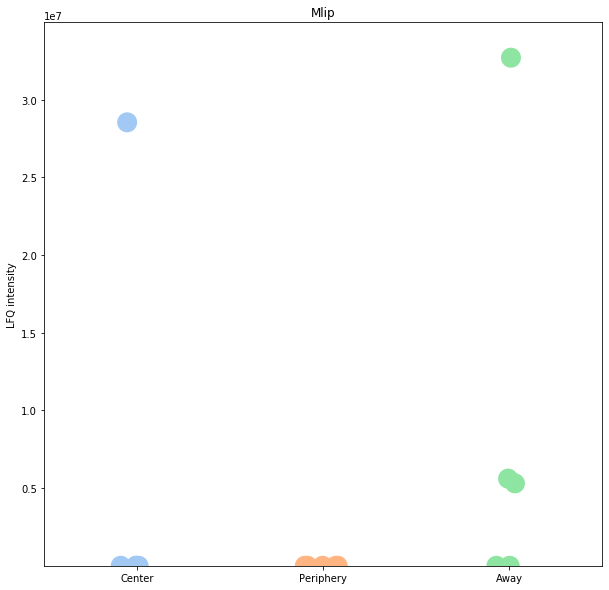

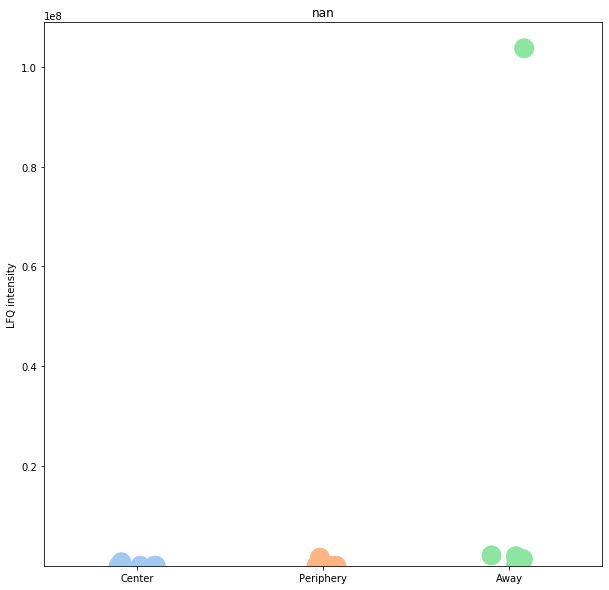

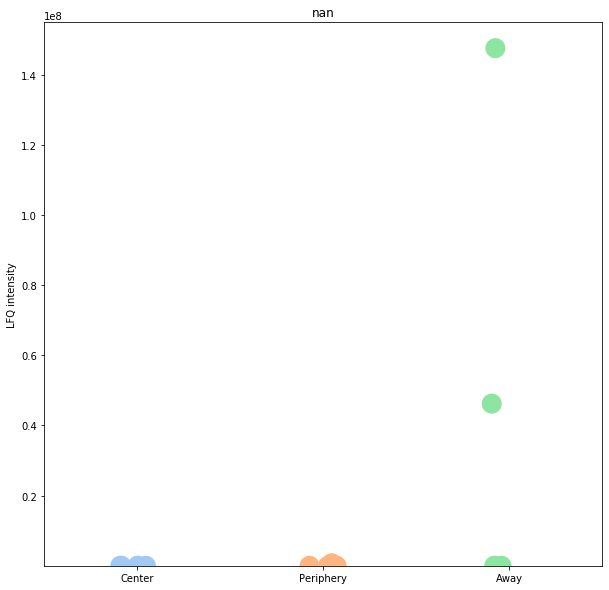

(10, 10)

In [31]:
plot_common_violinplot(negative_pattern_proteins_df[negative_pattern_proteins_df['mice count']>1],
                       negative_pattern_proteins_df[negative_pattern_proteins_df['mice count']>1].index,
                       np.array(negative_pattern_proteins_df[negative_pattern_proteins_df['mice count']>1].loc[:,'Gene names']))


In [24]:
np.array(negative_pattern_proteins_df[negative_pattern_proteins_df['mice count']>1].loc[:,'Gene names'])


array(['Psma4', 'Pvalb', 'Aprt', 'Echdc1', 'Trmt5', 'Wipi2', 'Slc25a27',
       'Mlip', nan, nan], dtype=object)

# ORDER (BY ORIGINAL DATA ORDER) AND SAVE NEGATIVE PATTERN TABLE

In [27]:
a = pd.concat([negative_pattern_proteins_df, rest_df])
a = a.set_index('Protein IDs')
a = a.reindex(index=raw_data['Protein IDs'])
a = a.reset_index()
a

for i, j in zip(a.index, raw_data.index):
    print(i,j)
    if a.loc[i,'Gene names'] != raw_data.loc[j,'Gene names']:
        print(a.loc[i,'Protein IDs'], raw_data.loc[j,'Protein IDs'])

a.to_excel('epulse-01-pattern.xlsx') #save possitive pattern table.

/Users/ilaigenishmac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


0 0
Q91XV3 Q91XV3
1 1
F6RT34;F6VME3 F6RT34;F6VME3
2 2
P07724 P07724
3 3
P06837 P06837
4 4
P63260;G3UZ07;B1ATY1;G3UYG0;E9Q606;F8WGM8;F6WX90;V9GXQ2 P63260;G3UZ07;B1ATY1;G3UYG0;E9Q606;F8WGM8;F6WX90;V9GXQ2
5 5
P20152;A0A0A6YWC8;A2AKJ2;P31001 P20152;A0A0A6YWC8;A2AKJ2;P31001
6 6
P0DP28;P0DP27;P0DP26;Q3UKW2;Q9D6P8;A0A1Y7VK66;G3UX57;P20801 P0DP28;P0DP27;P0DP26;Q3UKW2;Q9D6P8;A0A1Y7VK66;G3UX57;P20801
7 7
P20065 P20065
8 8
P26350;A0A087WP98;A0A087WPN6;A0A087WQN2 P26350;A0A087WP98;A0A087WPN6;A0A087WQN2
9 9
P83741;V9GXP7;F7CC62;F7CZC4;Q80UE6;E9PZ38 P83741;V9GXP7;F7CC62;F7CZC4;Q80UE6;E9PZ38
10 10
Q6P5F7 Q6P5F7
11 11
Q9D0J8 Q9D0J8
12 12
P68372;G3UZR1 P68372;G3UZR1
13 13
P05213;A0A2R8VHF3 P05213;A0A2R8VHF3
14 14
P05064;D3YWI1;D3Z510;A0A0U1RPN8;Q9CPQ9;A6ZI46;A6ZI47;Q91Y97 P05064;D3YWI1;D3Z510;A0A0U1RPN8;Q9CPQ9;A6ZI46;A6ZI47;Q91Y97
15 15
A0A0G2JGX4;Q6PIC6;Q8VCE0;Q91WH7;E9QNX7;Q64436 A0A0G2JGX4;Q6PIC6;Q8VCE0;Q91WH7;E9QNX7;Q64436
16 16
P16330;A0A0J9YVF4;A0A0J9YTQ2;A0A0J9YV14;F6WBP1;A0A0J9YUP5;F8VQG7;Q3V2Q

A0A1Y7VJ48;P48428 A0A1Y7VJ48;P48428
478 478
Q9JMG1 Q9JMG1
479 479
Q6P6I8;E0CYM8;P97797;A0A0R4J1Z7;E9QPT7;E0CX65;A2ANC1;A0A0A6YWR3;Q6F5F2;A0A0A6YYP6 Q6P6I8;E0CYM8;P97797;A0A0R4J1Z7;E9QPT7;E0CX65;A2ANC1;A0A0A6YWR3;Q6F5F2;A0A0A6YYP6
480 480
Q9DBR7;A0A1W2P750 Q9DBR7;A0A1W2P750
481 481
Q61771;O35066;Q3UT07 Q61771;O35066;Q3UT07
482 482
Q3TGU7;P50580 Q3TGU7;P50580
483 483
A0A1L1SV25;D3Z0L8;D3Z761 A0A1L1SV25;D3Z0L8;D3Z761
484 484
Q3UNH4 Q3UNH4
485 485
Q9D8W7;A0A0J9YUI7;A0A0J9YU93;A0A0J9YU56 Q9D8W7;A0A0J9YUI7;A0A0J9YU93;A0A0J9YU56
486 486
487 487
Q9JMG7 Q9JMG7
488 488
Q62443 Q62443
489 489
O55022 O55022
490 490
Q3UHJ0;A0A0N4SVA1 Q3UHJ0;A0A0N4SVA1
491 491
Q62188;Q3TT92;E9PWE8;D3YUS0;D3Z567 Q62188;Q3TT92;E9PWE8;D3YUS0;D3Z567
492 492
G3UXZ5;P97371;G3UXY0;G3X9K9;G3UWN9;G3UXR1 G3UXZ5;P97371;G3UXY0;G3X9K9;G3UWN9;G3UXR1
493 493
O35295 O35295
494 494
P29341;A0A2I3BR37;F6ZAX1;A2A5N3;Q8C7D3 P29341;A0A2I3BR37;F6ZAX1;A2A5N3;Q8C7D3
495 495
Q8BJU0;A0A1W2P6P1;A0A1W2P7I5 Q8BJU0;A0A1W2P6P1;A0A1W2P7I5
496 496
Q9

881 881
Q91YQ5;A0A0N4SUJ8 Q91YQ5;A0A0N4SUJ8
882 882
883 883
P60824;K4DI65;D3YU80 P60824;K4DI65;D3YU80
884 884
E9PUC5;Q8C0E9 E9PUC5;Q8C0E9
885 885
A0A0N4SW28;Q9DAS9;A0A0N4SVT3 A0A0N4SW28;Q9DAS9;A0A0N4SVT3
886 886
Q8BGT7 Q8BGT7
887 887
Q91V41;Q50HX3;A0A2R8VHW9 Q91V41;Q50HX3;A0A2R8VHW9
888 888
A0A286YCI8;Q62417;E9QNA7;A0A286YCQ0;A0A286YDN0;E9Q6A3;E9PYX6;D3Z5J3 A0A286YCI8;Q62417;E9QNA7;A0A286YCQ0;A0A286YDN0;E9Q6A3;E9PYX6;D3Z5J3
889 889
Q8BNW9 Q8BNW9
890 890
Q9D6U8;A0A338P6X2 Q9D6U8;A0A338P6X2
891 891
Q8BYK6 Q8BYK6
892 892
Q03963 Q03963
893 893
894 894
K4DI58;Q99N28 K4DI58;Q99N28
895 895
Q8BMJ3 Q8BMJ3
896 896
P53810;J3QQ30;J3QPW1;F8WGG5 P53810;J3QQ30;J3QPW1;F8WGG5
897 897
E9Q828;F7AAP4;Q6Q477 E9Q828;F7AAP4;Q6Q477
898 898
Q9Z140;Q3UYN2;E9QA77 Q9Z140;Q3UYN2;E9QA77
899 899
P47962;D3YYV8 P47962;D3YYV8
900 900
Q7M6Y3;A0A140LHG9 Q7M6Y3;A0A140LHG9
901 901
E9PV24;CON__P02672 E9PV24;CON__P02672
902 902
Q91WK2 Q91WK2
903 903
O35129;F6QPR1;F6Q8V7 O35129;F6QPR1;F6Q8V7
904 904
G3UXL2;Q9D7G0 G3UXL2;Q9D7G

Q91YR1;D3Z2H0 Q91YR1;D3Z2H0
1256 1256
Q8CHP5 Q8CHP5
1257 1257
A2ADY9 A2ADY9
1258 1258
1259 1259
P28271 P28271
1260 1260
Q9DAR7;Q3TBW9;D6RFQ0 Q9DAR7;Q3TBW9;D6RFQ0
1261 1261
V9GXM1;V9GWV1;Q9EPJ9;Q3TGS9 V9GXM1;V9GWV1;Q9EPJ9;Q3TGS9
1262 1262
1263 1263
Q78YZ6 Q78YZ6
1264 1264
Q6P0A6;Q925I8;E9PX28;E9PXQ7 Q6P0A6;Q925I8;E9PX28;E9PXQ7
1265 1265
F6SLR4;Q9ER58 F6SLR4;Q9ER58
1266 1266
Q8CGK3 Q8CGK3
1267 1267
Q9CXJ4;F6ZFC5 Q9CXJ4;F6ZFC5
1268 1268
1269 1269
F8VQE9;Q8VHH5;A0A1D5RMG4;A0A0G2JDW1;A0A0G2JER6 F8VQE9;Q8VHH5;A0A1D5RMG4;A0A0G2JDW1;A0A0G2JER6
1270 1270
P45377 P45377
1271 1271
Q99MN9;E9Q1J7;D3YZC1;A0A087WQV1 Q99MN9;E9Q1J7;D3YZC1;A0A087WQV1
1272 1272
H3BJ30;H3BJW3;Q6NVF9;H3BKW0;H3BLM9 H3BJ30;H3BJW3;Q6NVF9;H3BKW0;H3BLM9
1273 1273
F6YNQ1;P23818 F6YNQ1;P23818
1274 1274
B2KGF0;Q8VEE0;M0QWJ2;A0A087WQM3;M0QWQ0 B2KGF0;Q8VEE0;M0QWJ2;A0A087WQM3;M0QWQ0
1275 1275
D3YWT1;D3Z3N4;D3Z6Y3 D3YWT1;D3Z3N4;D3Z6Y3
1276 1276
P97429;A0A0N4SW89;F7ANV6;D3Z0S1;A0A0N4SV57;S4R1F2 P97429;A0A0N4SW89;F7ANV6;D3Z0S1;A0A0N4SV57

Q91ZW3 Q91ZW3
1786 1786
Q99JI4;A0A286YDW8 Q99JI4;A0A286YDW8
1787 1787
Q99L13 Q99L13
1788 1788
Q9CWK8 Q9CWK8
1789 1789
Q9DBC7;A2AI69;D3Z4L4 Q9DBC7;A2AI69;D3Z4L4
1790 1790
Q9DBG6;A2ACG7 Q9DBG6;A2ACG7
1791 1791
Q9DCE9;E9PW35;E9Q9N8 Q9DCE9;E9PW35;E9Q9N8
1792 1792
1793 1793
1794 1794
Q9QXX4 Q9QXX4
1795 1795
Q9QYB5 Q9QYB5
1796 1796
1797 1797
A2AFQ0;Q7TMY8;F6XP90 A2AFQ0;Q7TMY8;F6XP90
1798 1798
1799 1799
1800 1800
D3YYS6;O35678;E9Q3B9;Q3UFN1;A0A0N4SUZ2 D3YYS6;O35678;E9Q3B9;Q3UFN1;A0A0N4SUZ2
1801 1801
1802 1802
1803 1803
1804 1804
F8WI90;P05480;Q0VBH4;E9Q696;Q62270;P06240;Q922K9;Q62190 F8WI90;P05480;Q0VBH4;E9Q696;Q62270;P06240;Q922K9;Q62190
1805 1805
1806 1806
1807 1807
1808 1808
P24549;O35945;A0A286YDG6;A0A286YCZ0 P24549;O35945;A0A286YDG6;A0A286YCZ0
1809 1809
P28474;A0A0G2JGS3;Q64437 P28474;A0A0G2JGS3;Q64437
1810 1810
P51150;A0A0N4SVG9;A0A0N4SVR6 P51150;A0A0N4SVG9;A0A0N4SVR6
1811 1811
1812 1812
P60229 P60229
1813 1813
1814 1814
1815 1815
1816 1816
1817 1817
1818 1818
Q8BGH2 Q8BGH2
1819 1819
18

2359 2359
2360 2360
Q8BLF1;Q8BYQ0 Q8BLF1;Q8BYQ0
2361 2361
Q8C570;A2ASC6 Q8C570;A2ASC6
2362 2362
2363 2363
2364 2364
2365 2365
2366 2366
2367 2367
Q8R0X7;D6REF7;D3YZT4;D3YY13;D3Z1Z3 Q8R0X7;D6REF7;D3YZT4;D3YY13;D3Z1Z3
2368 2368
2369 2369
Q8VE22;Q3TI14;A7M7Q8;Q5SXC9;F7ARZ1 Q8VE22;Q3TI14;A7M7Q8;Q5SXC9;F7ARZ1
2370 2370
Q8VED9 Q8VED9
2371 2371
2372 2372
2373 2373
2374 2374
Q99LB2;A0A2I3BRG8;A0A2I3BPY3;Q9D2U3;A0A2I3BQ25;A0A2I3BRQ8 Q99LB2;A0A2I3BRG8;A0A2I3BPY3;Q9D2U3;A0A2I3BQ25;A0A2I3BRQ8
2375 2375
2376 2376
2377 2377
Q9CQF3;A0A1D5RM23;A0A1D5RLS2;A0A1D5RLT7 Q9CQF3;A0A1D5RM23;A0A1D5RLS2;A0A1D5RLT7
2378 2378
Q9CQH3;D3Z568;D3YX99;F6Y6V5;D3Z6W9 Q9CQH3;D3Z568;D3YX99;F6Y6V5;D3Z6W9
2379 2379
2380 2380
Q9CR98;A0A0N4SWI4 Q9CR98;A0A0N4SWI4
2381 2381
2382 2382
2383 2383
Q9D1M0 Q9D1M0
2384 2384
2385 2385
Q9DC70 Q9DC70
2386 2386
2387 2387
2388 2388
2389 2389
2390 2390
2391 2391
2392 2392
2393 2393
2394 2394
2395 2395
2396 2396
2397 2397
A0A0N4SV65;A0A0N4SUY3;A0A0N4SWF5;A0A0N4SUU0;A0A0N4SWD7;E9Q6H8;A0A1L1SQ

Q8VEH8;F6Z458 Q8VEH8;F6Z458
3020 3020
Q8VI75;Q5U4C5;D6RES6 Q8VI75;Q5U4C5;D6RES6
3021 3021
3022 3022
3023 3023
Q91WG2 Q91WG2
3024 3024
Q91XL1;CON__Q2KIF2 Q91XL1;CON__Q2KIF2
3025 3025
3026 3026
3027 3027
Q91YN9;A0A087WNX9 Q91YN9;A0A087WNX9
3028 3028
Q920Q6;B1AT10;B1AT13 Q920Q6;B1AT10;B1AT13
3029 3029
3030 3030
3031 3031
Q99JR1 Q99JR1
3032 3032
Q99JZ4;P36536;A0A1W2P869;A0A1W2P6N3 Q99JZ4;P36536;A0A1W2P869;A0A1W2P6N3
3033 3033
3034 3034
3035 3035
3036 3036
3037 3037
Q9CQ26 Q9CQ26
3038 3038
Q9CQ45 Q9CQ45
3039 3039
Q9CQ49;A0A338P7L9 Q9CQ49;A0A338P7L9
3040 3040
Q9CQD1;A2A5F5;A2A5F6 Q9CQD1;A2A5F5;A2A5F6
3041 3041
3042 3042
Q9CQN7;A0A0A6YXF9 Q9CQN7;A0A0A6YXF9
3043 3043
3044 3044
3045 3045
3046 3046
3047 3047
3048 3048
3049 3049
3050 3050
3051 3051
3052 3052
3053 3053
3054 3054
Q9D7M1 Q9D7M1
3055 3055
3056 3056
3057 3057
Q9D8L5 Q9D8L5
3058 3058
3059 3059
3060 3060
3061 3061
3062 3062
3063 3063
3064 3064
Q9DC51 Q9DC51
3065 3065
3066 3066
3067 3067
Q9ET30 Q9ET30
3068 3068
3069 3069
Q9JJY3 Q9JJY3
30

3671 3671
3672 3672
3673 3673
3674 3674
A0A0G2JE99;P01843 A0A0G2JE99;P01843
3675 3675
3676 3676
3677 3677
3678 3678
3679 3679
3680 3680
3681 3681
3682 3682
3683 3683
CON__P01966 CON__P01966
3684 3684
CON__P02538 CON__P02538
3685 3685
CON__P05787;CON__Q9DCV7;Q9DCV7;CON__Q3KNV1;CON__P08729;CON__Q9H552;CON__H-INV:HIT000292931;CON__H-INV:HIT000016045 CON__P05787;CON__Q9DCV7;Q9DCV7;CON__Q3KNV1;CON__P08729;CON__Q9H552;CON__H-INV:HIT000292931;CON__H-INV:HIT000016045
3686 3686
CON__Q6IFZ6;Q6IFZ6 CON__Q6IFZ6;Q6IFZ6
3687 3687
CON__Q7Z794 CON__Q7Z794
3688 3688
3689 3689
3690 3690
3691 3691
3692 3692
3693 3693
3694 3694
3695 3695
3696 3696
3697 3697
3698 3698
3699 3699
3700 3700
A0A140T8N0;P01639 A0A140T8N0;P01639
3701 3701
A0A140T8P6 A0A140T8P6
3702 3702
A0A140T8P9;P01638;P01637;A0A075B5K0 A0A140T8P9;P01638;P01637;A0A075B5K0
3703 3703
3704 3704
3705 3705
3706 3706
3707 3707
3708 3708
3709 3709
3710 3710
3711 3711
A0A286YDB7;A0A286YCT4;A0A286YCG8;Q9CY50 A0A286YDB7;A0A286YCT4;A0A286YCG8;Q9CY50
3712

P60041 P60041
4357 4357
P61961;H7BWZ1;D3YW97 P61961;H7BWZ1;D3YW97
4358 4358
4359 4359
4360 4360
4361 4361
4362 4362
4363 4363
4364 4364
4365 4365
4366 4366
P70671;A0A140LHE6;A0A140LJE8 P70671;A0A140LHE6;A0A140LJE8
4367 4367
4368 4368
4369 4369
4370 4370
4371 4371
4372 4372
Q07456 Q07456
4373 4373
4374 4374
4375 4375
4376 4376
4377 4377
4378 4378
4379 4379
4380 4380
4381 4381
4382 4382
Z4YLT1;Q3TXT3 Z4YLT1;Q3TXT3
4383 4383
4384 4384
4385 4385
4386 4386
4387 4387
4388 4388
Q3U6N9 Q3U6N9
4389 4389
4390 4390
4391 4391
4392 4392
4393 4393
4394 4394
4395 4395
4396 4396
4397 4397
4398 4398
4399 4399
4400 4400
Q6P6P5;Q3V0N8;Q924N4;A2AGJ9 Q6P6P5;Q3V0N8;Q924N4;A2AGJ9
4401 4401
4402 4402
4403 4403
4404 4404
4405 4405
4406 4406
4407 4407
4408 4408
4409 4409
4410 4410
4411 4411
4412 4412
4413 4413
4414 4414
4415 4415
4416 4416
4417 4417
4418 4418
4419 4419
4420 4420
4421 4421
4422 4422
4423 4423
4424 4424
4425 4425
4426 4426
4427 4427
4428 4428
4429 4429
4430 4430
4431 4431
4432 4432
4433 4433
4434

In [17]:
import sys
print(sys.version)


3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
